In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 

In [10]:
df_bank = pd.read_csv('E:\deeksha\excelr project 2\data\Bankruptcy Prediction.csv')
pd.set_option('display.max_columns', 500) 

In [11]:
df_bank

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [12]:
# checking dimentionality of the data

In [13]:
df_bank.shape, df_bank.size

((6819, 96), 654624)

#### Dataset has a data of 6819 companies where on the basis of 96 different features we have information about each company

#### Checking null values , duplicates , uniques and columns

In [14]:
# checking nulls

In [15]:
df_bank.isna().sum().unique()

array([0], dtype=int64)

In [16]:
# checking columns

In [17]:
len(df_bank.columns)

96

In [18]:
# checking duplicates

In [19]:
df_bank.duplicated().sum()

0

#### Renaming few columns for the ease of understanding

In [20]:
df_bank.rename(columns={' ROA(C) before interest and depreciation before interest' :'ROA(C)', ' ROA(A) before interest and % after tax'
                            : 'ROA(A)', ' ROA(B) before interest and depreciation after tax' : 'ROA(B)',
                            'Bankrupt?' : 'Bankrupt'},inplace=True)

In [21]:
df_bank

Bankrupt    ROA(C)    ROA(A)    ROA(B)   Operating Gross Margin  \
0            1  0.370594  0.424389  0.405750                 0.601457   
1            1  0.464291  0.538214  0.516730                 0.610235   
2            1  0.426071  0.499019  0.472295                 0.601450   
3            1  0.399844  0.451265  0.457733                 0.583541   
4            1  0.465022  0.538432  0.522298                 0.598783   
...        ...       ...       ...       ...                      ...   
6814         0  0.493687  0.539468  0.543230                 0.604455   
6815         0  0.475162  0.538269  0.524172                 0.598308   
6816         0  0.472725  0.533744  0.520638                 0.610444   
6817         0  0.506264  0.559911  0.554045                 0.607850   
6818         0  0.493053  0.570105  0.549548                 0.627409   

       Realized Sales Gross Margin   Operating Profit Rate  \
0                         0.601457                0.998969   
1                         0.610235                0.998946   
2                         0.601364                0.998857   
3                         0.583541                0.998700   
4                         0.598783                0.998973   
...                            ...                     ...   
6814                      0.604462                0.998992   
6815                      0.598308                0.998992   
6816                      0.610213                0.998984   
6817                      0.607850                0.999074   
6818                      0.627409                0.998080   

       Pre-tax net Interest Rate   After-tax net Interest Rate  \
0                       0.796887                      0.808809   
1                       0.797380                      0.809301   
2                       0.796403                      0.808388   
3                       0.796967                      0.808966   
4                       0.797366                      0.809304   
...                          ...                           ...   
6814                    0.797409                      0.809331   
6815                    0.797414                      0.809327   
6816                    0.797401                      0.809317   
6817                    0.797500                      0.809399   
6818                    0.801987                      0.813800   

       Non-industry income and expenditure/revenue  \
0                                         0.302646   
1                                         0.303556   
2                                         0.302035   
3                                         0.303350   
4                                         0.303475   
...                                            ...   
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
0                                  0.780985             1.256969e-04   
1                                  0.781506             2.897851e-04   
2                                  0.780284             2.361297e-04   
3                                  0.781241             1.078888e-04   
4                                  0.781550             7.890000e+09   
...                                     ...                      ...   
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
0           

#### Checking Distribution of data

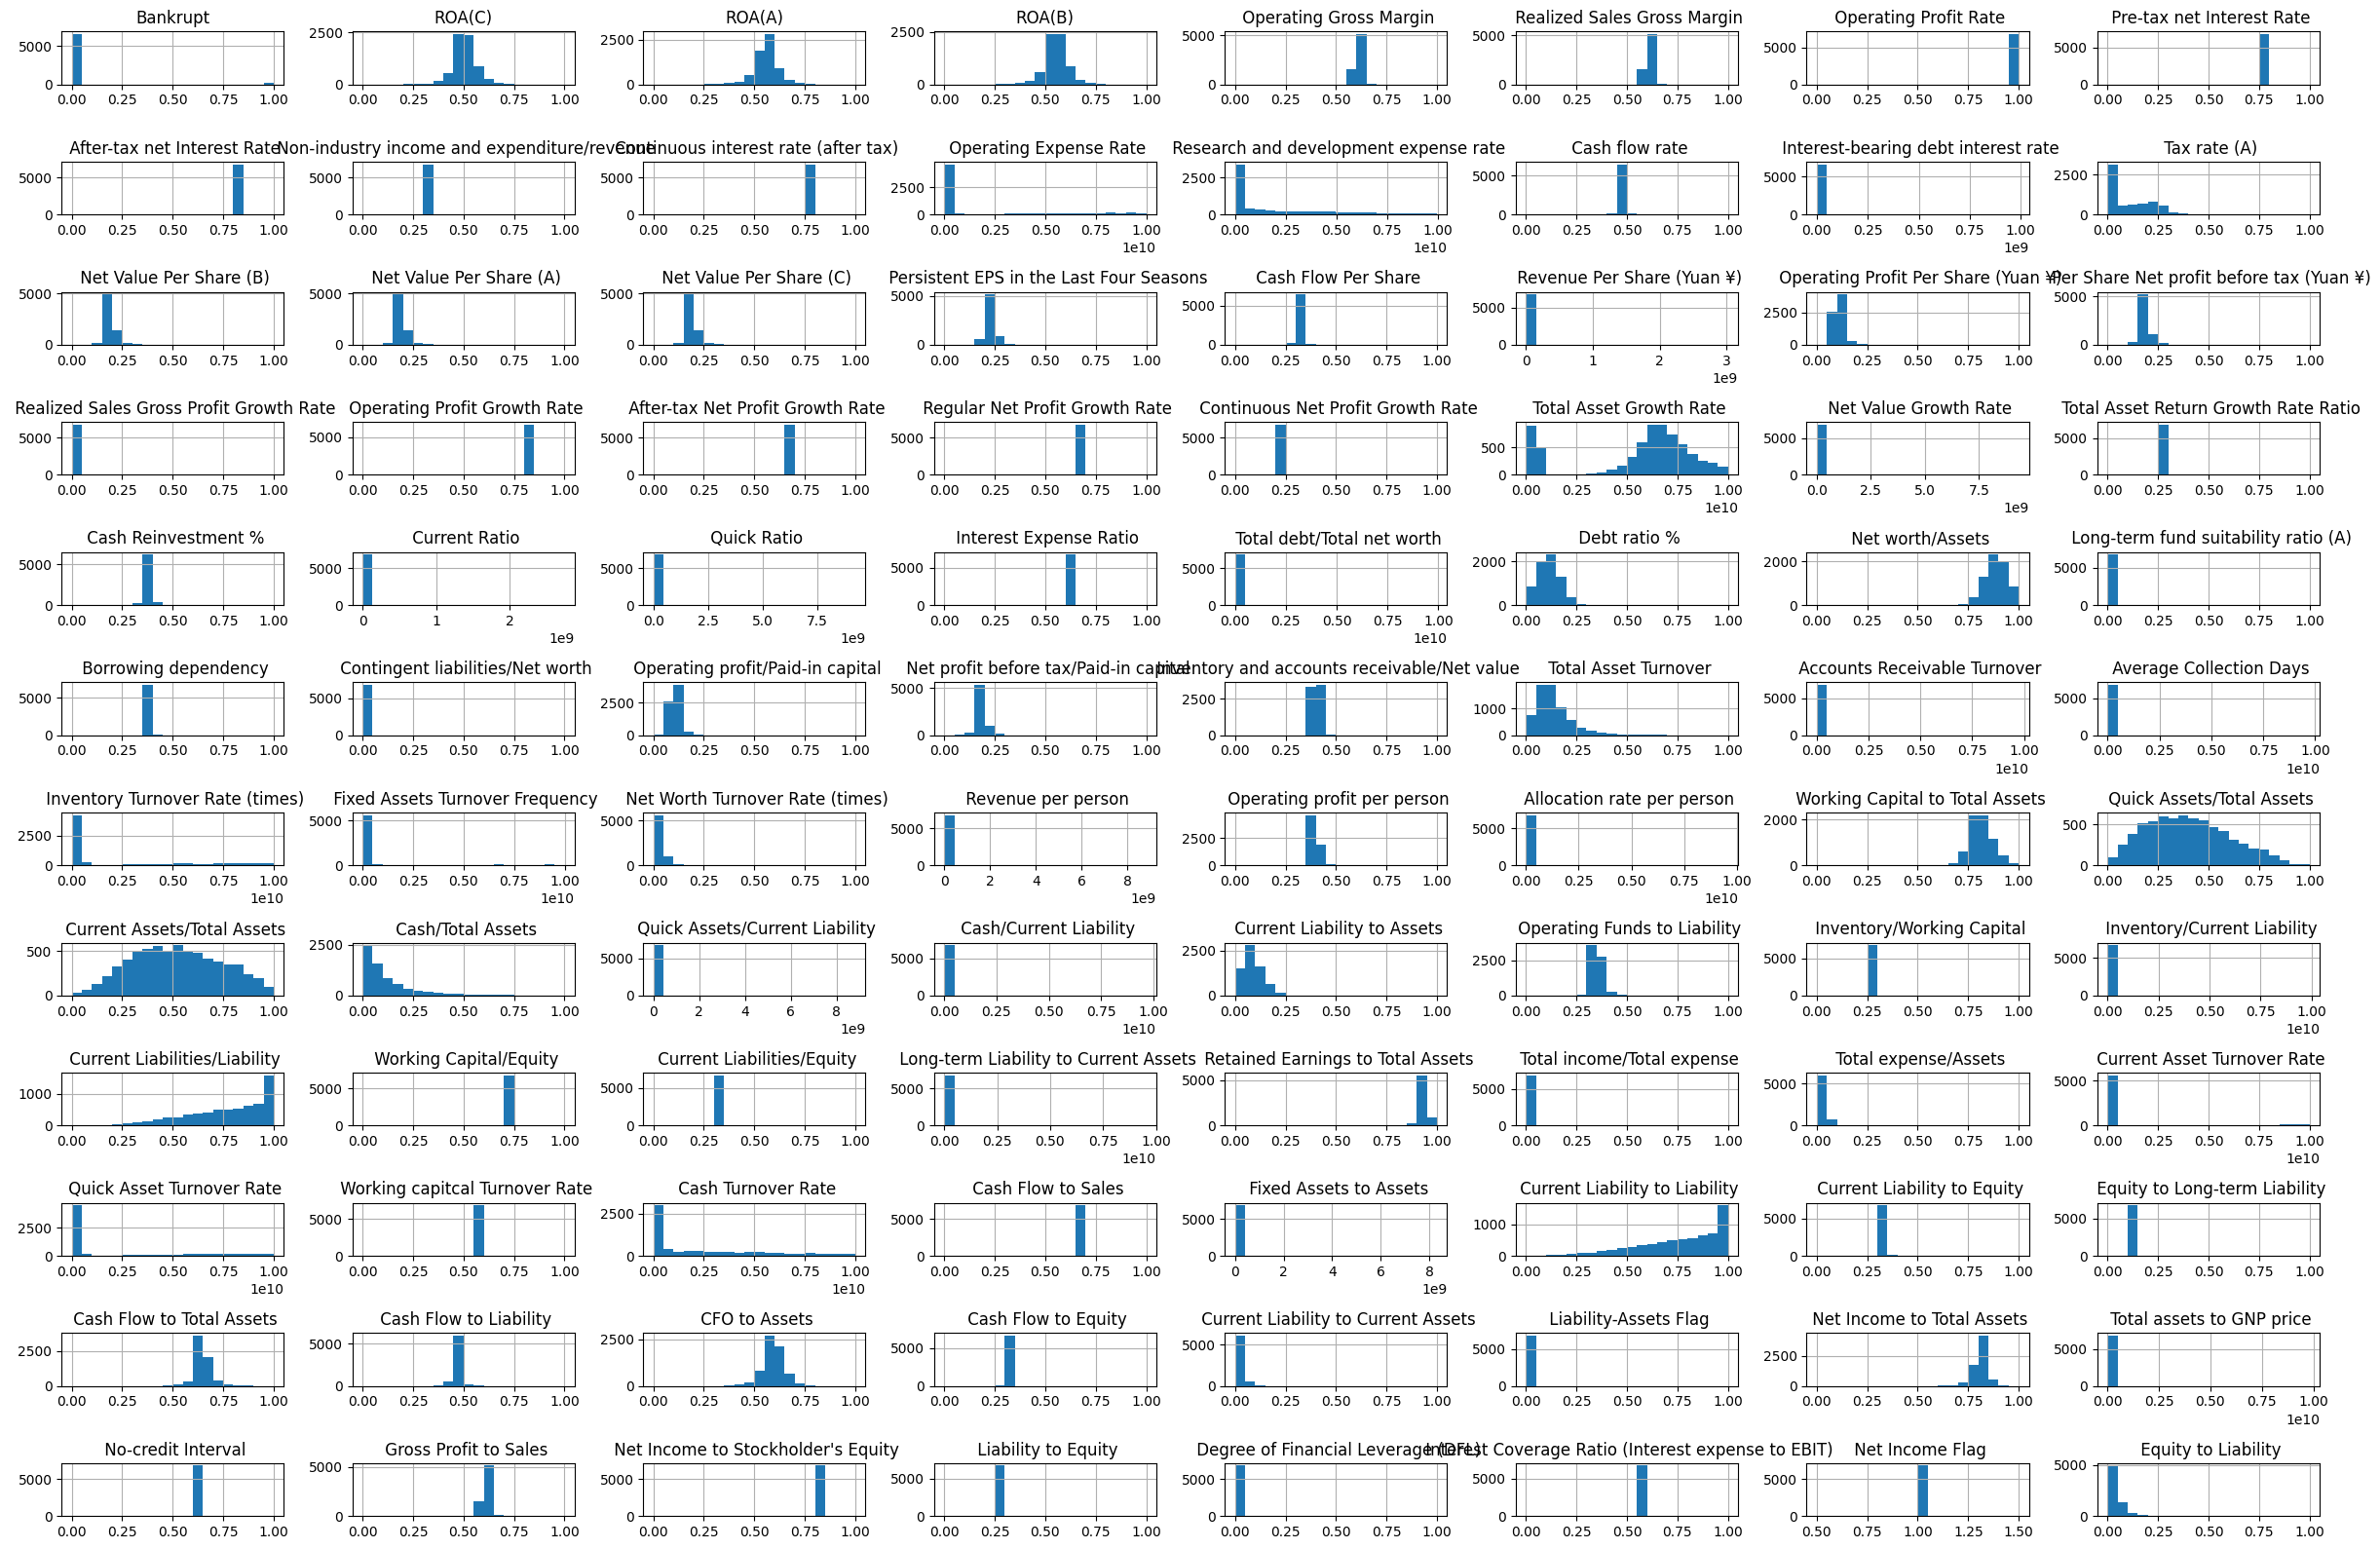

In [22]:
df_bank.hist(bins=20, figsize=(24, 16), layout=(12, 8))

plt.tight_layout()
plt.show()

#### Here we see that in most of the columns data is skewed

In [23]:
df_bank.corr()

Bankrupt    ROA(C)  \
Bankrupt                                            1.000000 -0.260807   
ROA(C)                                             -0.260807  1.000000   
ROA(A)                                             -0.282941  0.940124   
ROA(B)                                             -0.273051  0.986849   
 Operating Gross Margin                            -0.100043  0.334719   
...                                                      ...       ...   
 Liability to Equity                                0.166812 -0.143629   
 Degree of Financial Leverage (DFL)                 0.010508 -0.016575   
 Interest Coverage Ratio (Interest expense to E... -0.005509  0.010573   
 Net Income Flag                                         NaN       NaN   
 Equity to Liability                               -0.083048  0.052416   

                                                      ROA(A)    ROA(B)  \
Bankrupt                                           -0.282941 -0.273051   
ROA(C)                                              0.940124  0.986849   
ROA(A)                                              1.000000  0.955741   
ROA(B)                                              0.955741  1.000000   
 Operating Gross Margin                             0.326969  0.333749   
...                                                      ...       ...   
 Liability to Equity                               -0.141039 -0.142838   
 Degree of Financial Leverage (DFL)                -0.011515 -0.014663   
 Interest Coverage Ratio (Interest expense to E...  0.013372  0.011473   
 Net Income Flag                                         NaN       NaN   
 Equity to Liability                                0.057887  0.056430   

                                                     Operating Gross Margin  \
Bankrupt                                                          -0.100043   
ROA(C)                                                             0.334719   
ROA(A)                                                             0.326969   
ROA(B)                                                             0.333749   
 Operating Gross Margin                                            1.000000   
...                                                                     ...   
 Liability to Equity                                              -0.085434   
 Degree of Financial Leverage (DFL)                               -0.011806   
 Interest Coverage Ratio (Interest expense to E...                -0.001167   
 Net Income Flag                                                        NaN   
 Equity to Liability                                               0.120029   

                                                     Realized Sales Gross Margin  \
Bankrupt                                                               -0.099445   
ROA(C)                                                                  0.332755   
ROA(A)                                                                  0.324956   
ROA(B)                                                                  0.331755   
 Operating Gross Margin                                                 0.999518   
...                                                                          ...   
 Liability to Equity                                                   -0.085407   
 Degree of Financial Leverage (DFL)                                    -0.011268   
 Interest Coverage Ratio (Interest expense to E...                     -0.001158   
 Net Income Flag                                                             NaN   
 Equity to Liability                                                    0.120196   

                                                     Operating Profit Rate  \
Bankrupt                                                         -0.000230   
ROA(C)                                                            0.035725   
ROA(A)                                                            0.032053   
ROA(

#### Renaming all the columns

In [24]:
def rename_col_name(data):
    data = (data.strip().replace('(', '_')
                    .replace(')', '_')
                    .replace(' ', '_')
                    .replace('/', '_')
                    .replace('-','_')
                    .replace('%','pc')
                    .replace('¥','')
                    .replace('--','_')
                    .replace("'",'')
                    .lower()
                    )    
    return data

In [25]:
cols = list(df_bank.columns)

In [26]:
cols = [rename_col_name(data) for data in cols]

In [27]:
df_bank.columns = cols

In [28]:
df_bank.columns

Index(['bankrupt', 'roa_c_', 'roa_a_', 'roa_b_', 'operating_gross_margin',
       'realized_sales_gross_margin', 'operating_profit_rate',
       'pre_tax_net_interest_rate', 'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate__after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate__a_',
       'net_value_per_share__b_', 'net_value_per_share__a_',
       'net_value_per_share__c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share__yuan__',
       'operating_profit_per_share__yuan__',
       'per_share_net_profit_before_tax__yuan__',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit_growth_rate',
       'regular_net_profit_growth_rate', 'continuous_net_profit_growth_rate',
       'total_asset_growth_rate', 'net_value_

In [29]:
# Checking the data value count , std, max,min, iqr

In [30]:
df_bank.describe()

bankrupt       roa_c_       roa_a_       roa_b_  \
count  6819.000000  6819.000000  6819.000000  6819.000000   
mean      0.032263     0.505180     0.558625     0.553589   
std       0.176710     0.060686     0.065620     0.061595   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.476527     0.535543     0.527277   
50%       0.000000     0.502706     0.559802     0.552278   
75%       0.000000     0.535563     0.589157     0.584105   
max       1.000000     1.000000     1.000000     1.000000   

       operating_gross_margin  realized_sales_gross_margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       operating_profit_rate  pre_tax_net_interest_rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       after_tax_net_interest_rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       non_industry_income_and_expenditure_revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       continuous_interest_rate__after_tax_  operating_expense_rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.781567            1.566874e-04   
50%                                0.781635            2.777589e-04   
75%                                0.781735            4.145000e+09   
max                                1.000000            9.990000e+09   

       research_and_development_expense_rate  cash_flow_rate  \
count                           6.819000e+03     6819.000000   
mean                            1.950427e+09        0.467431   
std                             2.598292e+09        0.017036   
min                             0.000000e+00        0.000000   
25%                             1.281880e-04        0.461558   
50%                             5.090000e+08        0.465080   
75%                             3.450000e+09        0.471004   
max                             9.980000e+09        1.000000   

       interest_bearing_debt_interest_rate  tax_rate__a_  \
count                         6.819000e+03   6819.000000   
mean                          1.644801e+07      0.115001   
std                           1.082750e+08      0.138667   
min                           0.000000e+00      0.000000   
25%                   

#### Here we see count of data is 6819 , mean values of each column , their standard deviation, how data is distributed , min and max value in columns

In [31]:
# Checking Schema

In [32]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   bankrupt                                            6819 non-null   int64  
 1   roa_c_                                              6819 non-null   float64
 2   roa_a_                                              6819 non-null   float64
 3   roa_b_                                              6819 non-null   float64
 4   operating_gross_margin                              6819 non-null   float64
 5   realized_sales_gross_margin                         6819 non-null   float64
 6   operating_profit_rate                               6819 non-null   float64
 7   pre_tax_net_interest_rate                           6819 non-null   float64
 8   after_tax_net_interest_rate                         6819 non-null   float64
 9

#### Here we see that their is no null values is in the data and all the columns are numeric(int ,float)

## Exploratory Data Analysis

In [33]:
# Heatmap

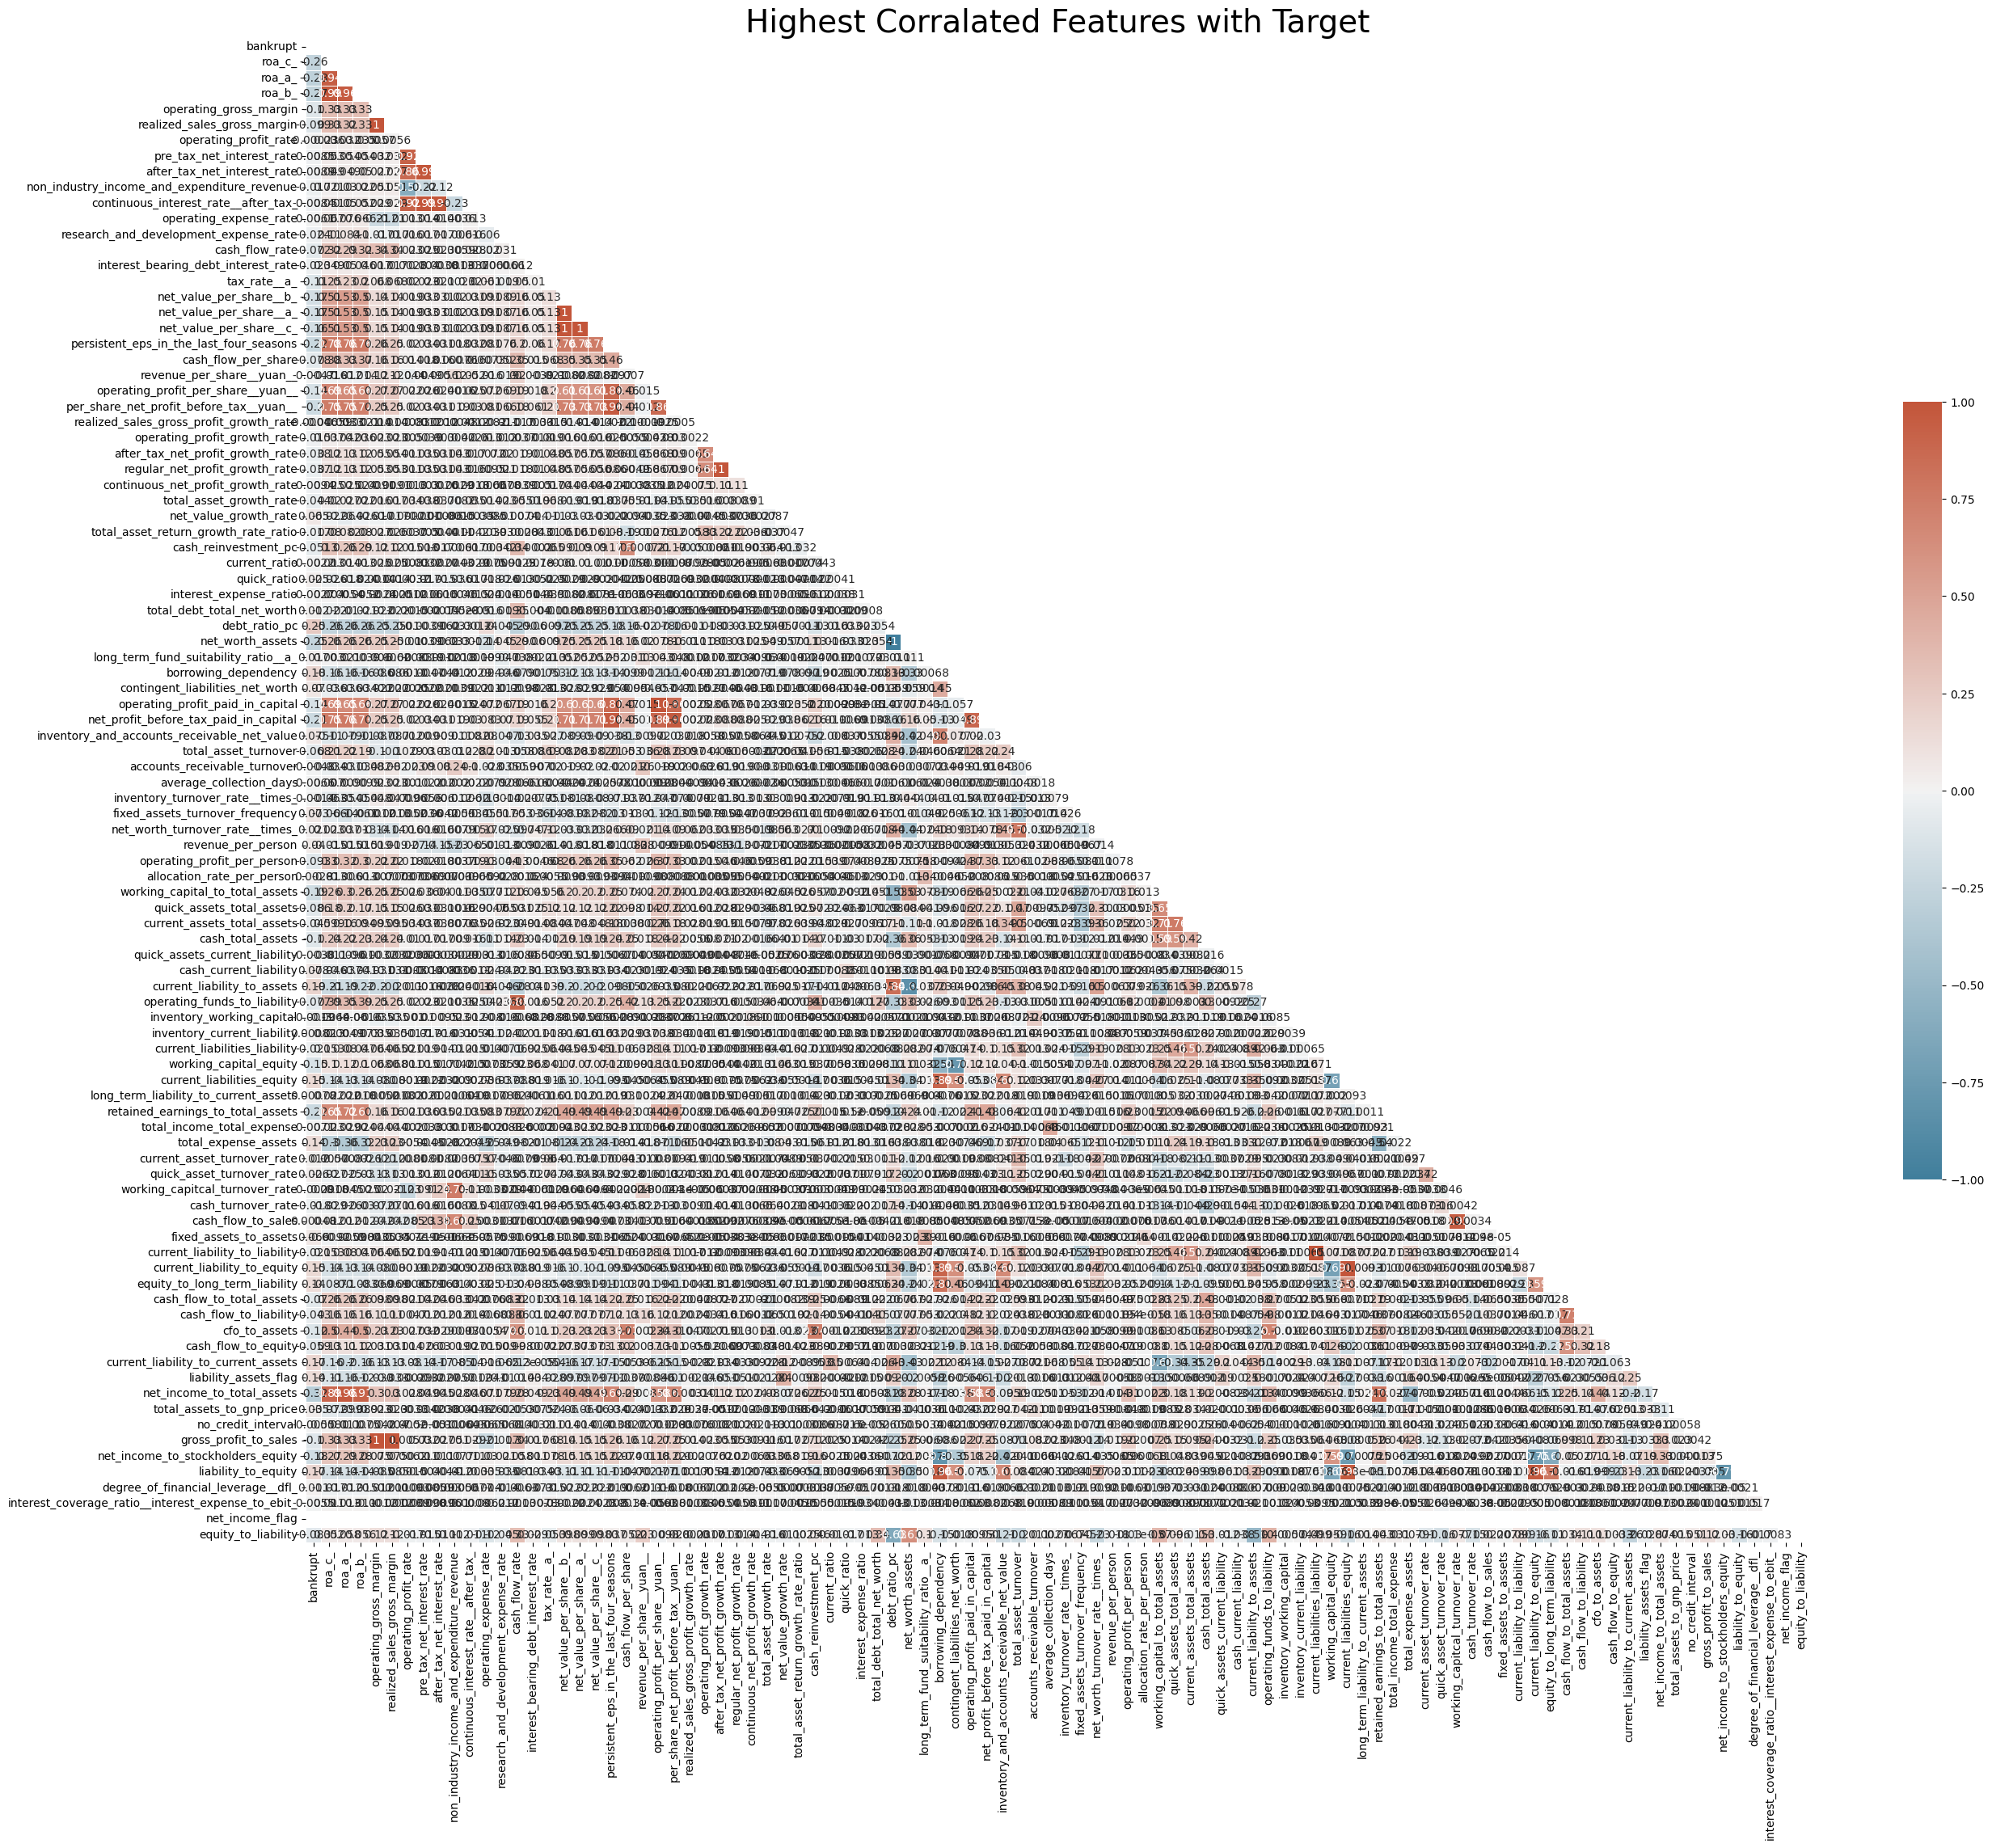

In [34]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df_bank.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    mat,
    mask=mask,
    cmap=cmap,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)
plt.title("Highest Corralated Features with Target", fontsize=28)
plt.show()

#### Here we see features  roa a,b,c, operating_gross_margin,  realized_sales_gross_margin,  operating_profit_rate, pre_tax_net_interest_rate, after_tax_net_interest_rate,  non_industry_income_and_expenditure_revenue are inversly proportional to bankrupcy


<Axes: >

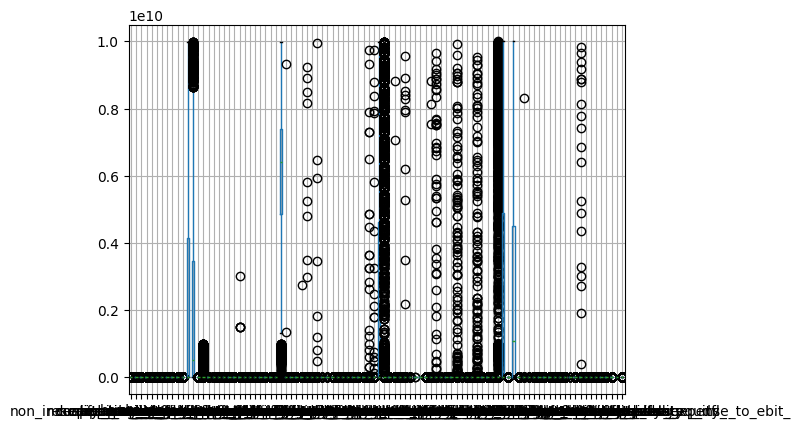

In [35]:
df_bank.boxplot()

#### Splitting the data into dependent and independent variables x,y (x is independent , y is dependent)

In [36]:
X = df_bank.drop('bankrupt', axis=1)
y = df_bank['bankrupt']

In [37]:
X.shape, X.size , y.shape, y.size

((6819, 95), 647805, (6819,), 6819)

In [38]:
X.head()

roa_c_    roa_a_    roa_b_  operating_gross_margin  \
0  0.370594  0.424389  0.405750                0.601457   
1  0.464291  0.538214  0.516730                0.610235   
2  0.426071  0.499019  0.472295                0.601450   
3  0.399844  0.451265  0.457733                0.583541   
4  0.465022  0.538432  0.522298                0.598783   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   non_industry_income_and_expenditure_revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   continuous_interest_rate__after_tax_  operating_expense_rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   research_and_development_expense_rate  cash_flow_rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   interest_bearing_debt_interest_rate  tax_rate__a_  net_value_per_share__b_  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   net_value_per_share__a_  net_value_per_share__c_  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   persistent_eps_in_the_last_four_seasons  cash_flow_per_share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                                 0.193722             0.321674   
4                                 0.212537             0.319162   

   revenue_per_share__yuan__  operating_profit_per_share__yuan__  \
0                   0.017560                            0.095921   
1                   0.021144                            0.093722   
2                   0.005944                            0.092338   
3                   0.014368                            0.077762   
4                   0.029690                            0.096898   

   per_share_net_profit_before_tax__yuan__  \
0                                 0.138736   
1                                 0.169918   
2                                 0.142803   
3                                 0.148603   
4              

In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: bankrupt, dtype: int64

#### Here we see their are lot of outliers

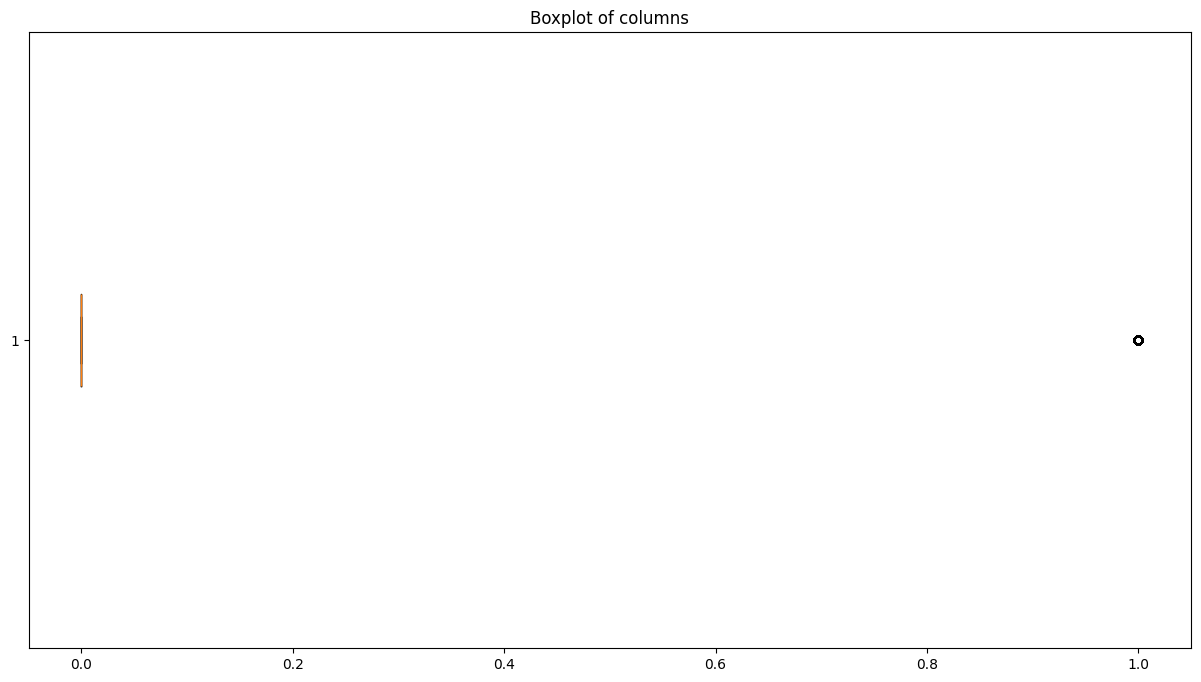

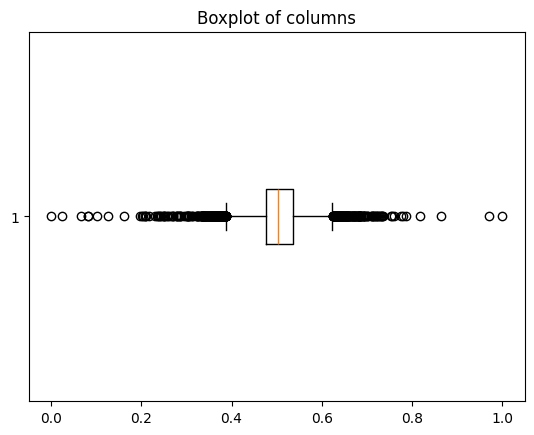

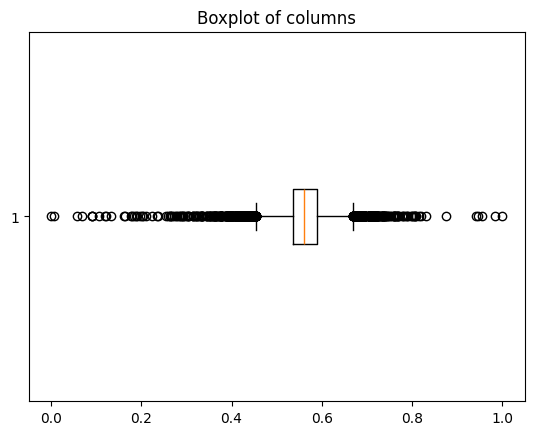

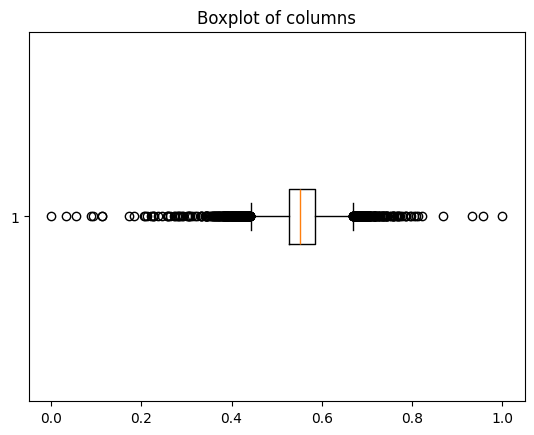

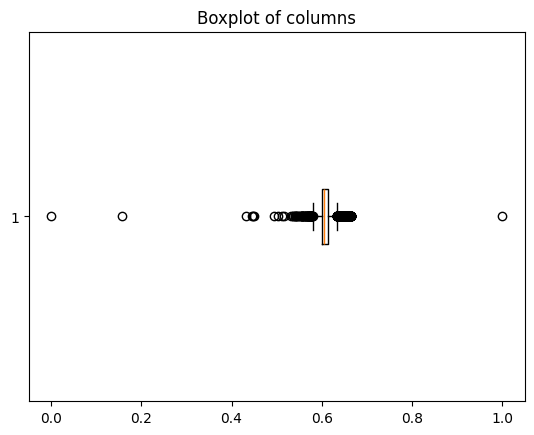

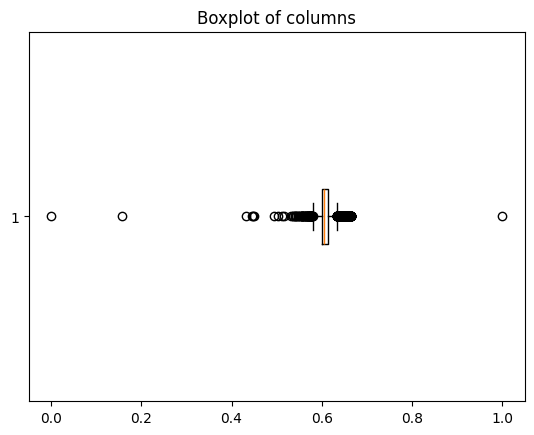

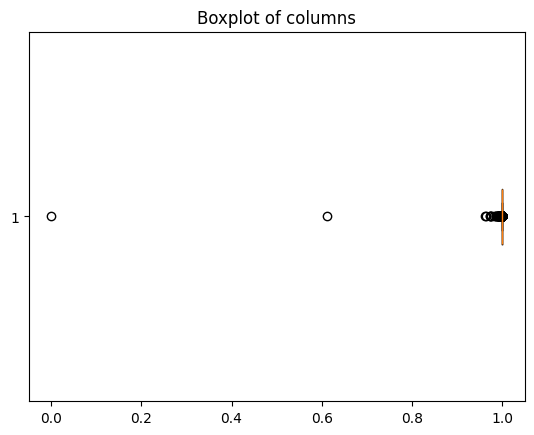

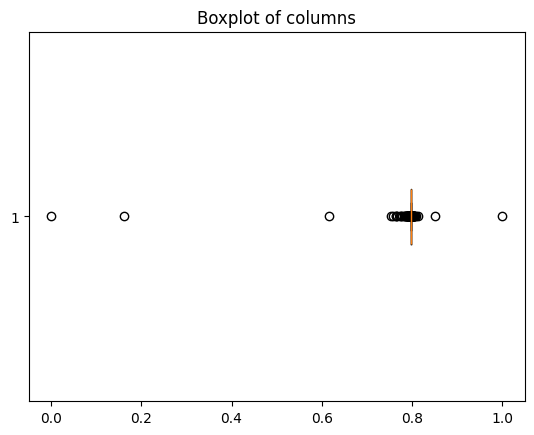

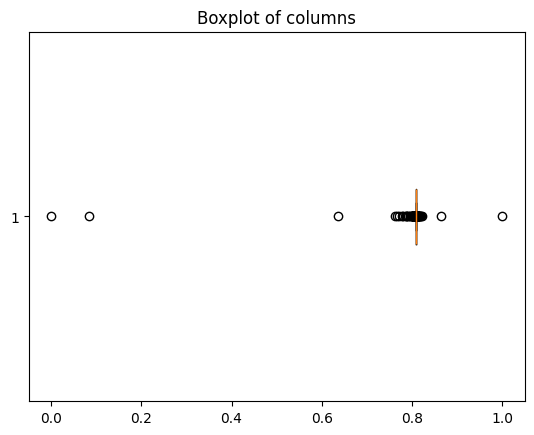

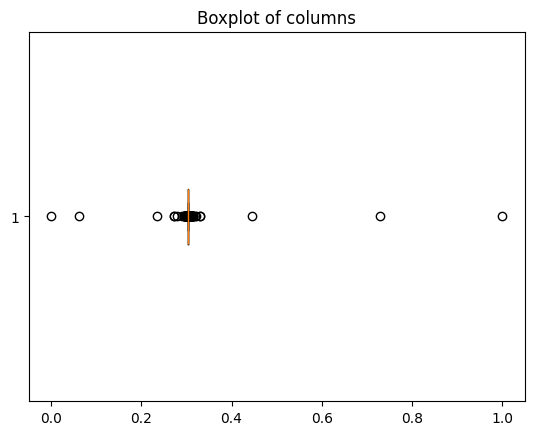

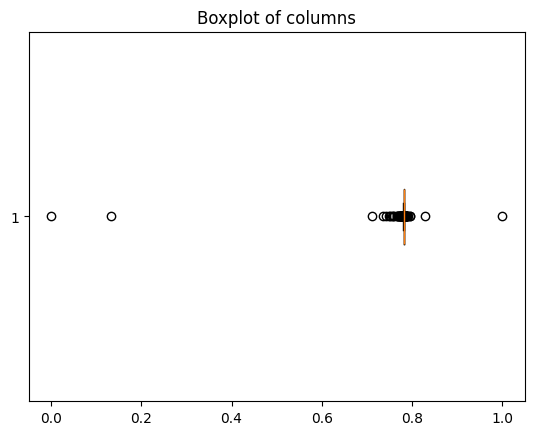

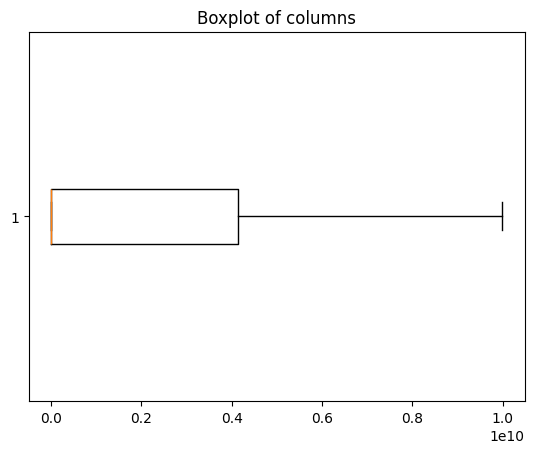

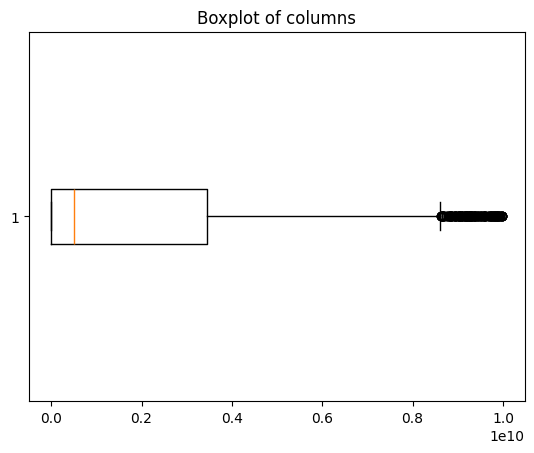

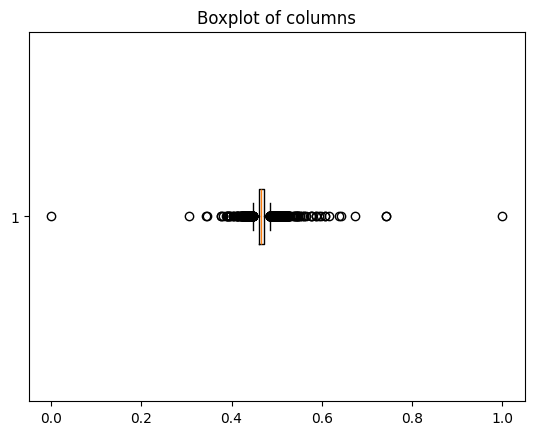

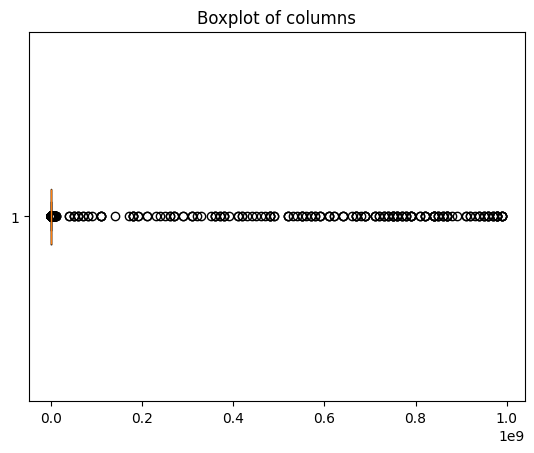

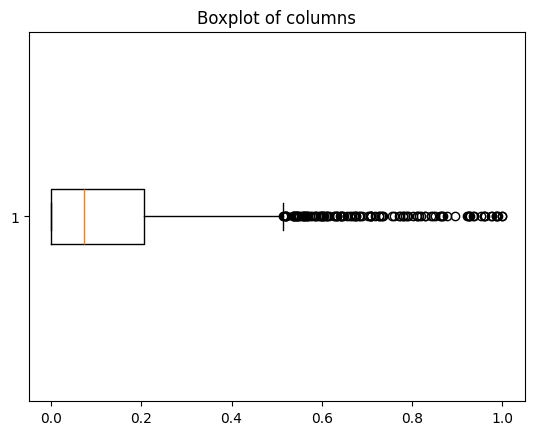

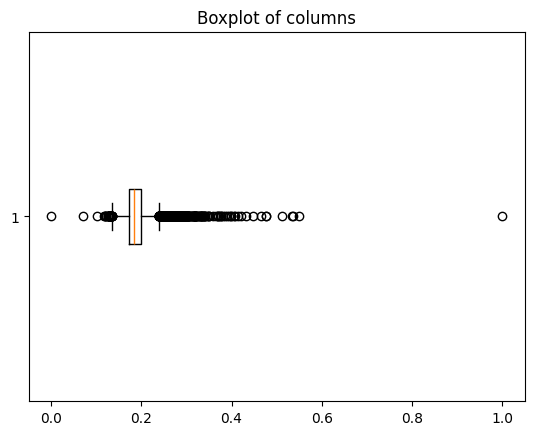

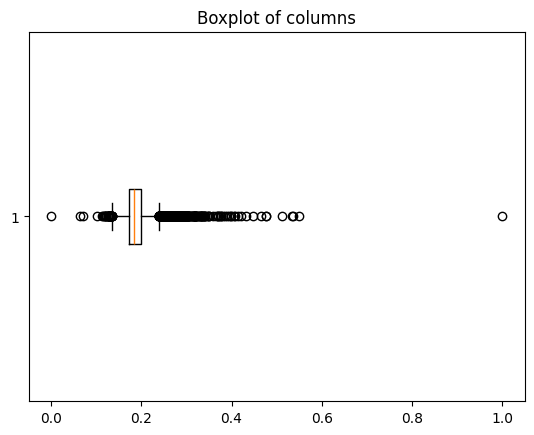

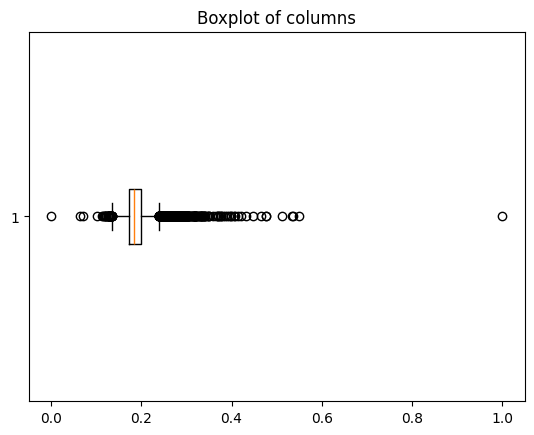

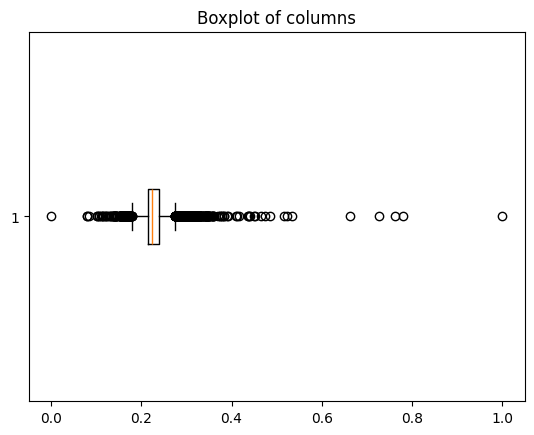

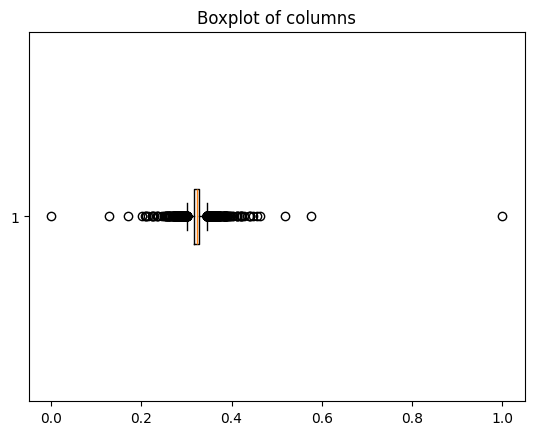

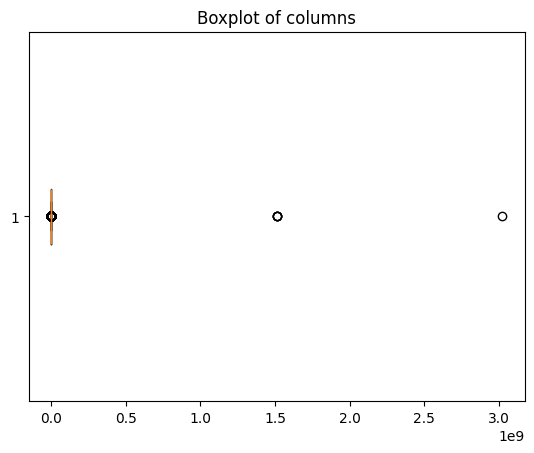

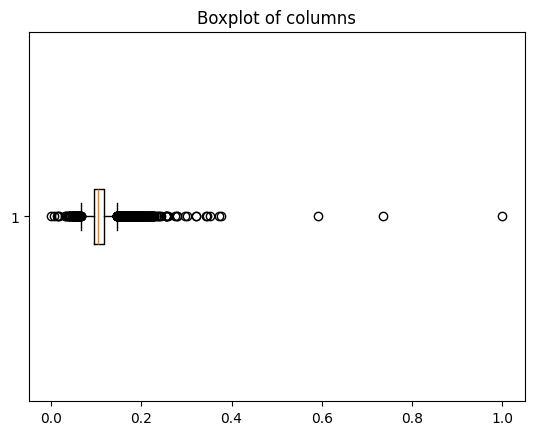

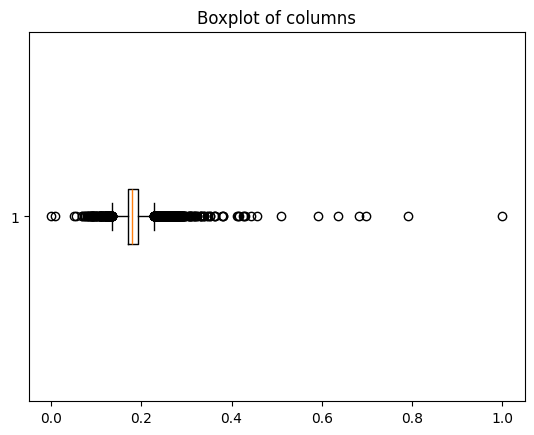

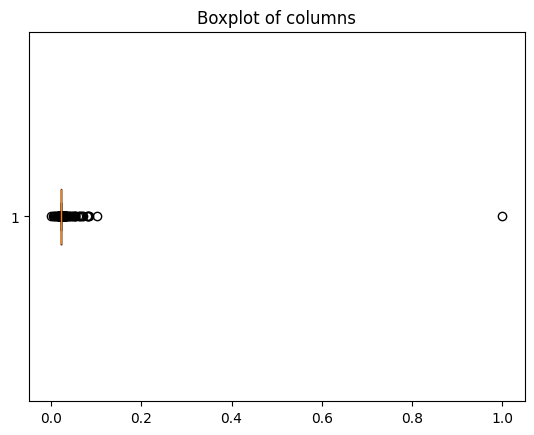

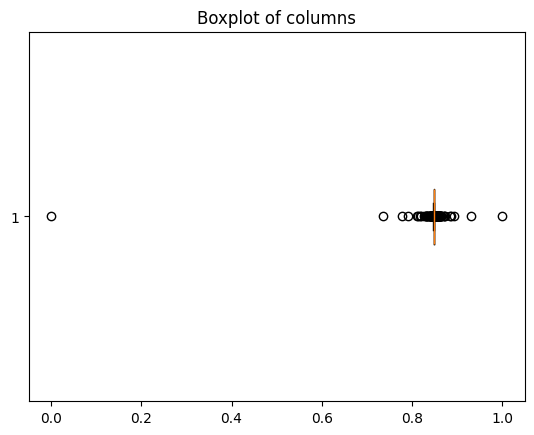

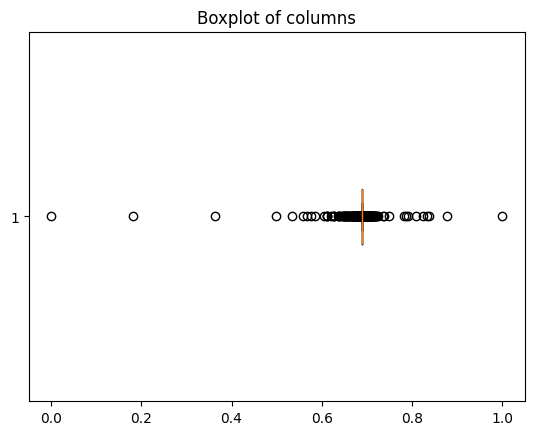

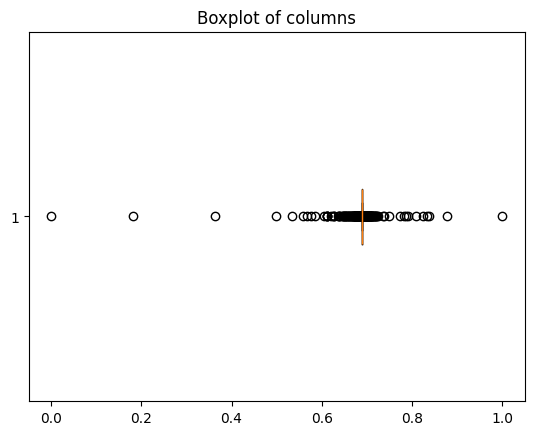

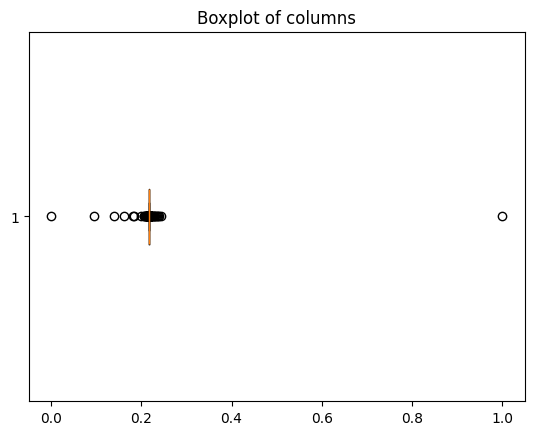

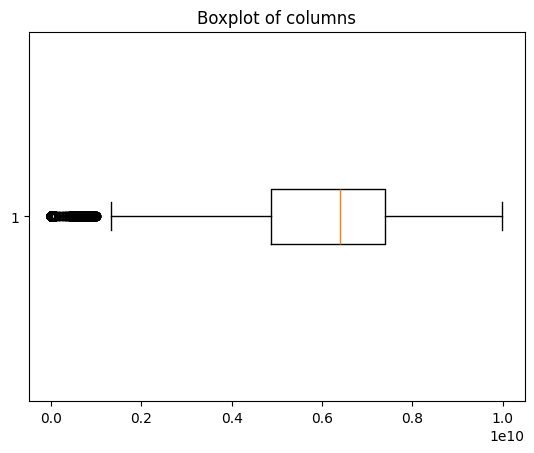

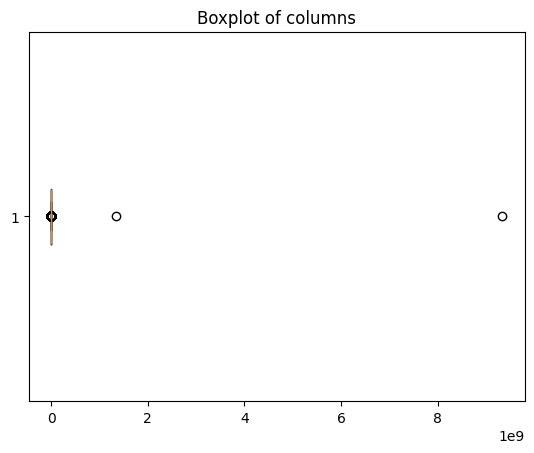

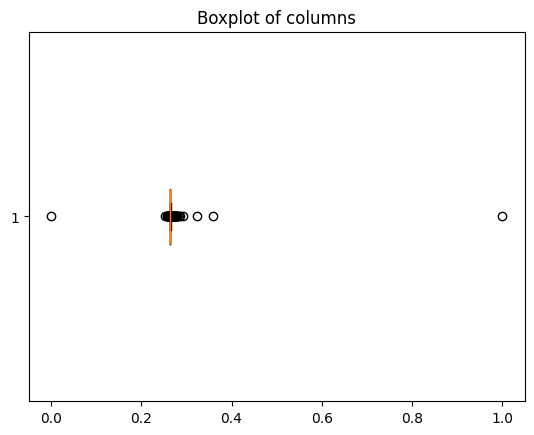

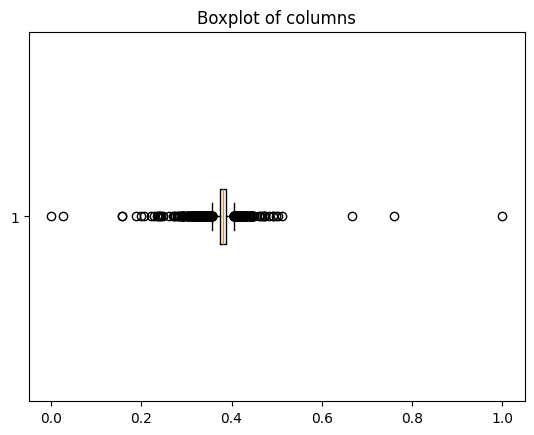

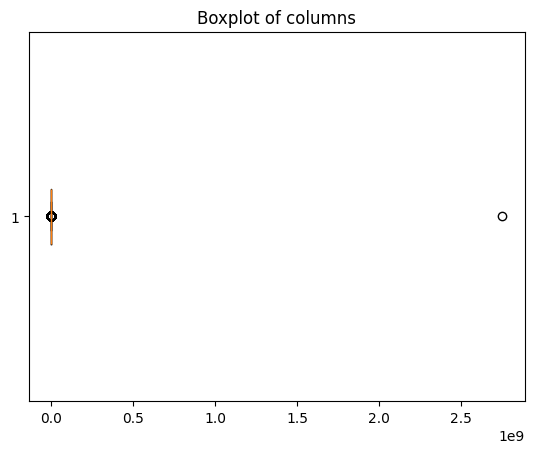

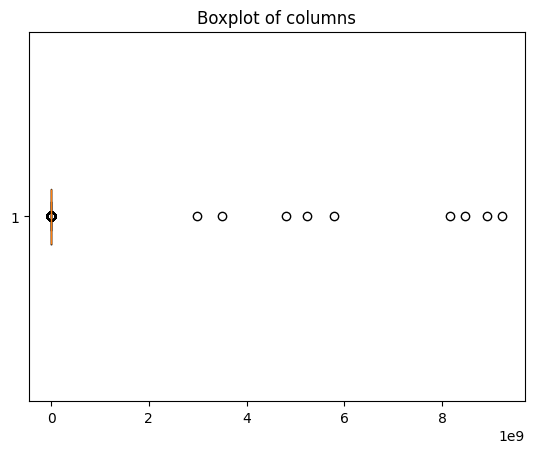

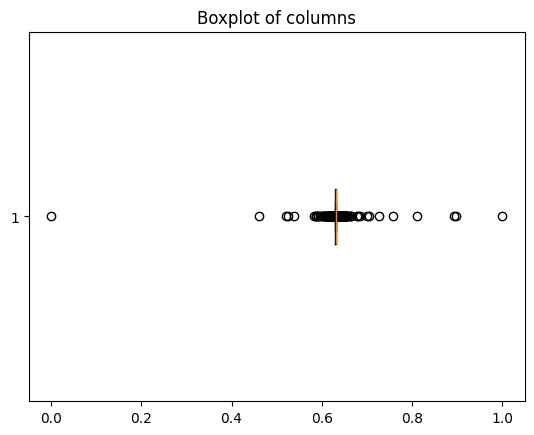

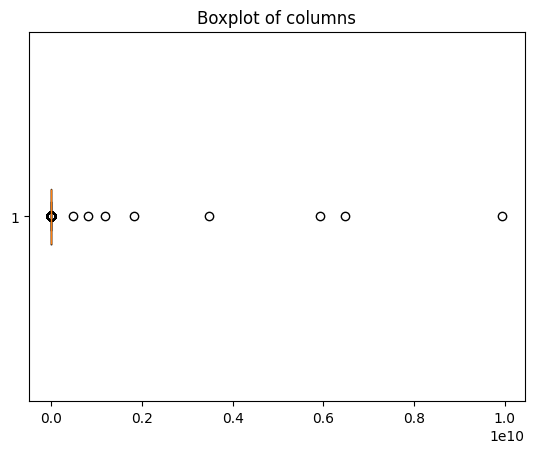

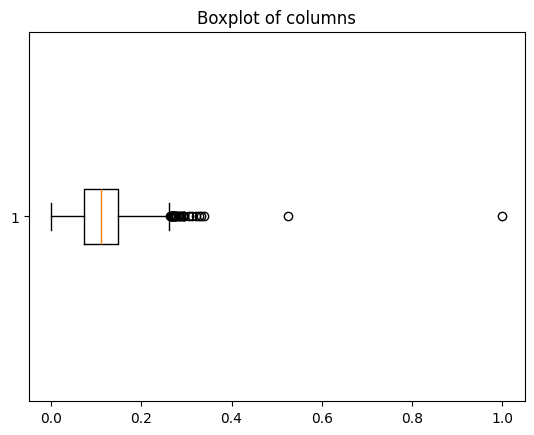

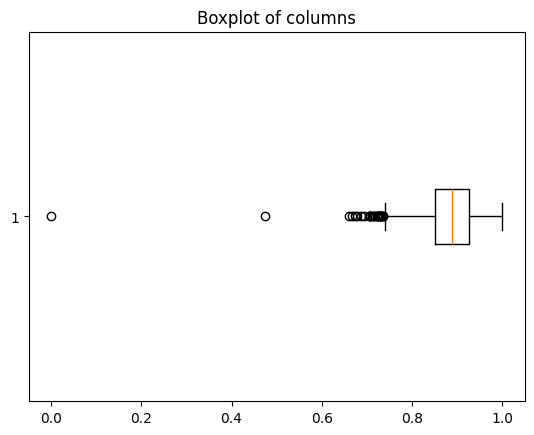

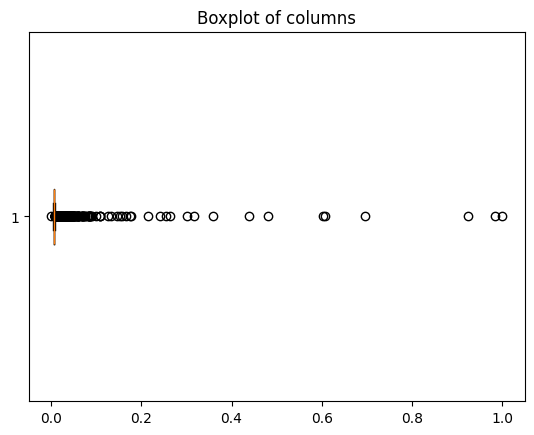

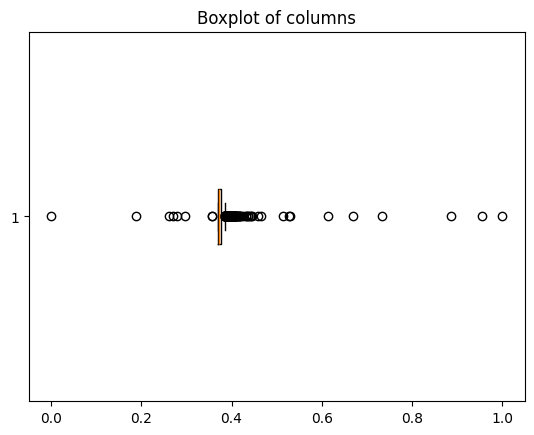

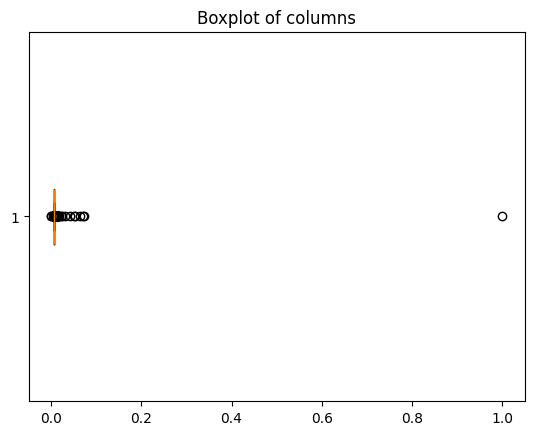

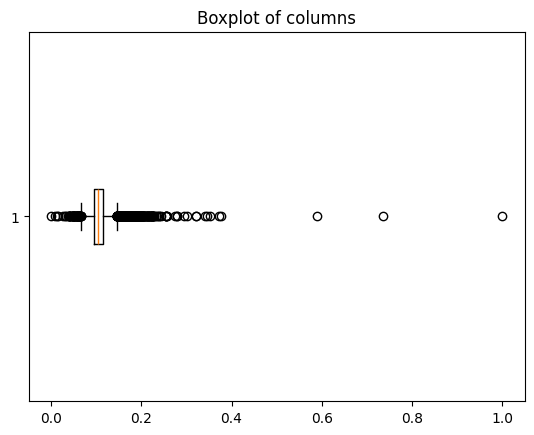

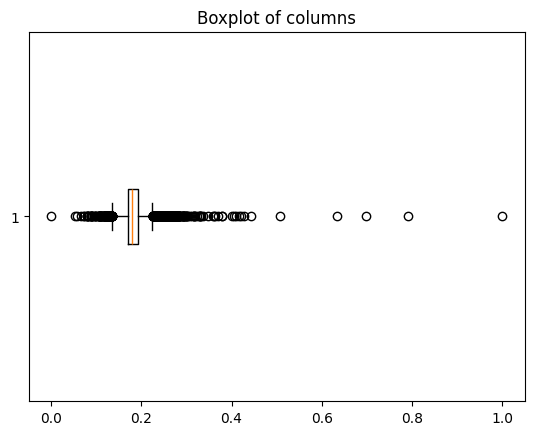

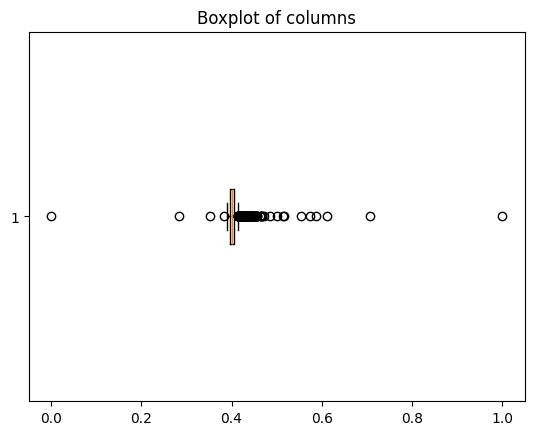

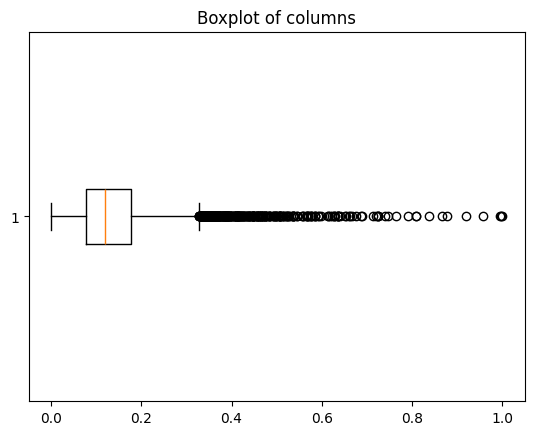

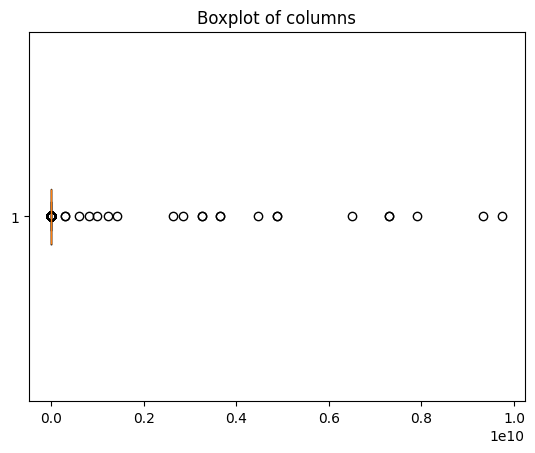

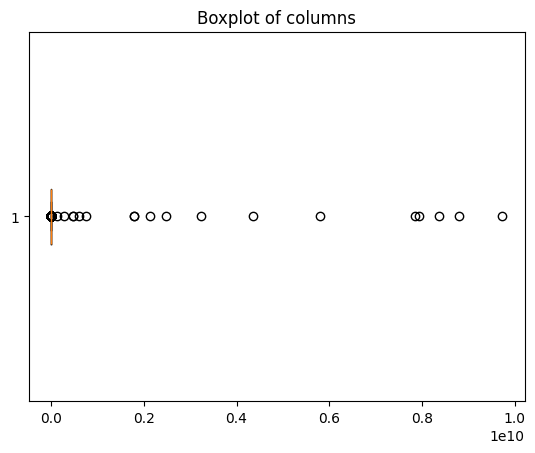

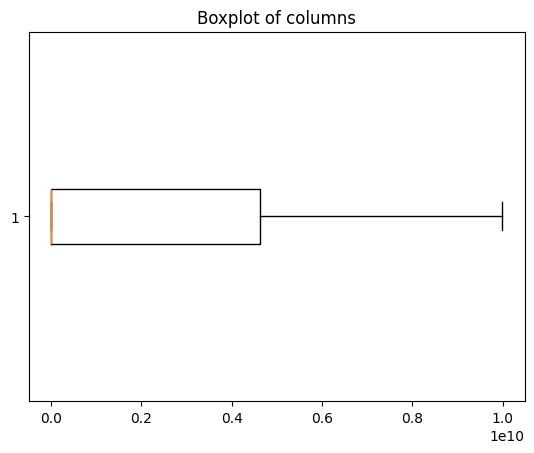

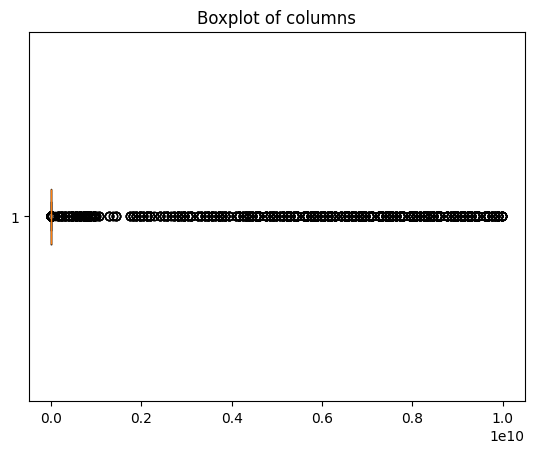

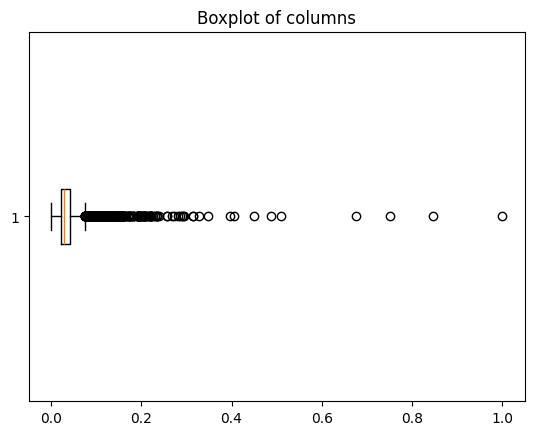

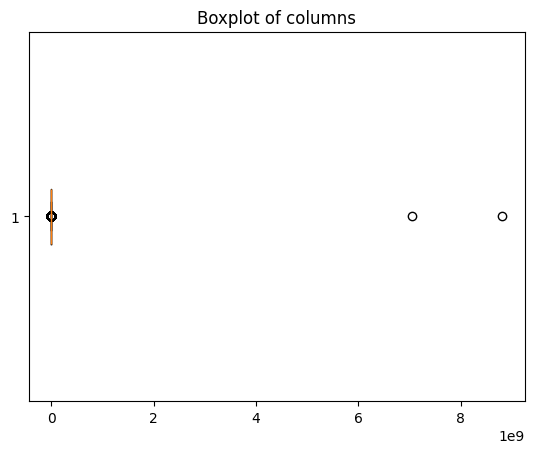

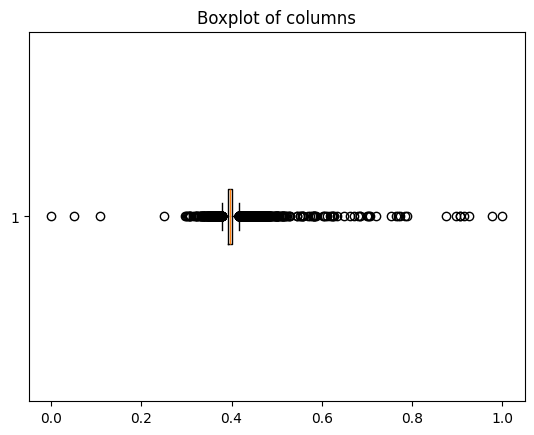

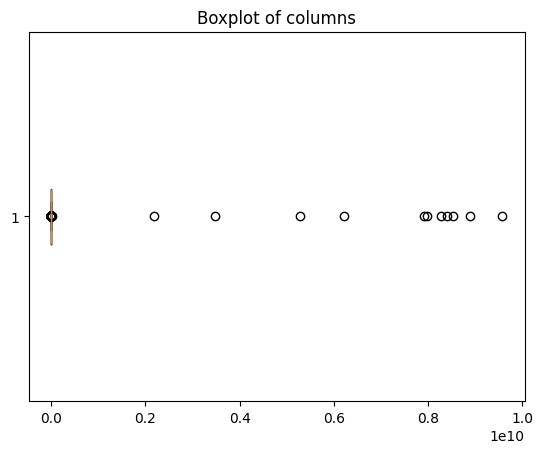

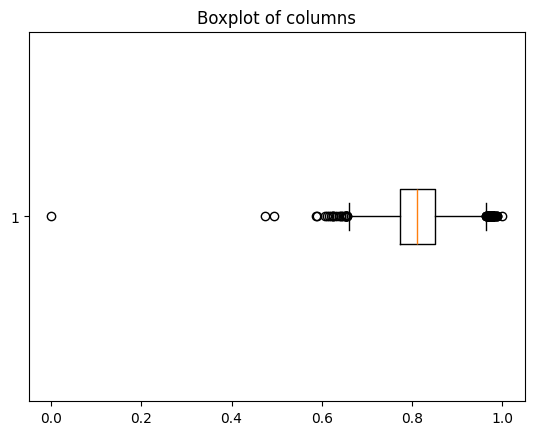

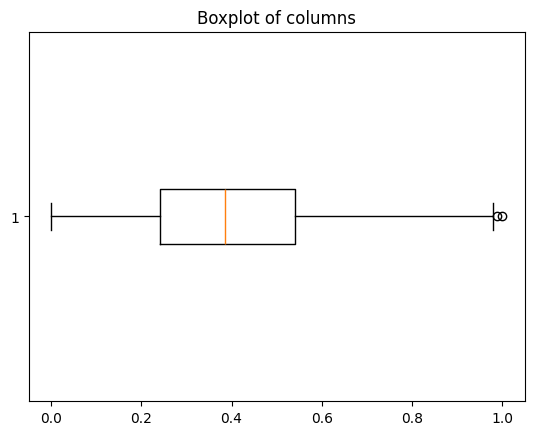

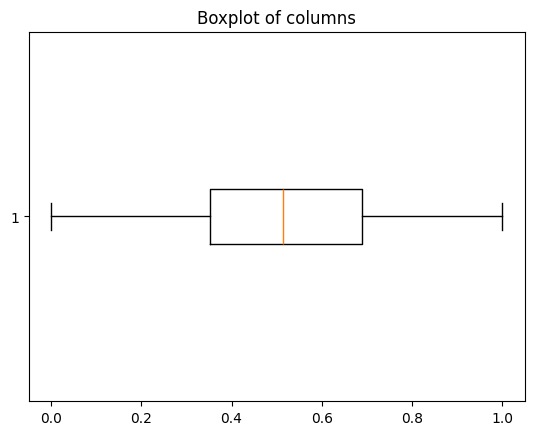

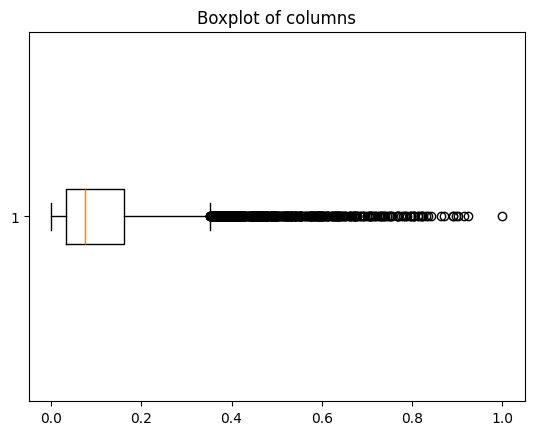

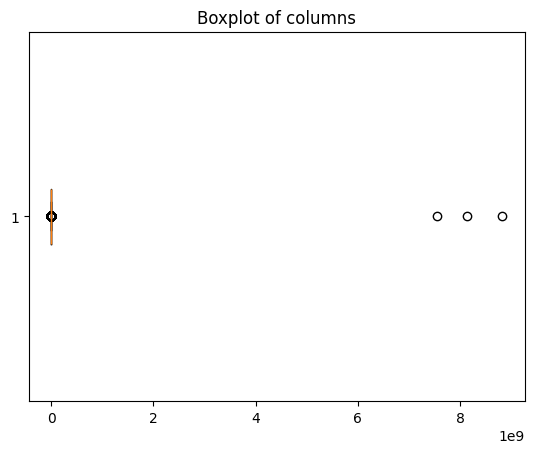

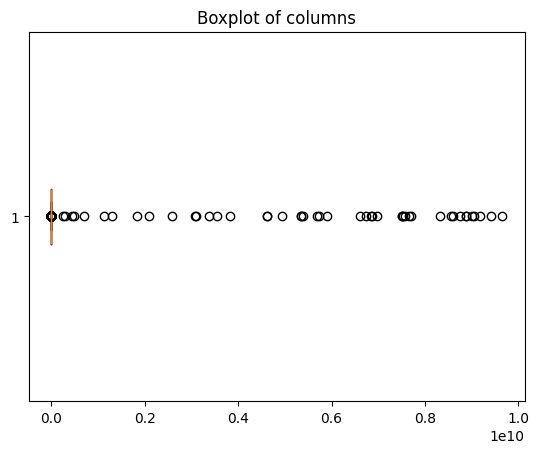

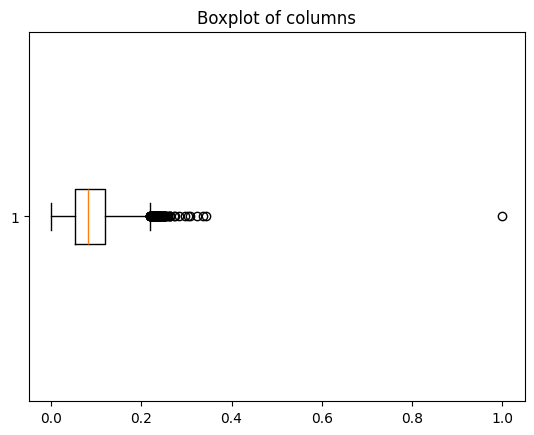

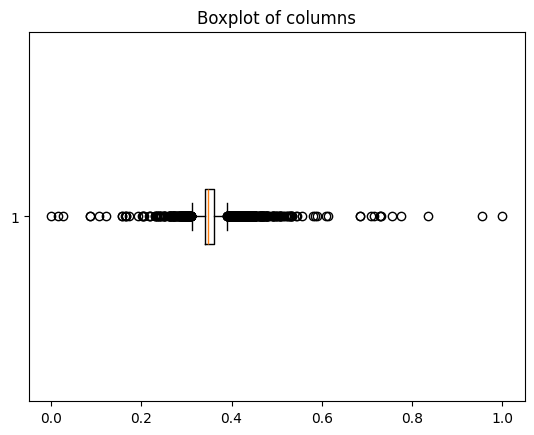

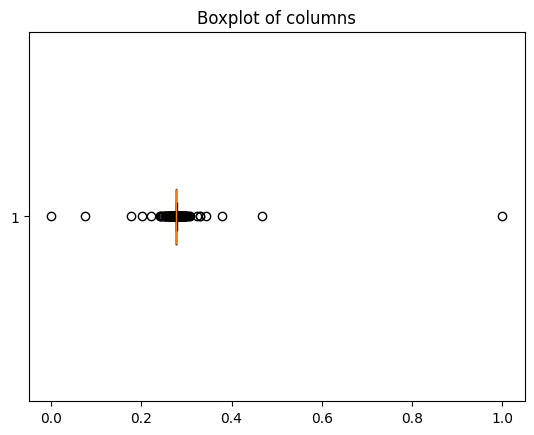

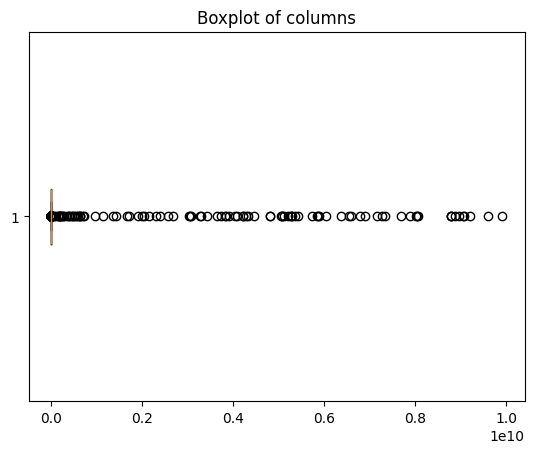

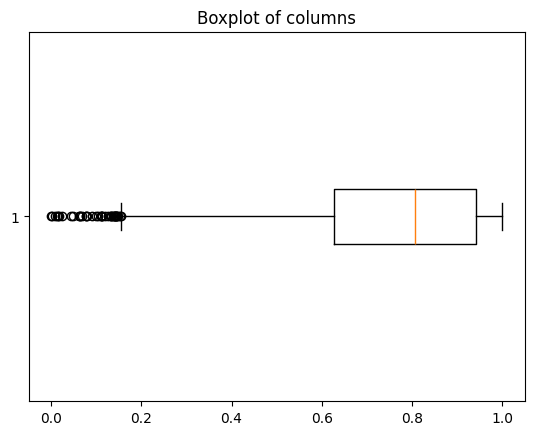

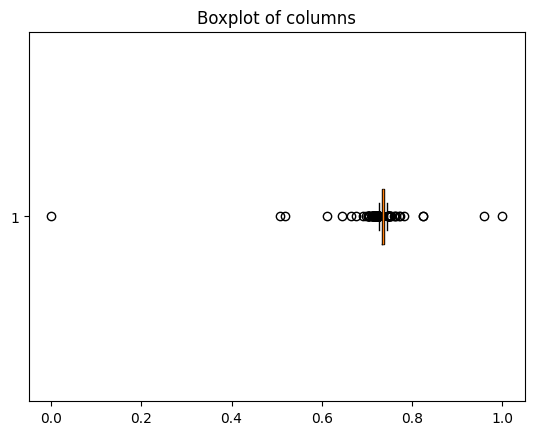

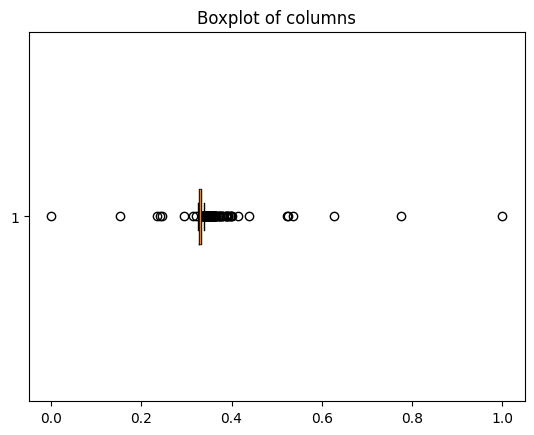

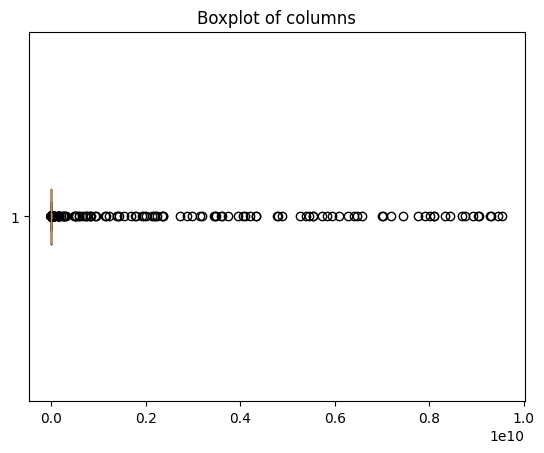

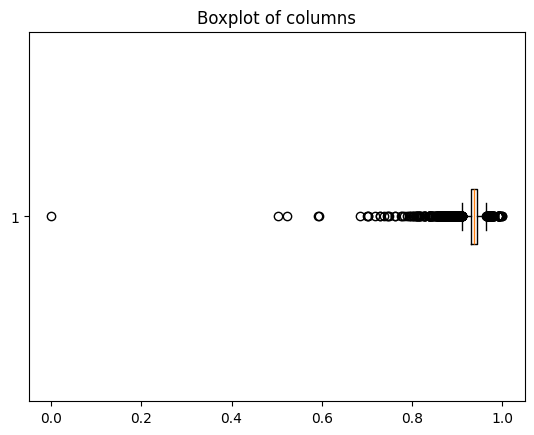

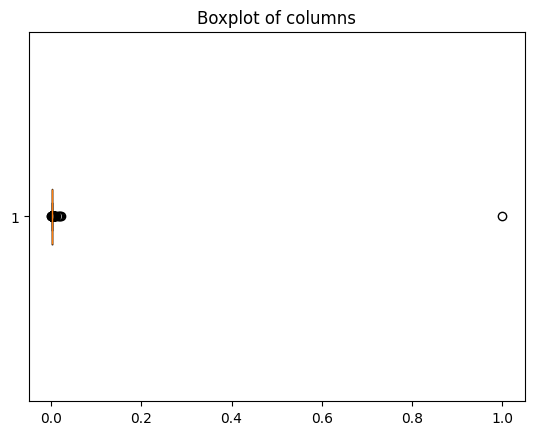

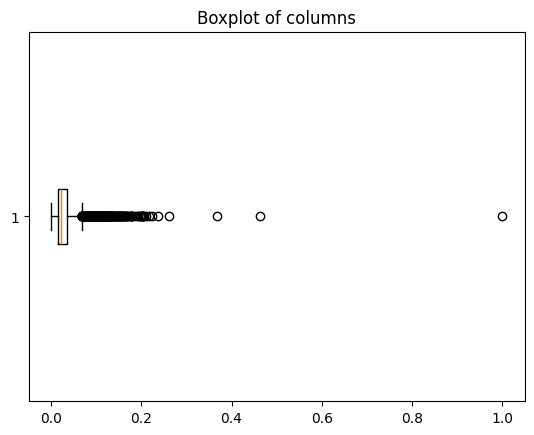

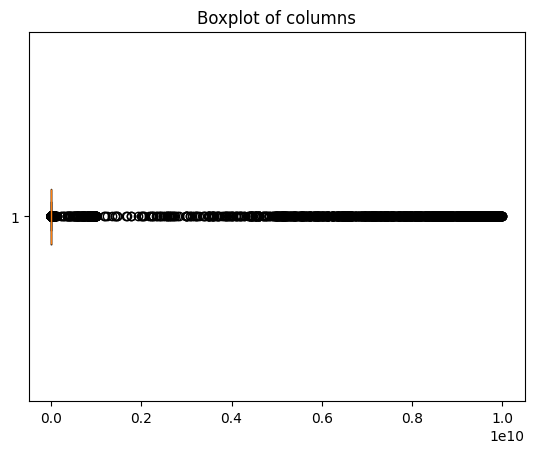

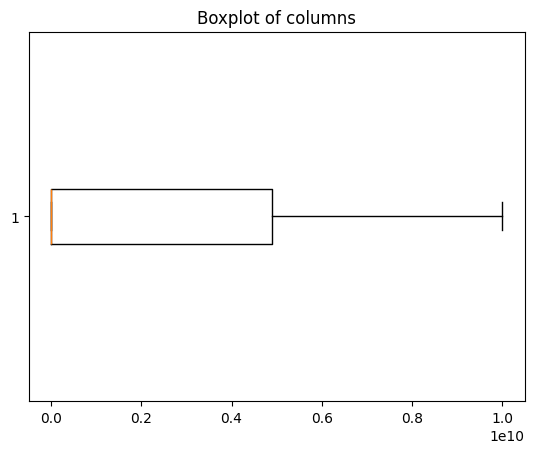

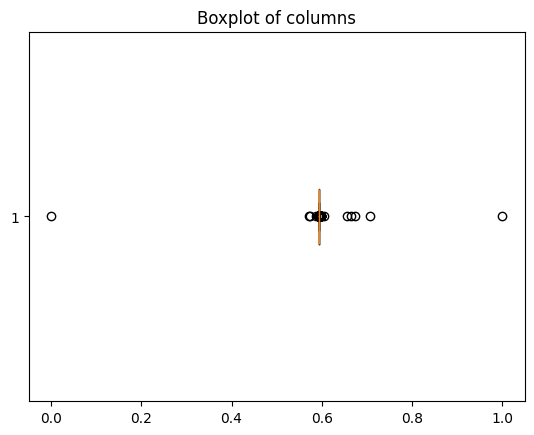

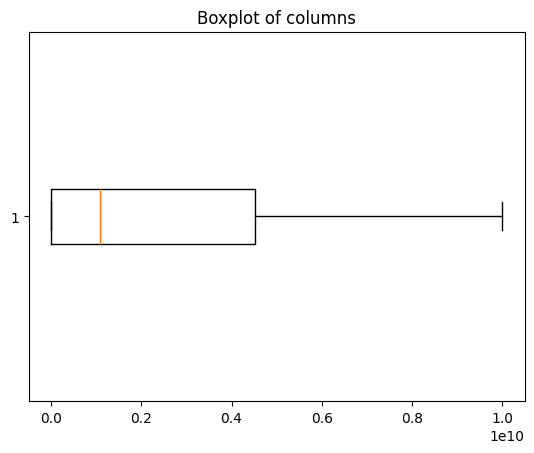

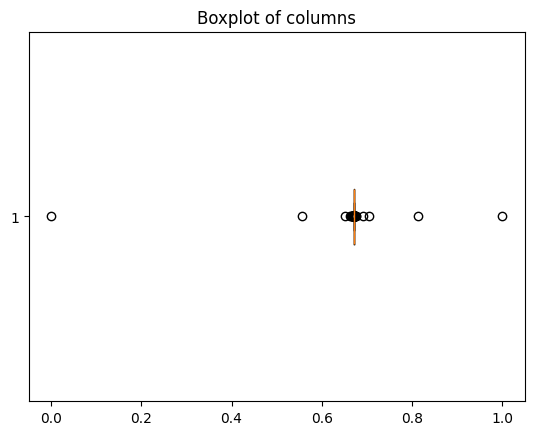

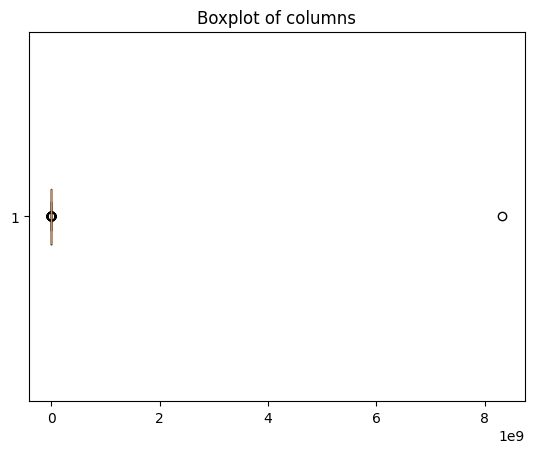

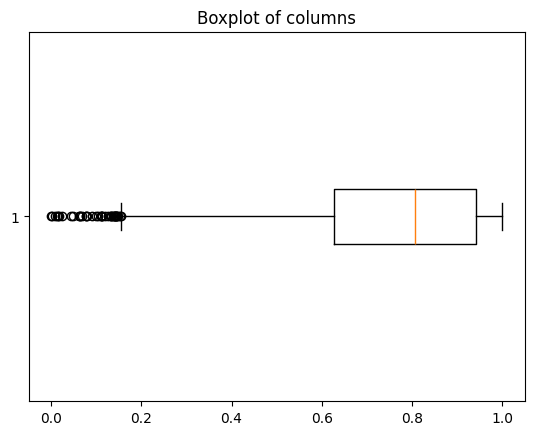

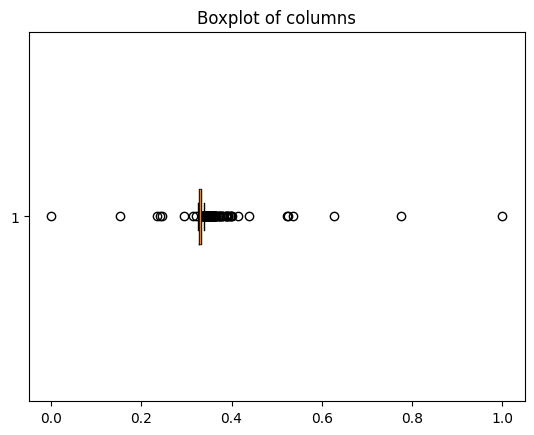

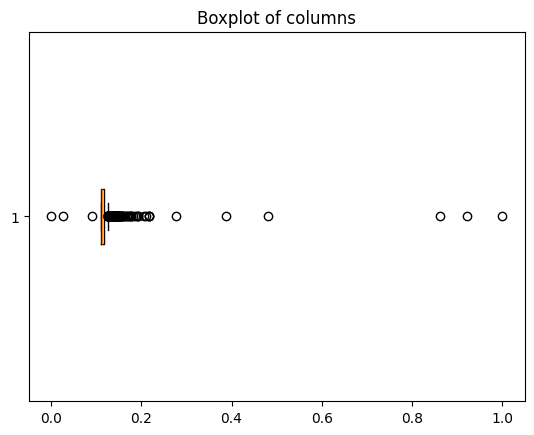

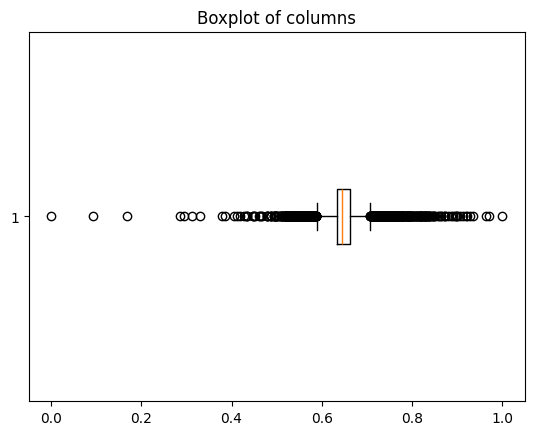

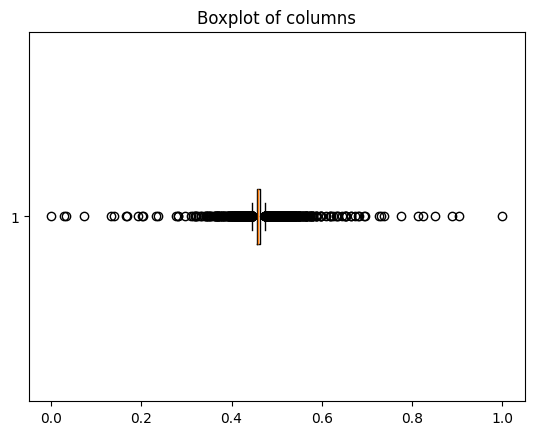

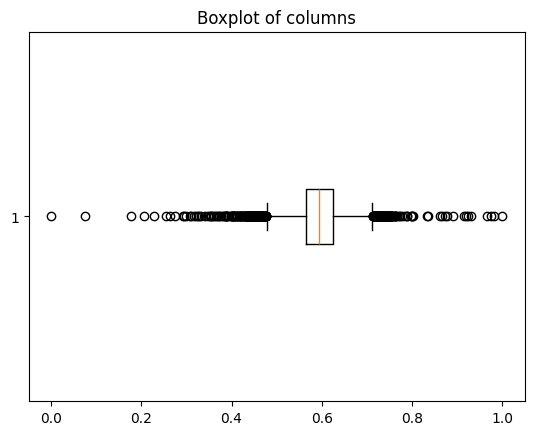

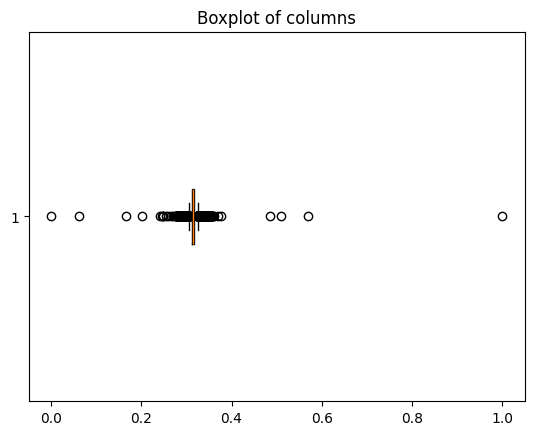

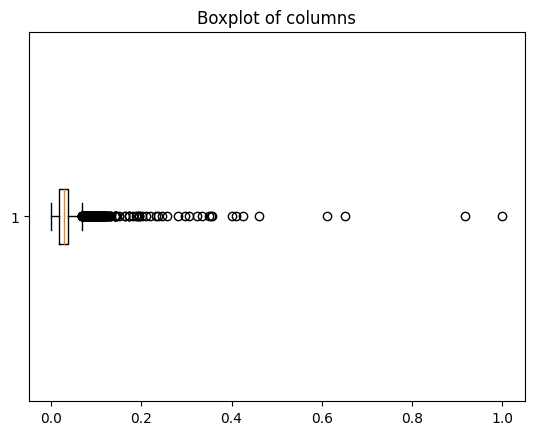

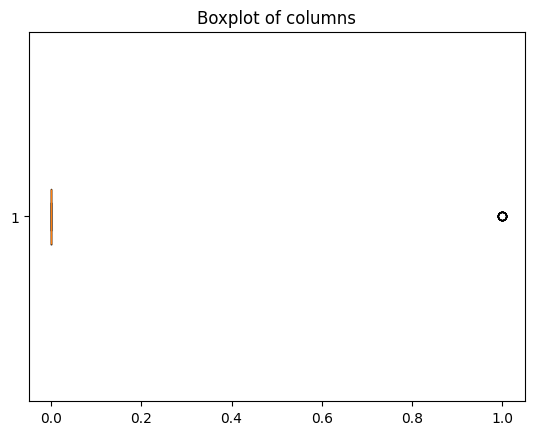

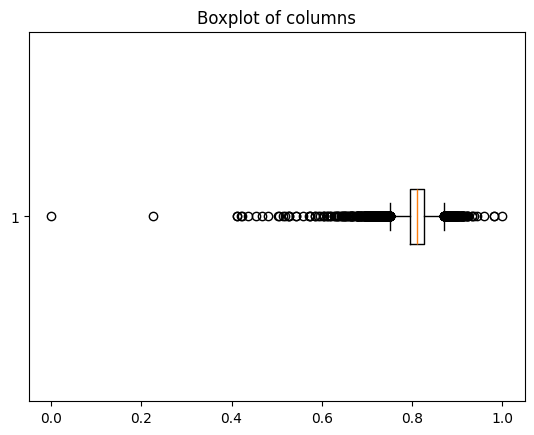

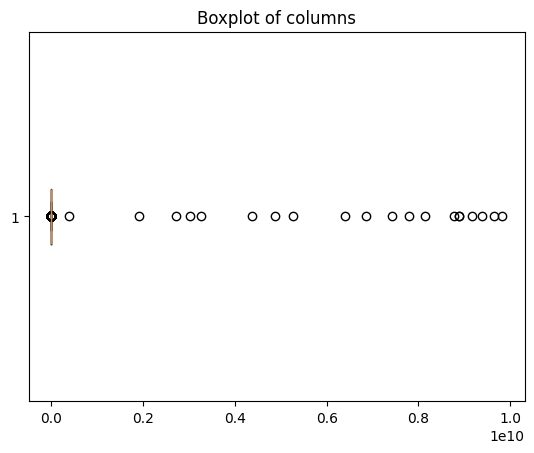

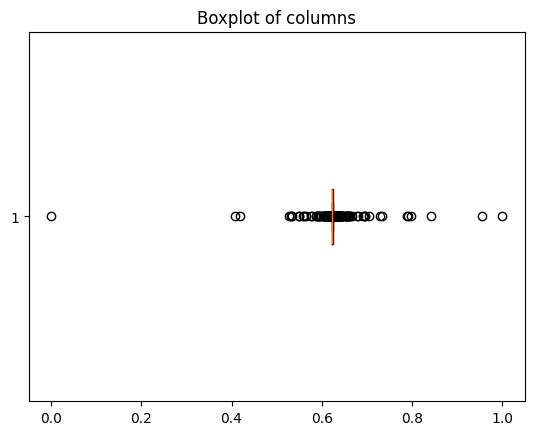

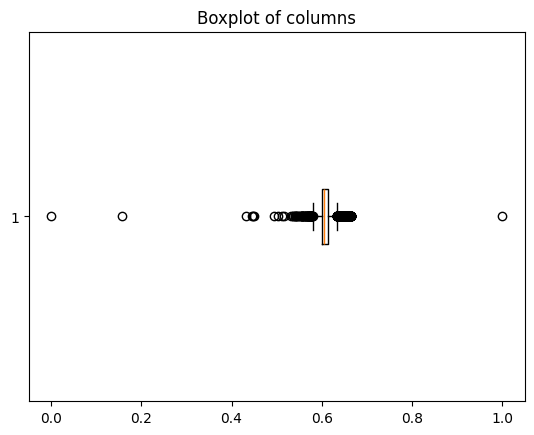

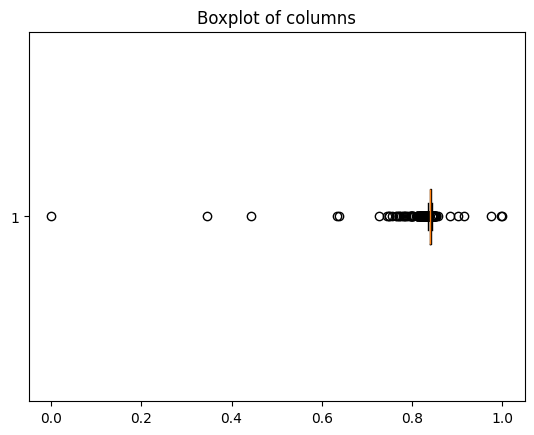

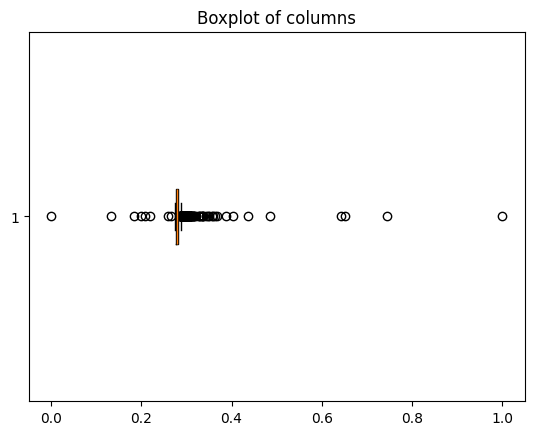

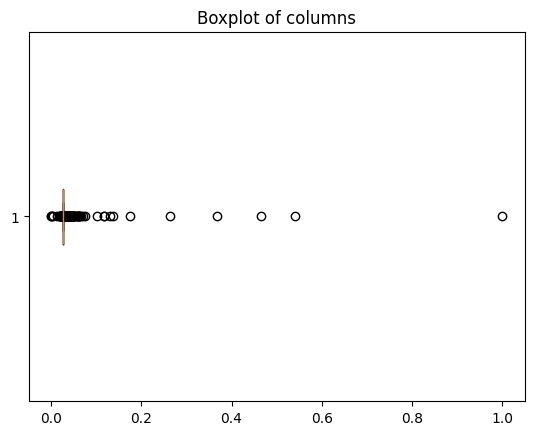

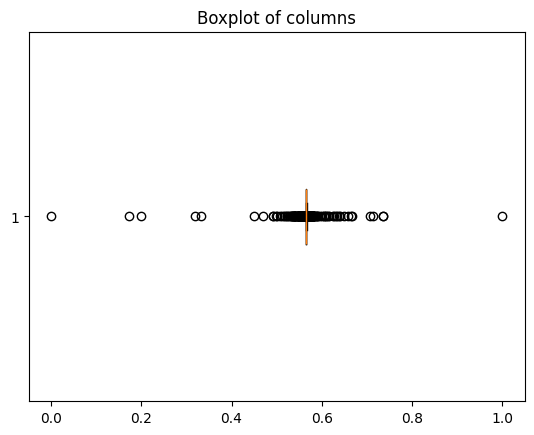

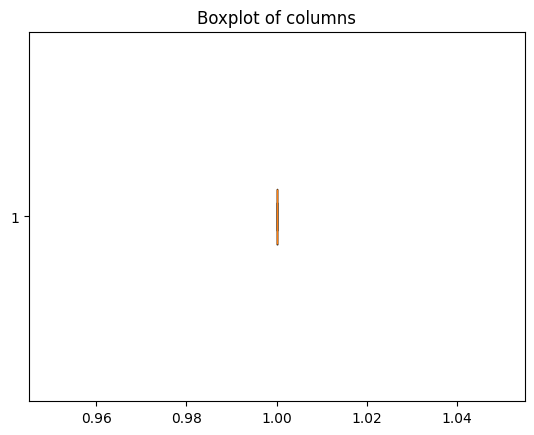

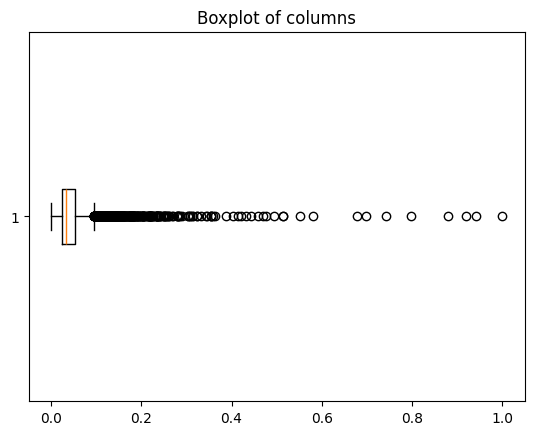

In [40]:
plt.figure(figsize=(15,8))
for col in df_bank.columns:
    plt.boxplot(df_bank[col], vert=False)
    plt.title('Boxplot of columns')
    plt.show()

In [41]:
## Removing outliers

In [42]:
def detect_outlier(data, columns):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        iqr = q3-q1
        
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        X[col] = np.where(X[col] > upper, upper, np.where(X[col] < lower, lower, X[col]))
    return data

In [43]:
X= detect_outlier(X, X.columns)

In [44]:
X.head()

roa_c_    roa_a_    roa_b_  operating_gross_margin  \
0  0.387973  0.455122  0.442034                0.601457   
1  0.464291  0.538214  0.516730                0.610235   
2  0.426071  0.499019  0.472295                0.601450   
3  0.399844  0.455122  0.457733                0.583541   
4  0.465022  0.538432  0.522298                0.598783   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998781   
4                     0.598783               0.998973   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                   0.797096                     0.809075   
1                   0.797380                     0.809301   
2                   0.797096                     0.809075   
3                   0.797096                     0.809075   
4                   0.797366                     0.809304   

   non_industry_income_and_expenditure_revenue  \
0                                     0.303288   
1                                     0.303556   
2                                     0.303288   
3                                     0.303350   
4                                     0.303475   

   continuous_interest_rate__after_tax_  operating_expense_rate  \
0                              0.781314            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.781314            2.361297e-04   
3                              0.781314            1.078888e-04   
4                              0.781550            7.890000e+09   

   research_and_development_expense_rate  cash_flow_rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   interest_bearing_debt_interest_rate  tax_rate__a_  net_value_per_share__b_  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   net_value_per_share__a_  net_value_per_share__c_  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   persistent_eps_in_the_last_four_seasons  cash_flow_per_share  \
0                                 0.178548             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                                 0.193722             0.321674   
4                                 0.212537             0.319162   

   revenue_per_share__yuan__  operating_profit_per_share__yuan__  \
0                   0.017560                            0.095921   
1                   0.021144                            0.093722   
2                   0.005944                            0.092338   
3                   0.014368                            0.077762   
4                   0.029690                            0.096898   

   per_share_net_profit_before_tax__yuan__  \
0                                 0.138736   
1                                 0.169918   
2                                 0.142803   
3                                 0.148603   
4              

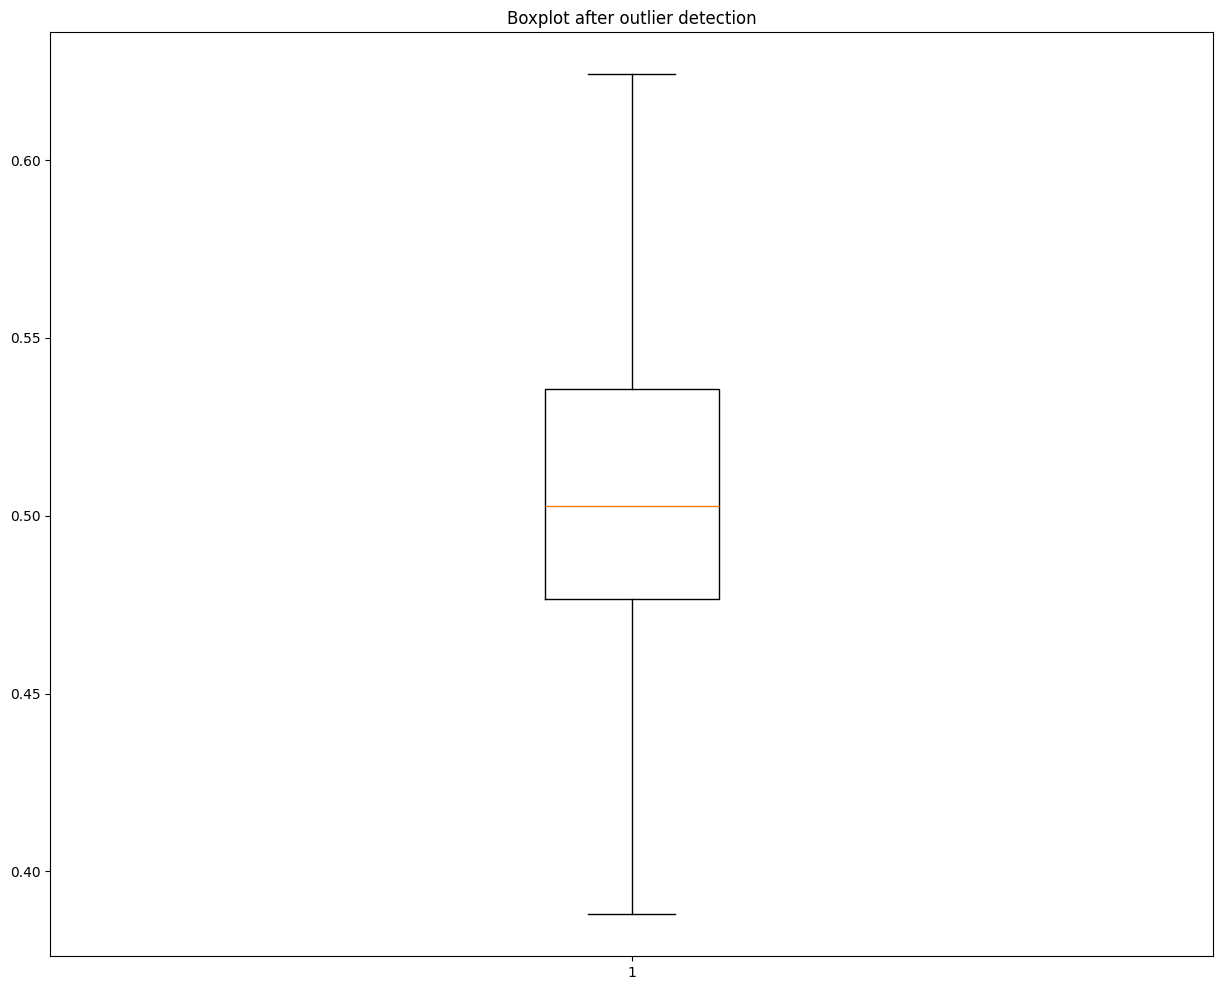

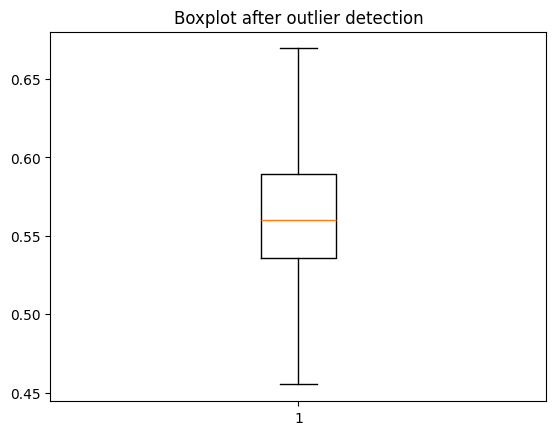

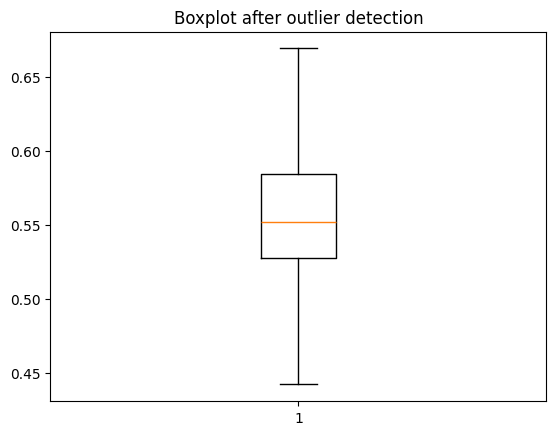

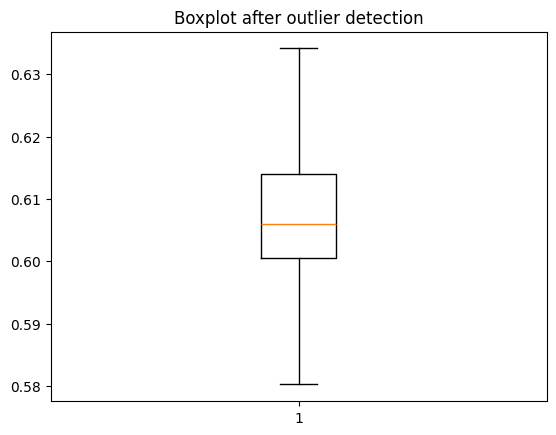

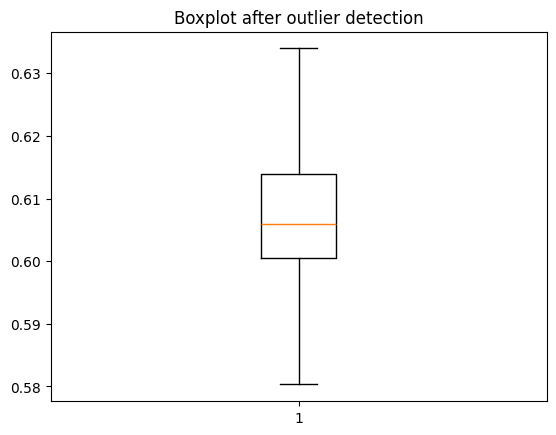

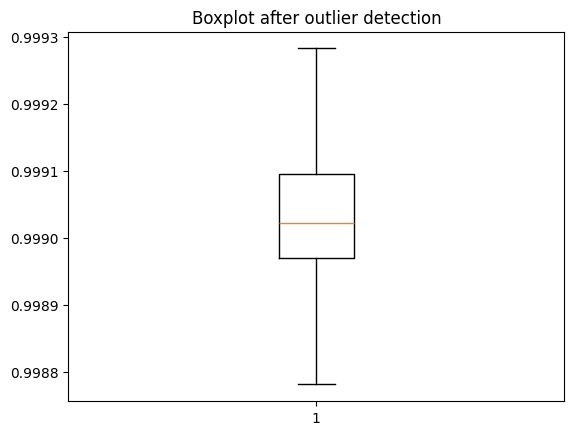

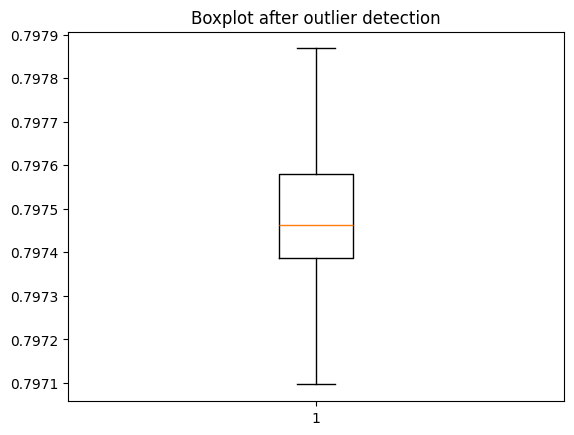

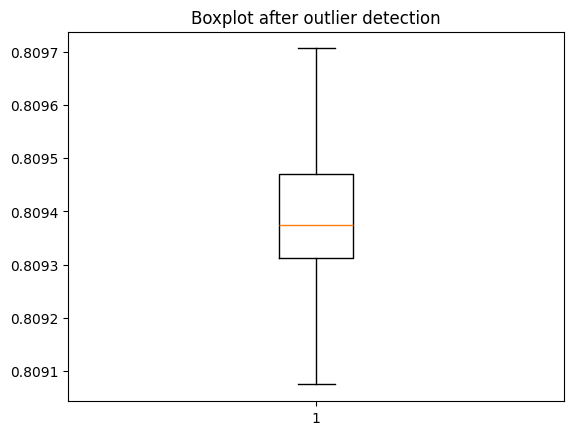

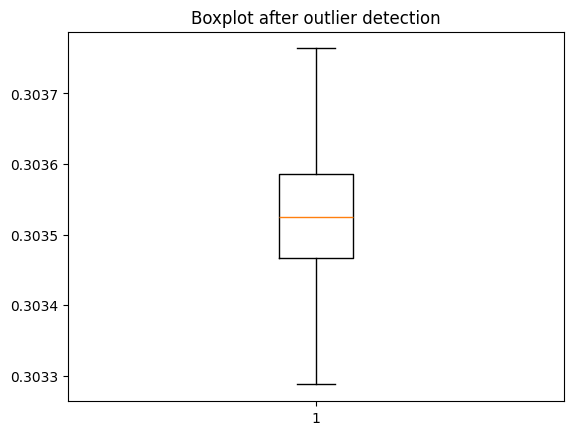

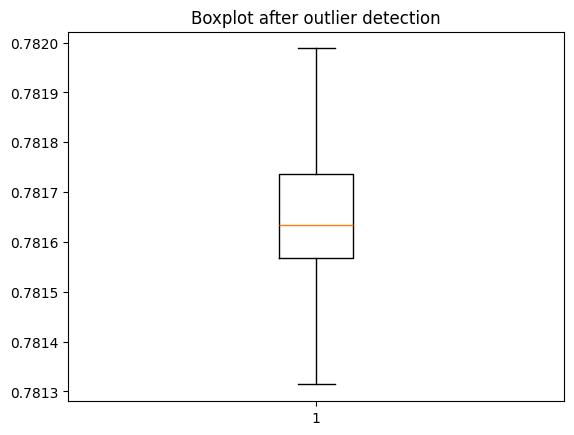

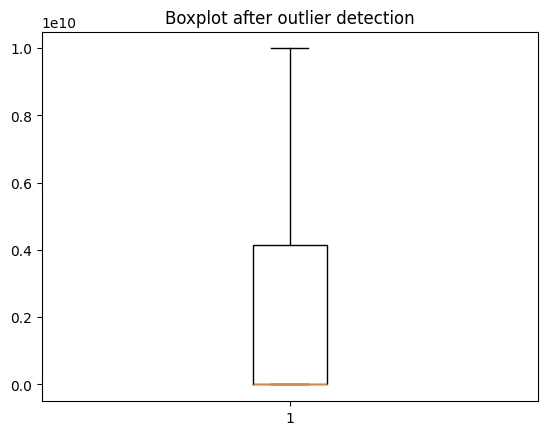

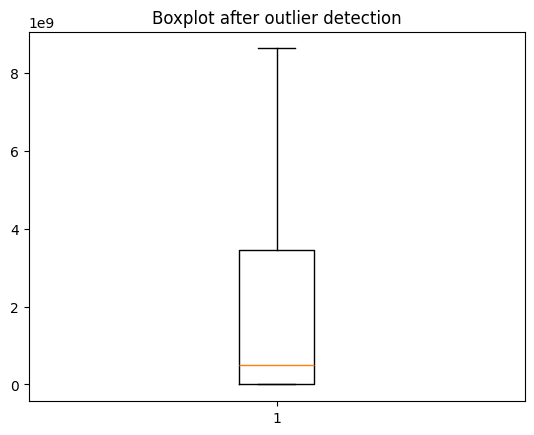

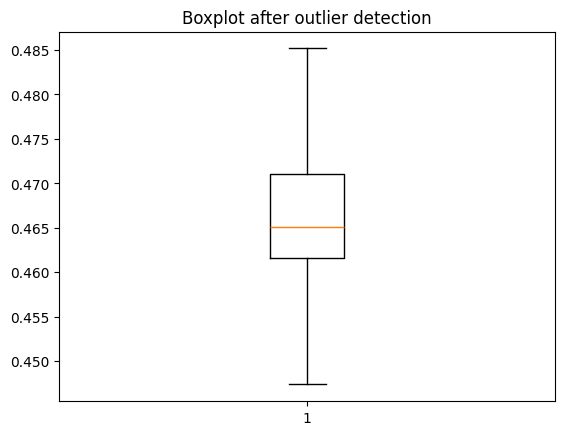

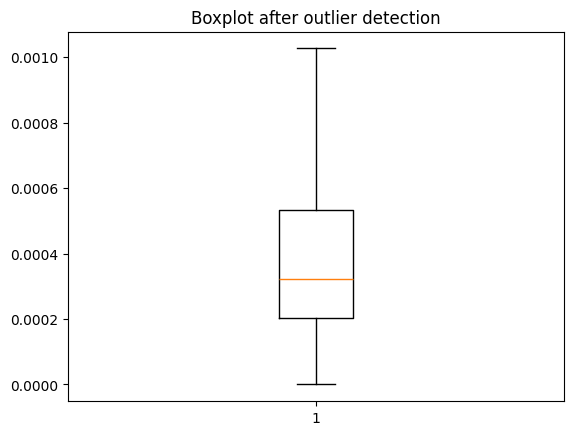

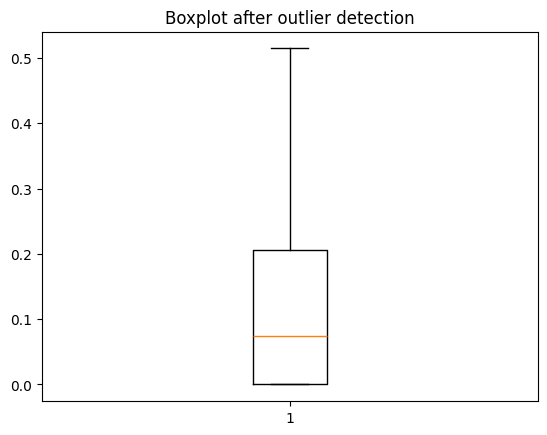

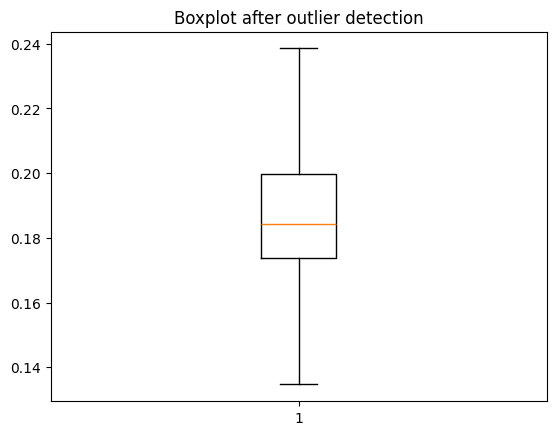

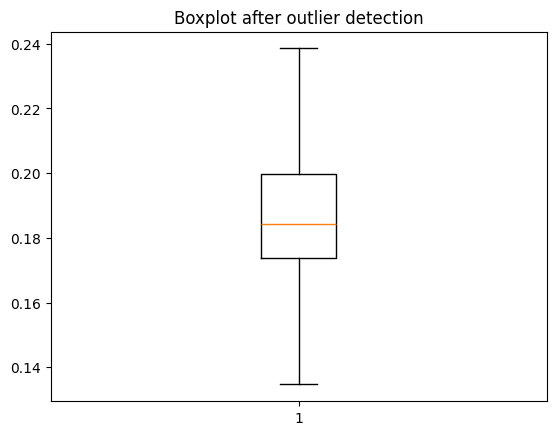

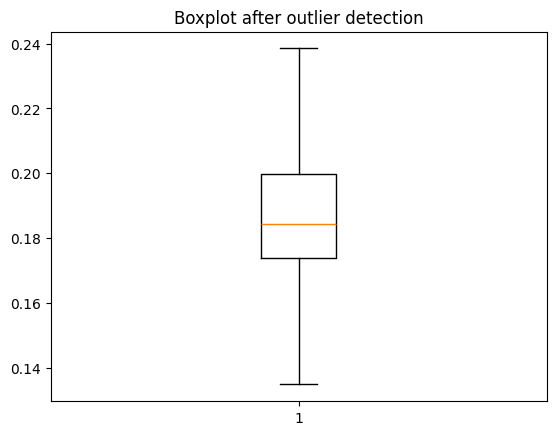

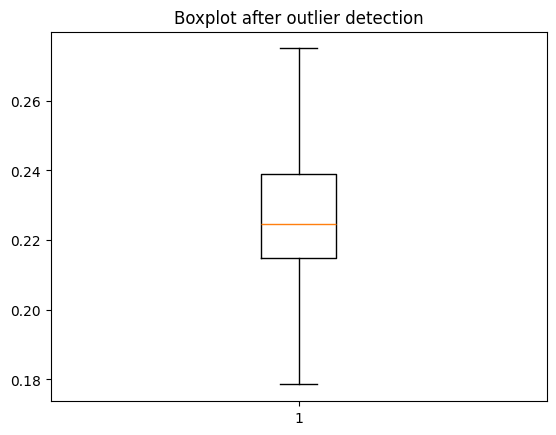

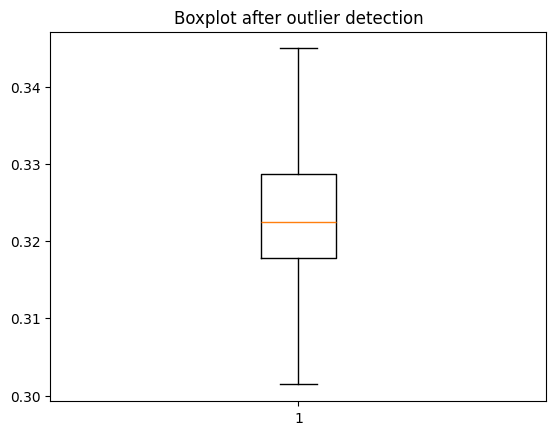

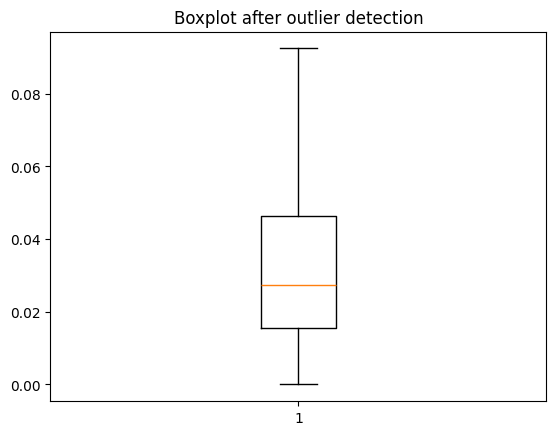

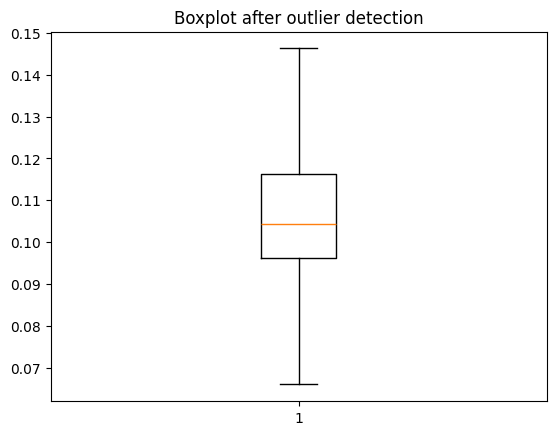

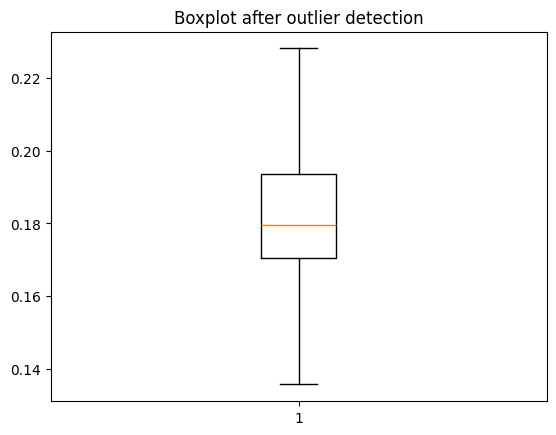

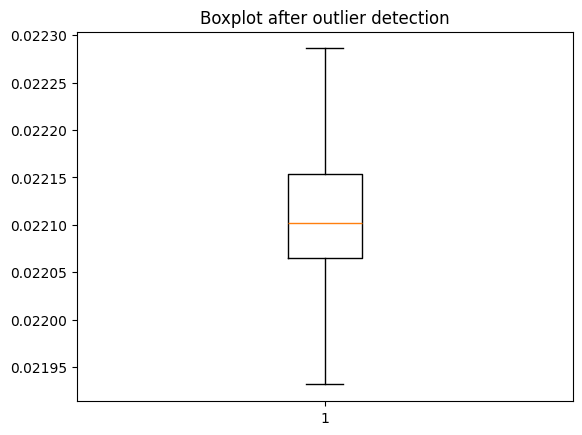

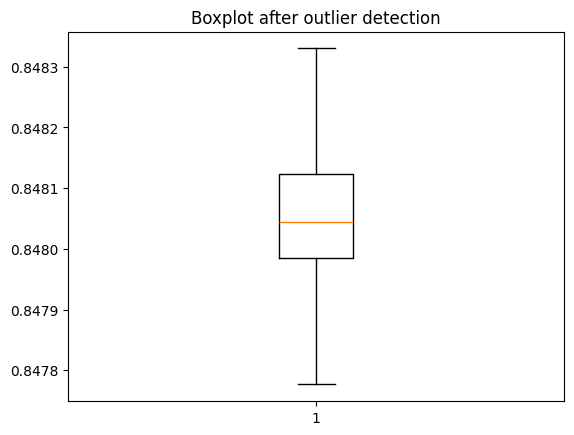

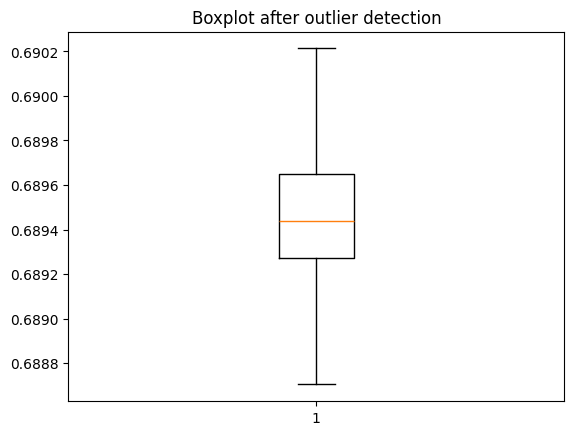

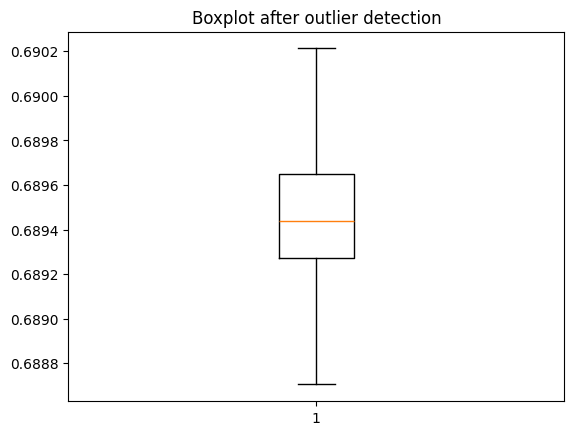

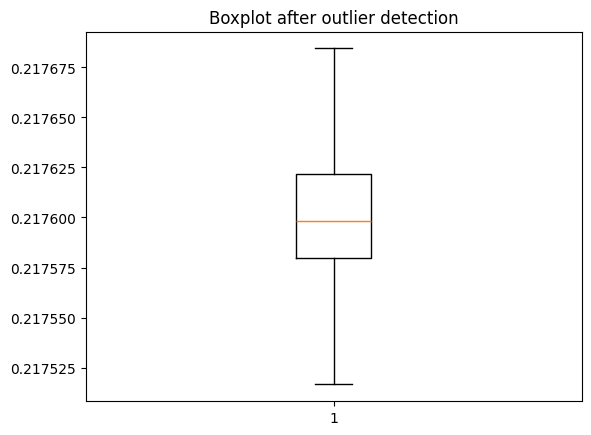

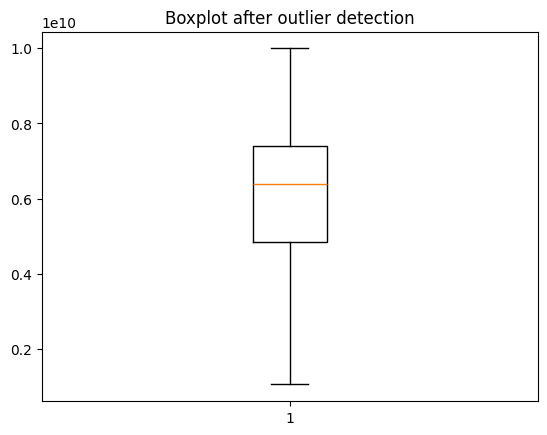

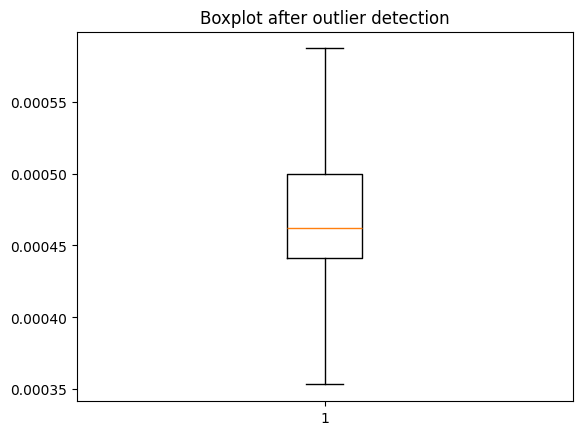

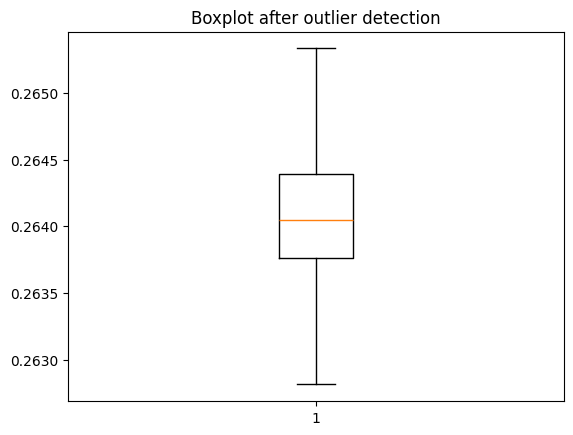

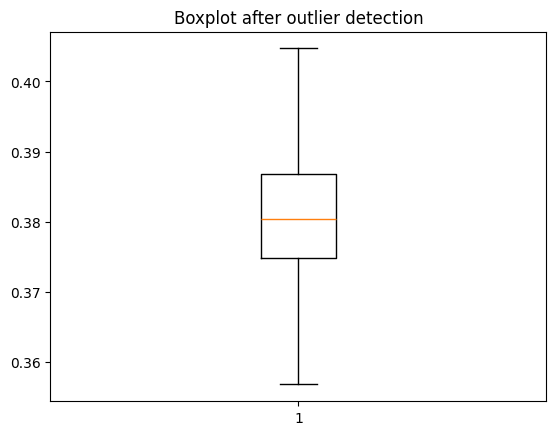

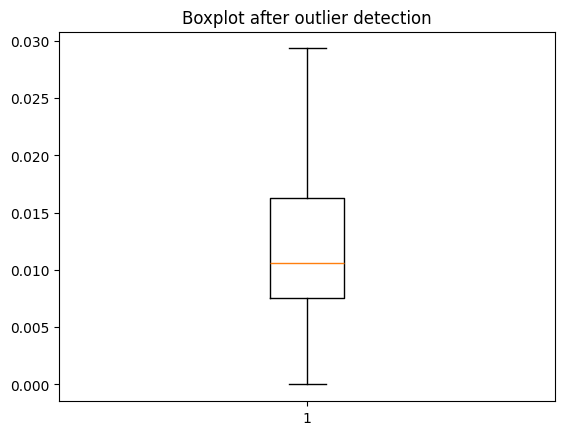

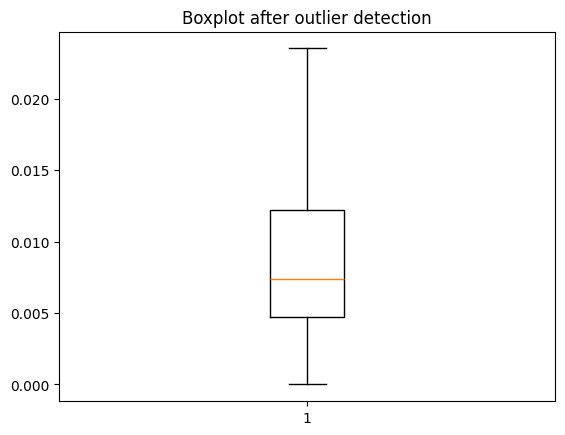

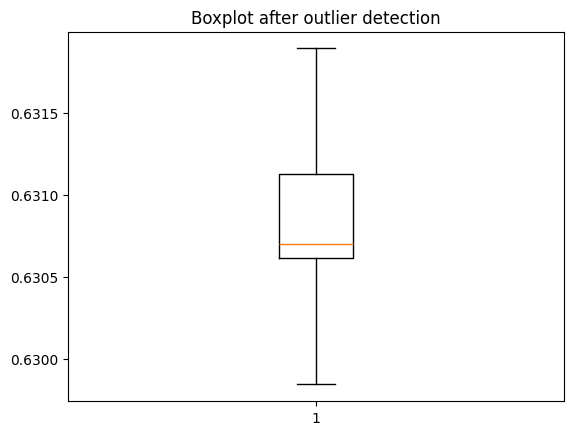

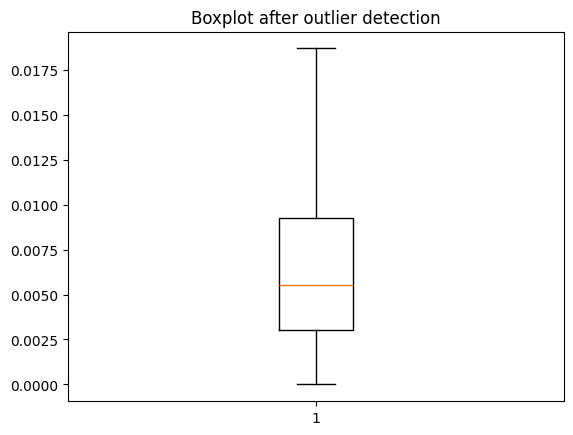

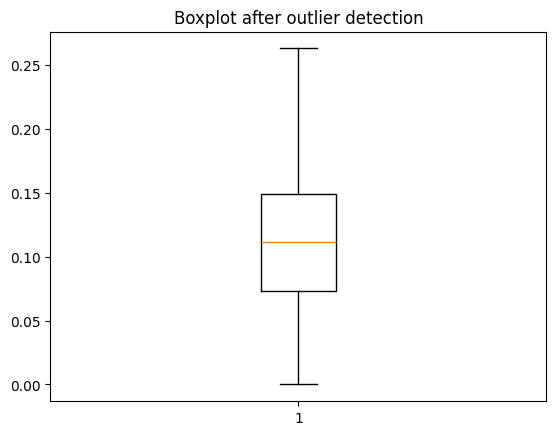

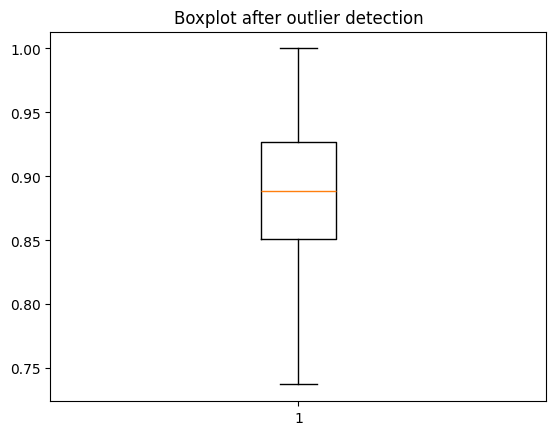

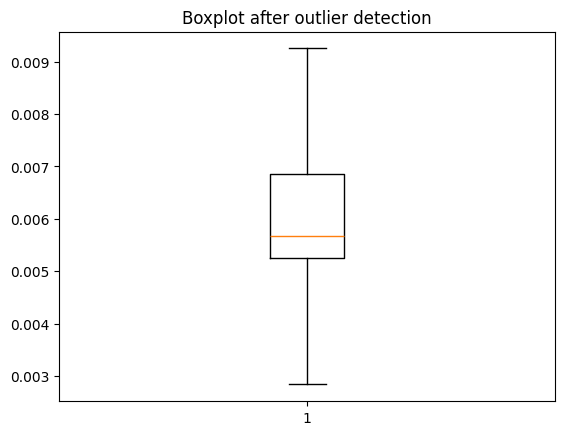

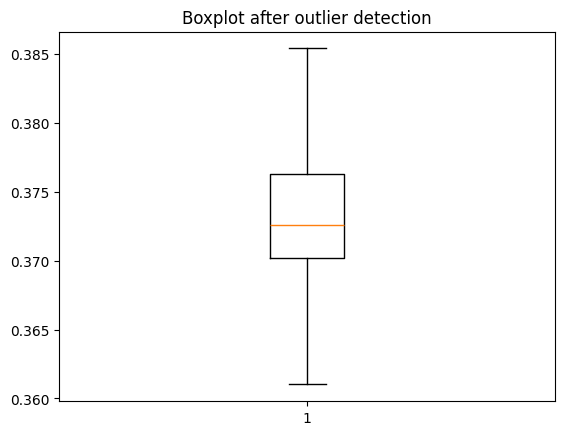

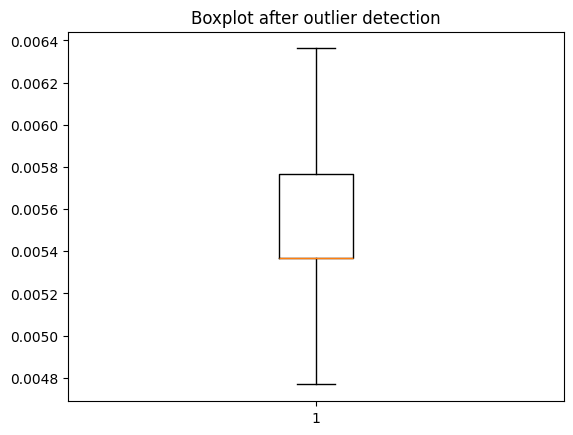

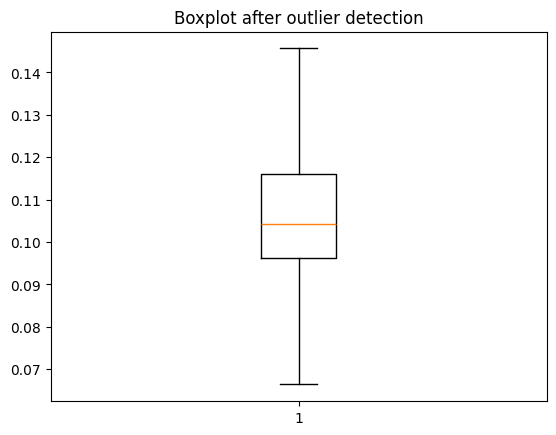

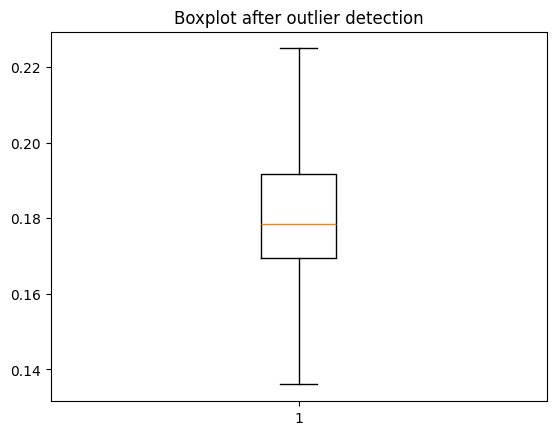

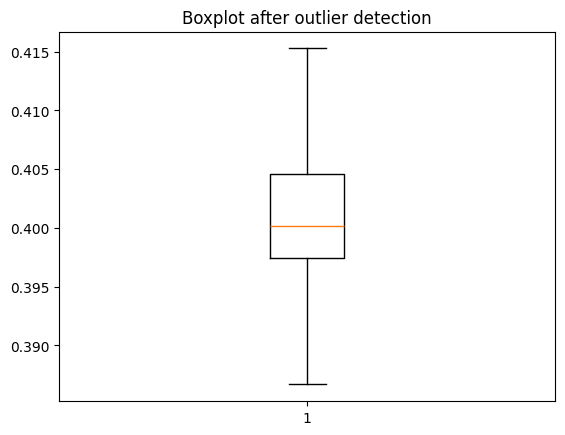

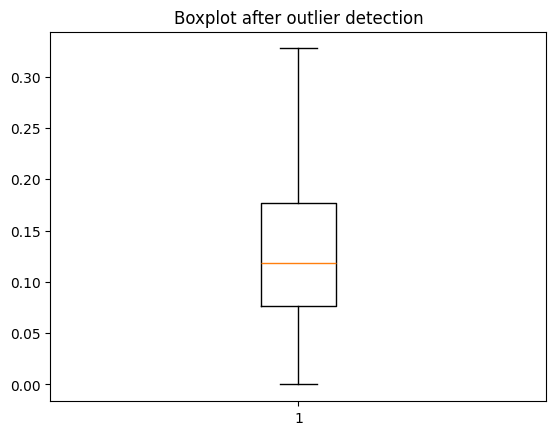

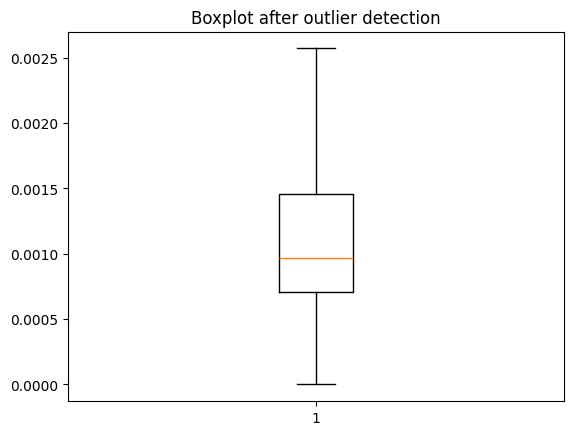

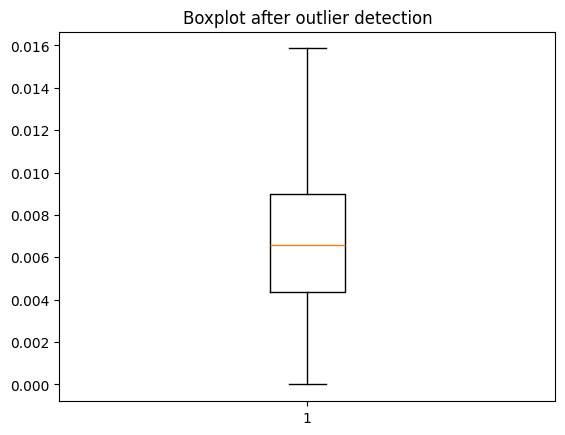

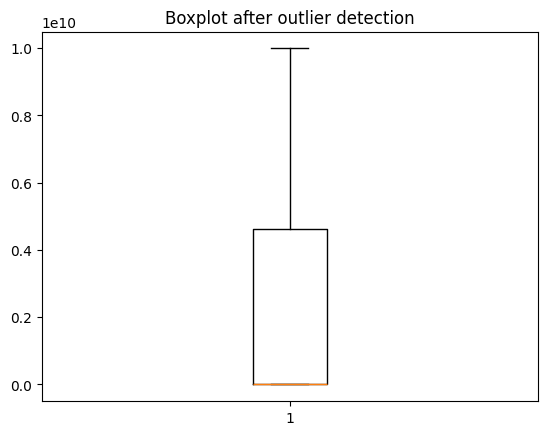

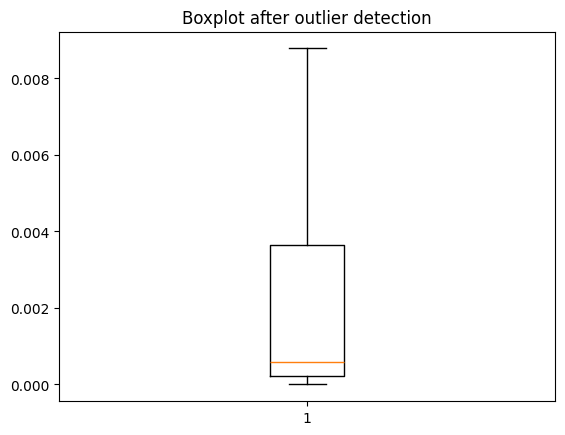

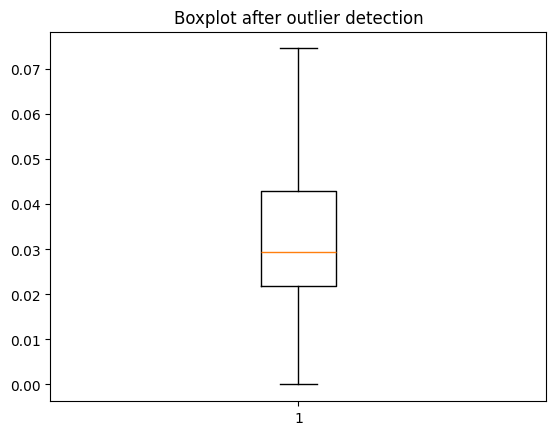

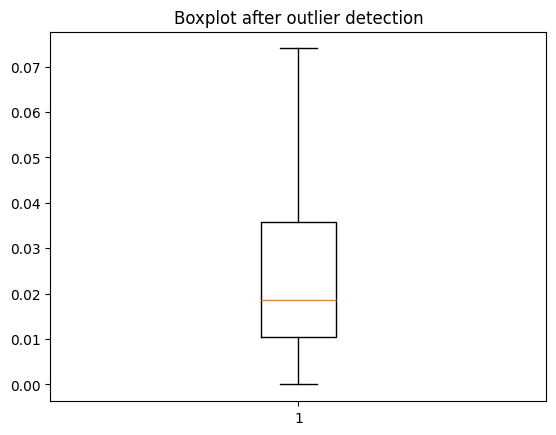

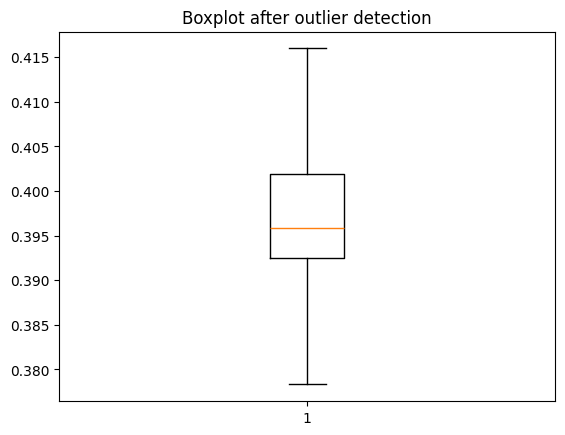

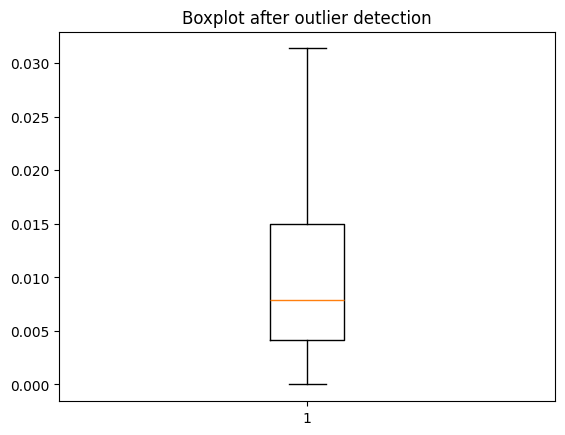

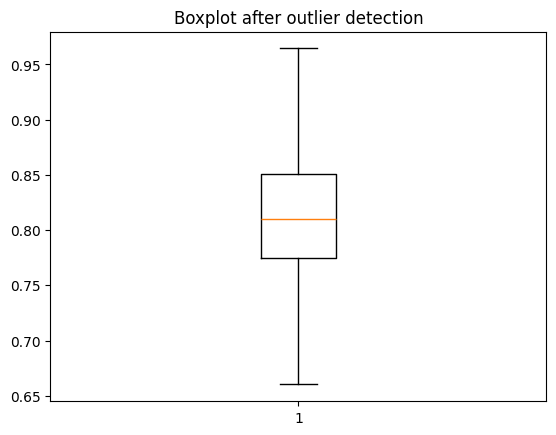

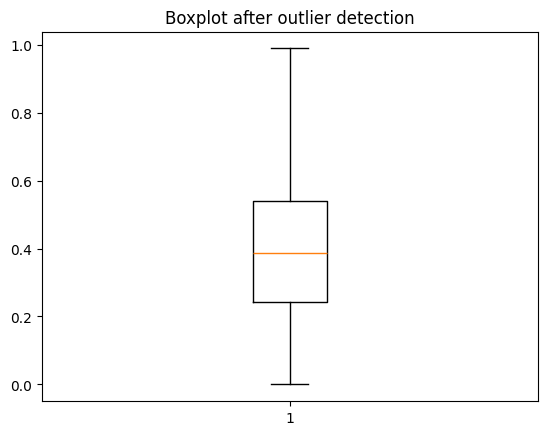

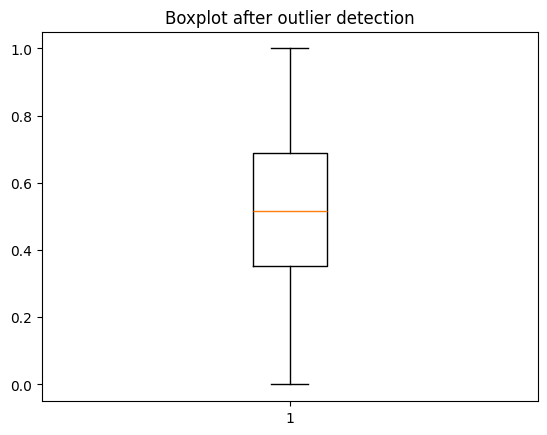

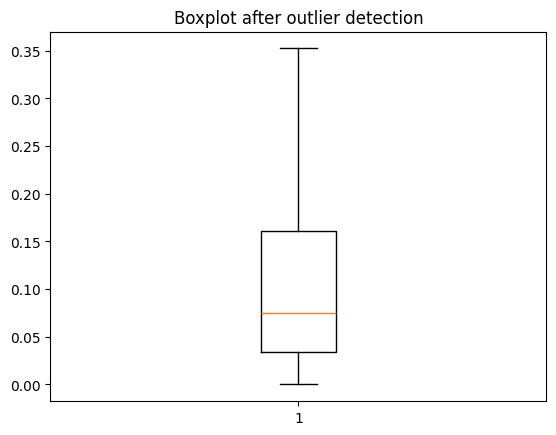

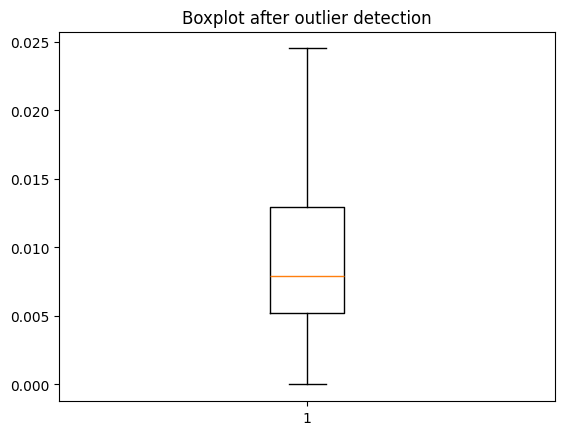

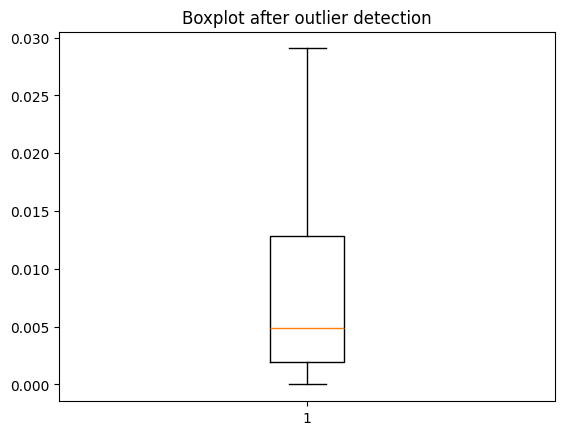

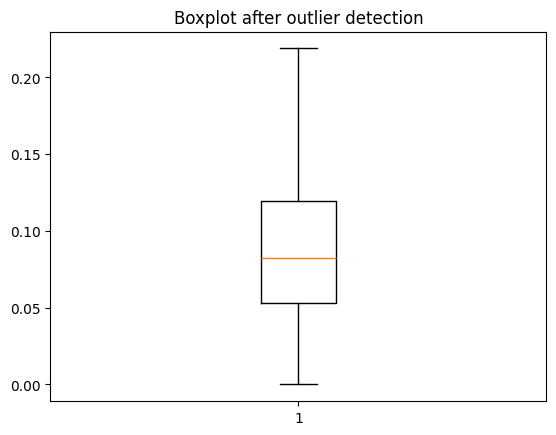

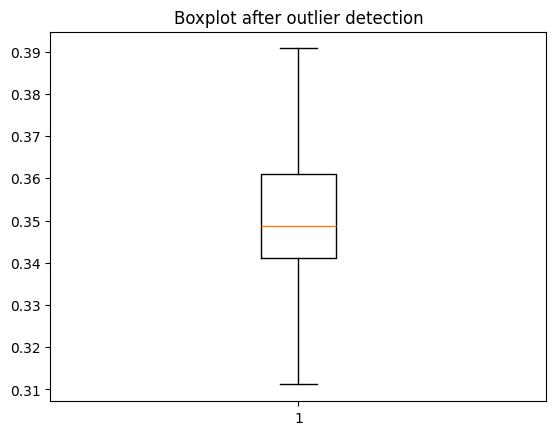

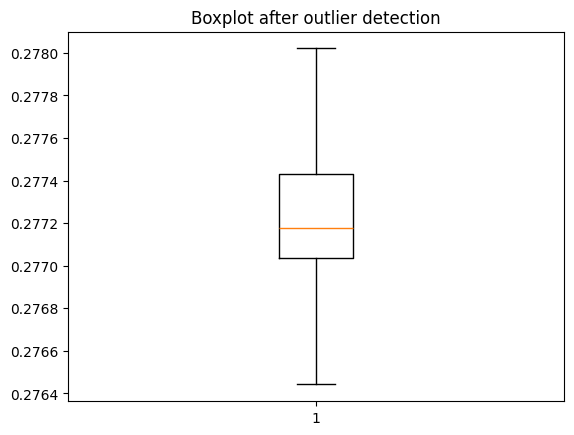

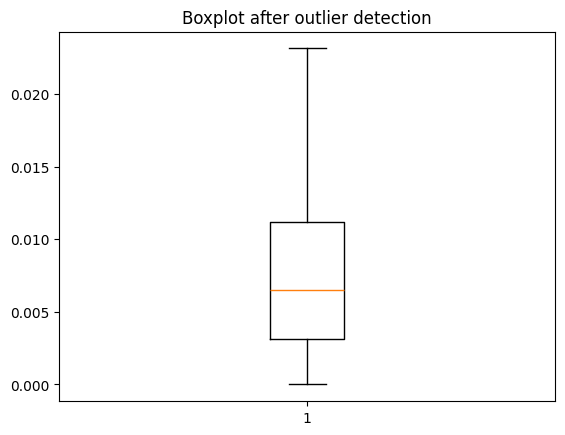

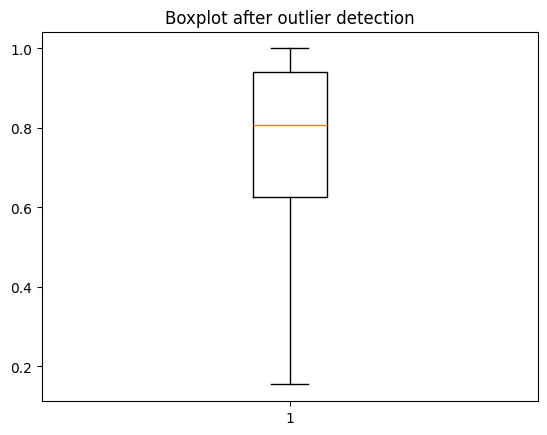

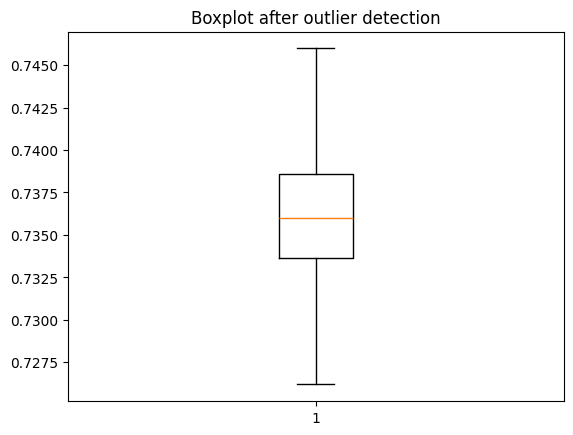

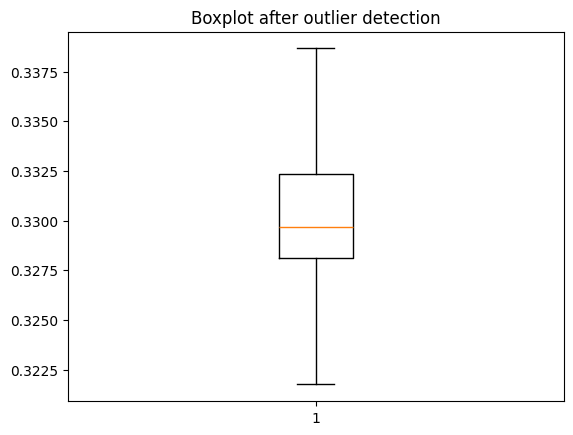

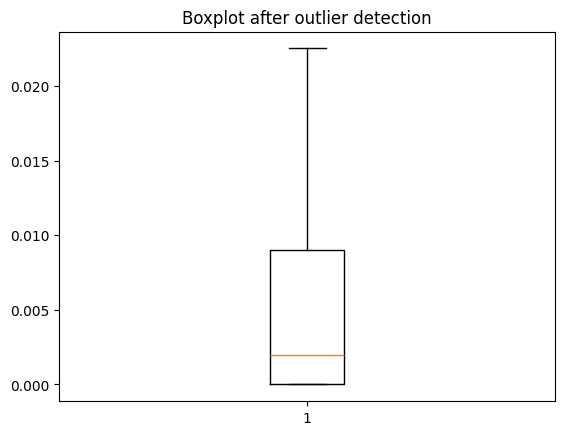

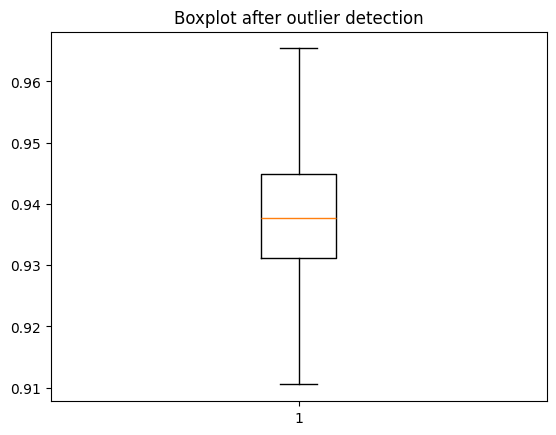

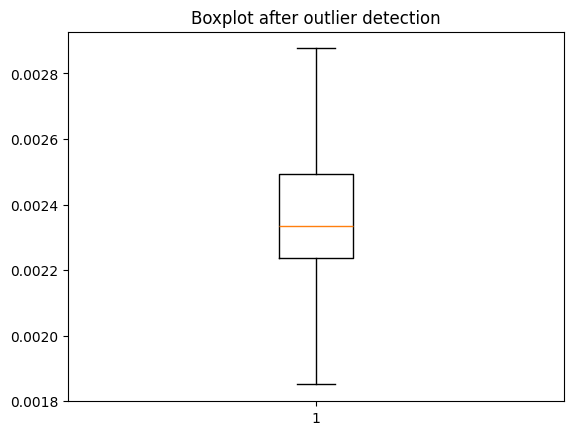

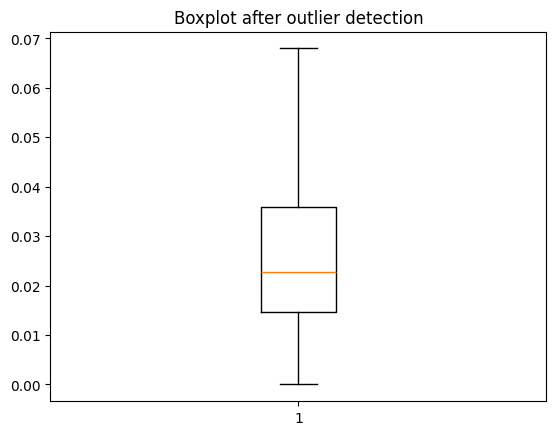

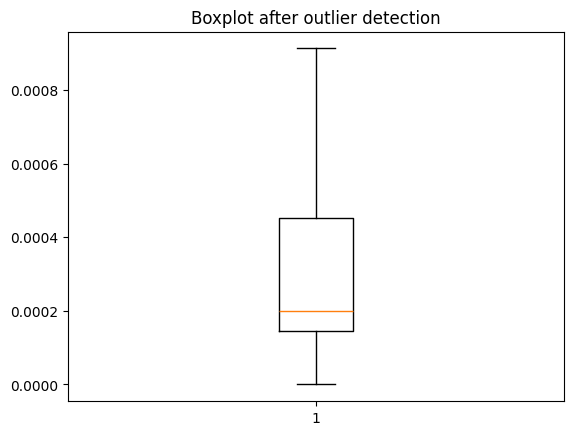

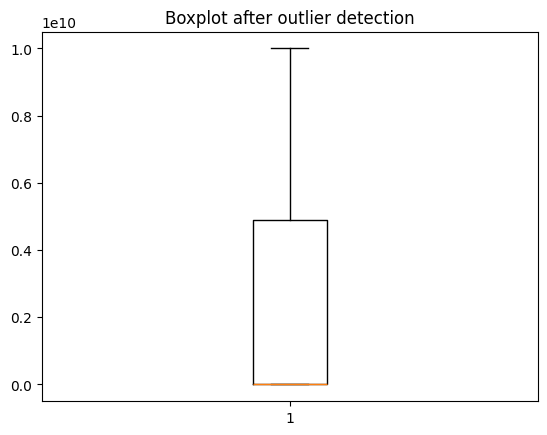

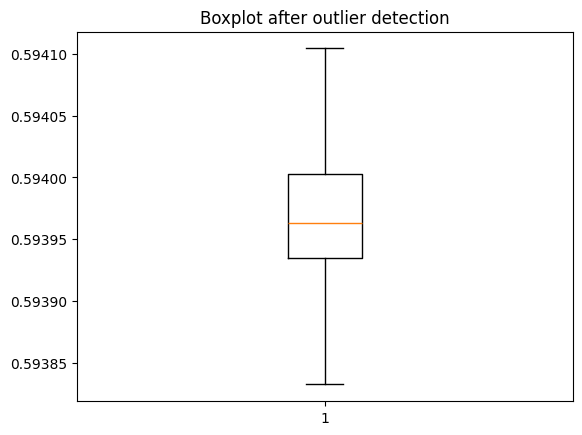

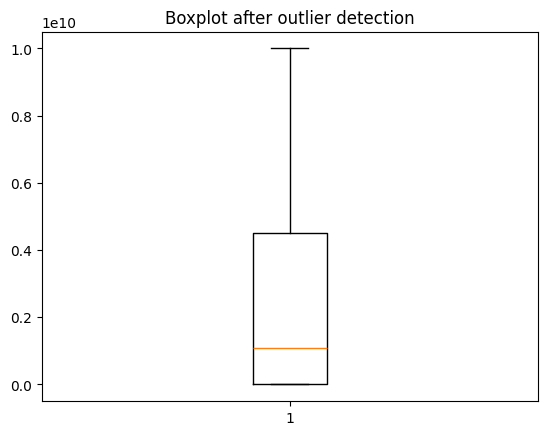

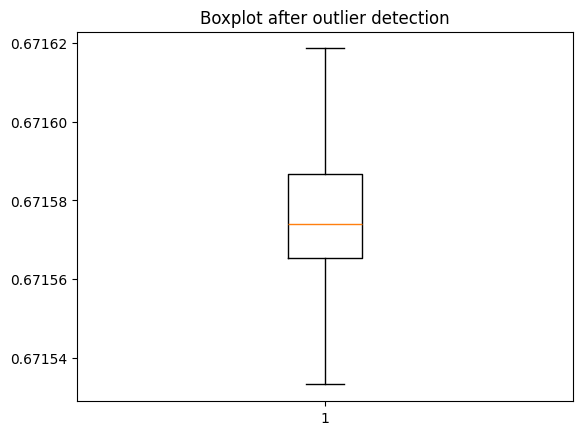

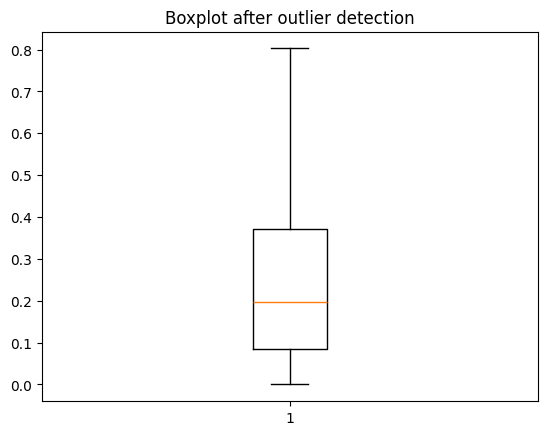

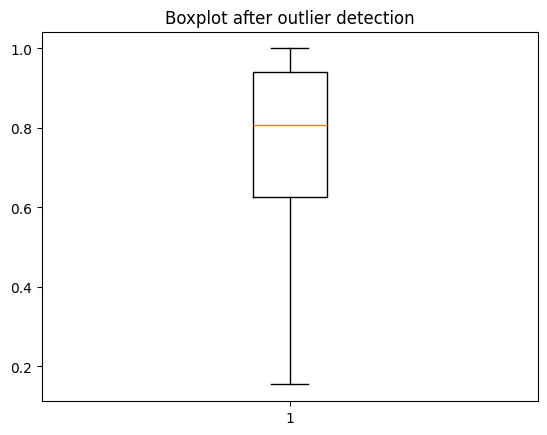

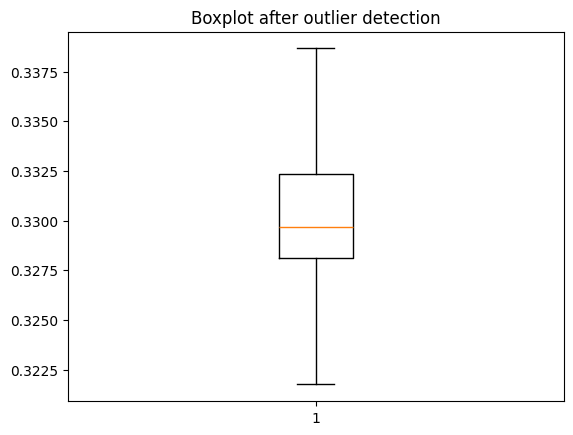

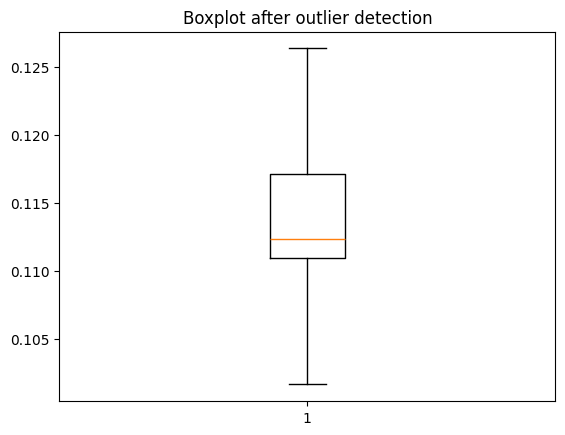

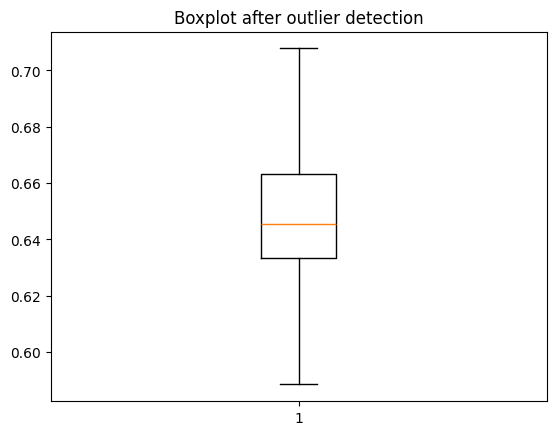

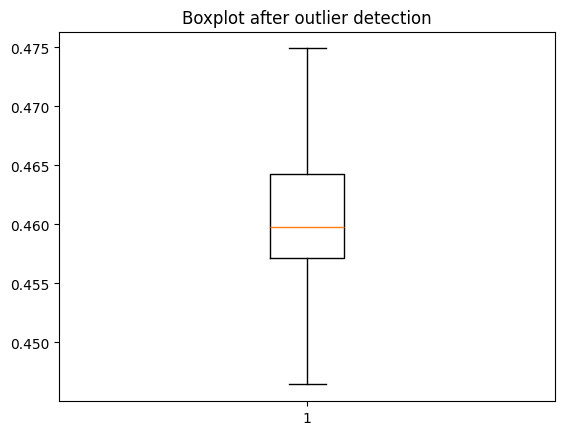

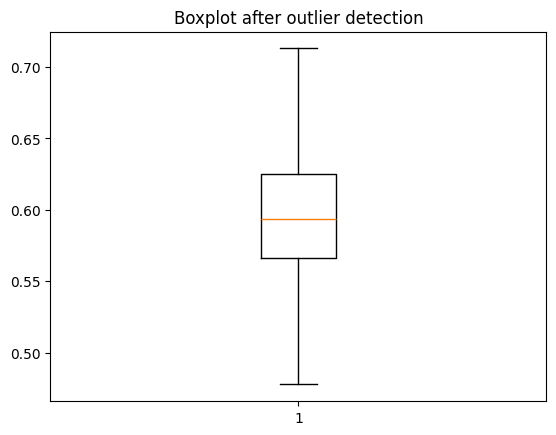

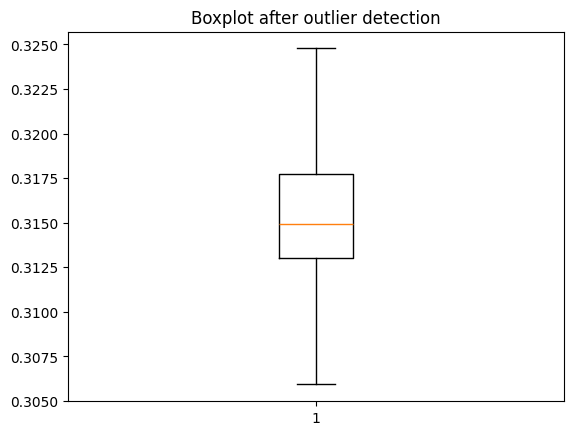

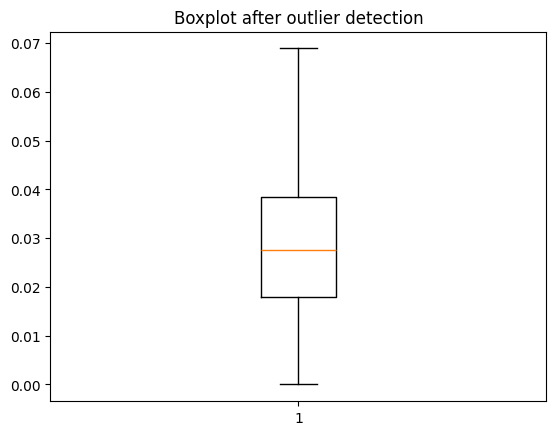

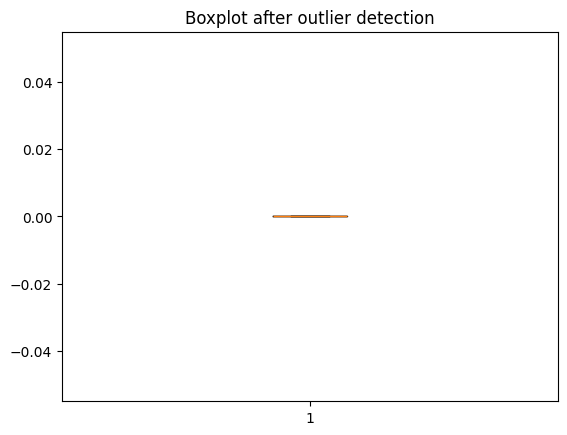

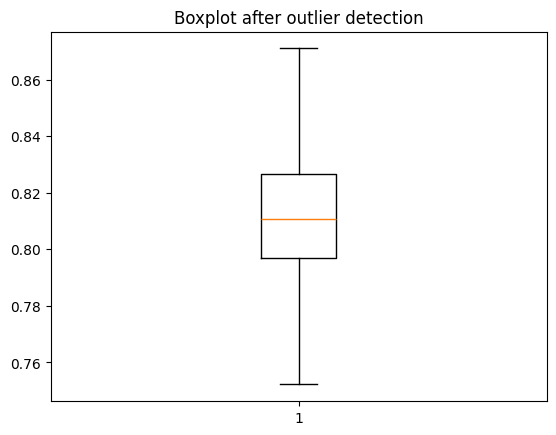

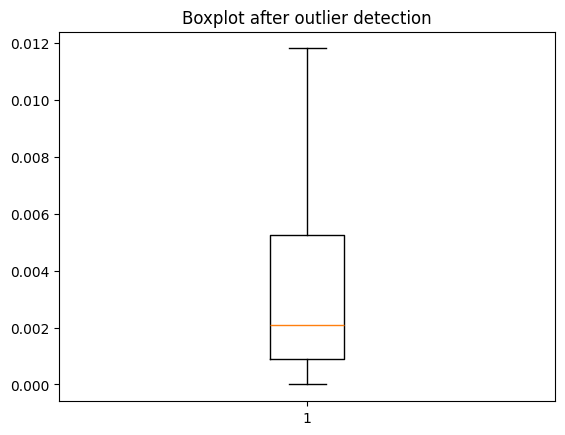

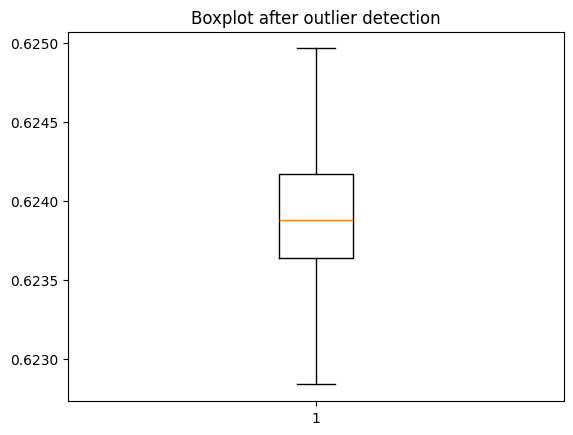

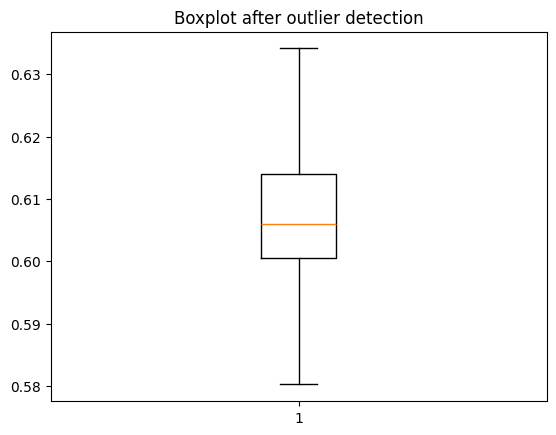

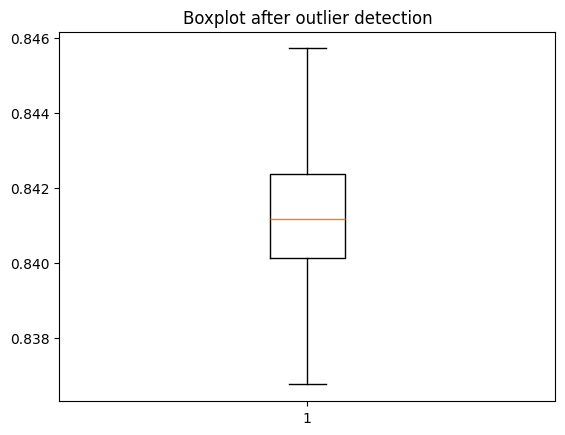

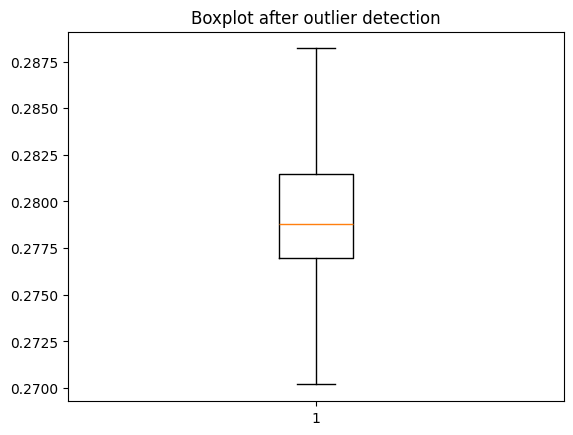

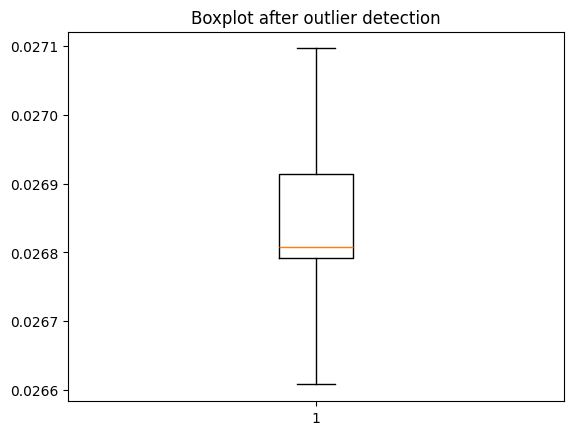

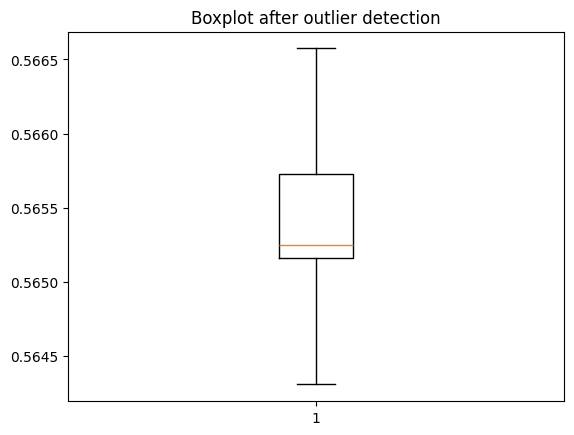

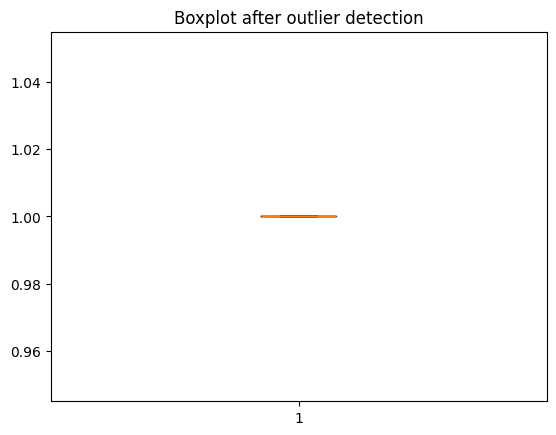

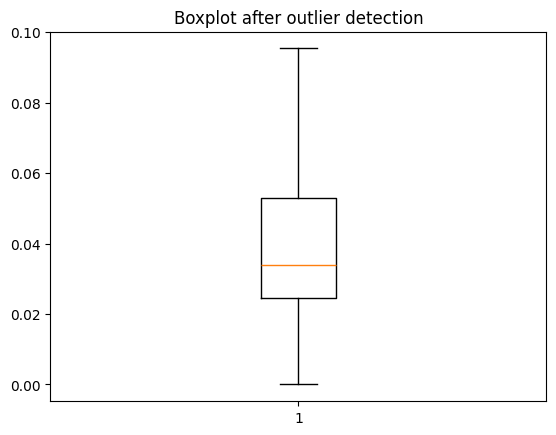

In [45]:
plt.figure(figsize=(15,12))
for col in X.columns:
    plt.boxplot(X[col]) 
    plt.title('Boxplot after outlier detection')
    plt.show()


In [46]:
## Checking data distribution

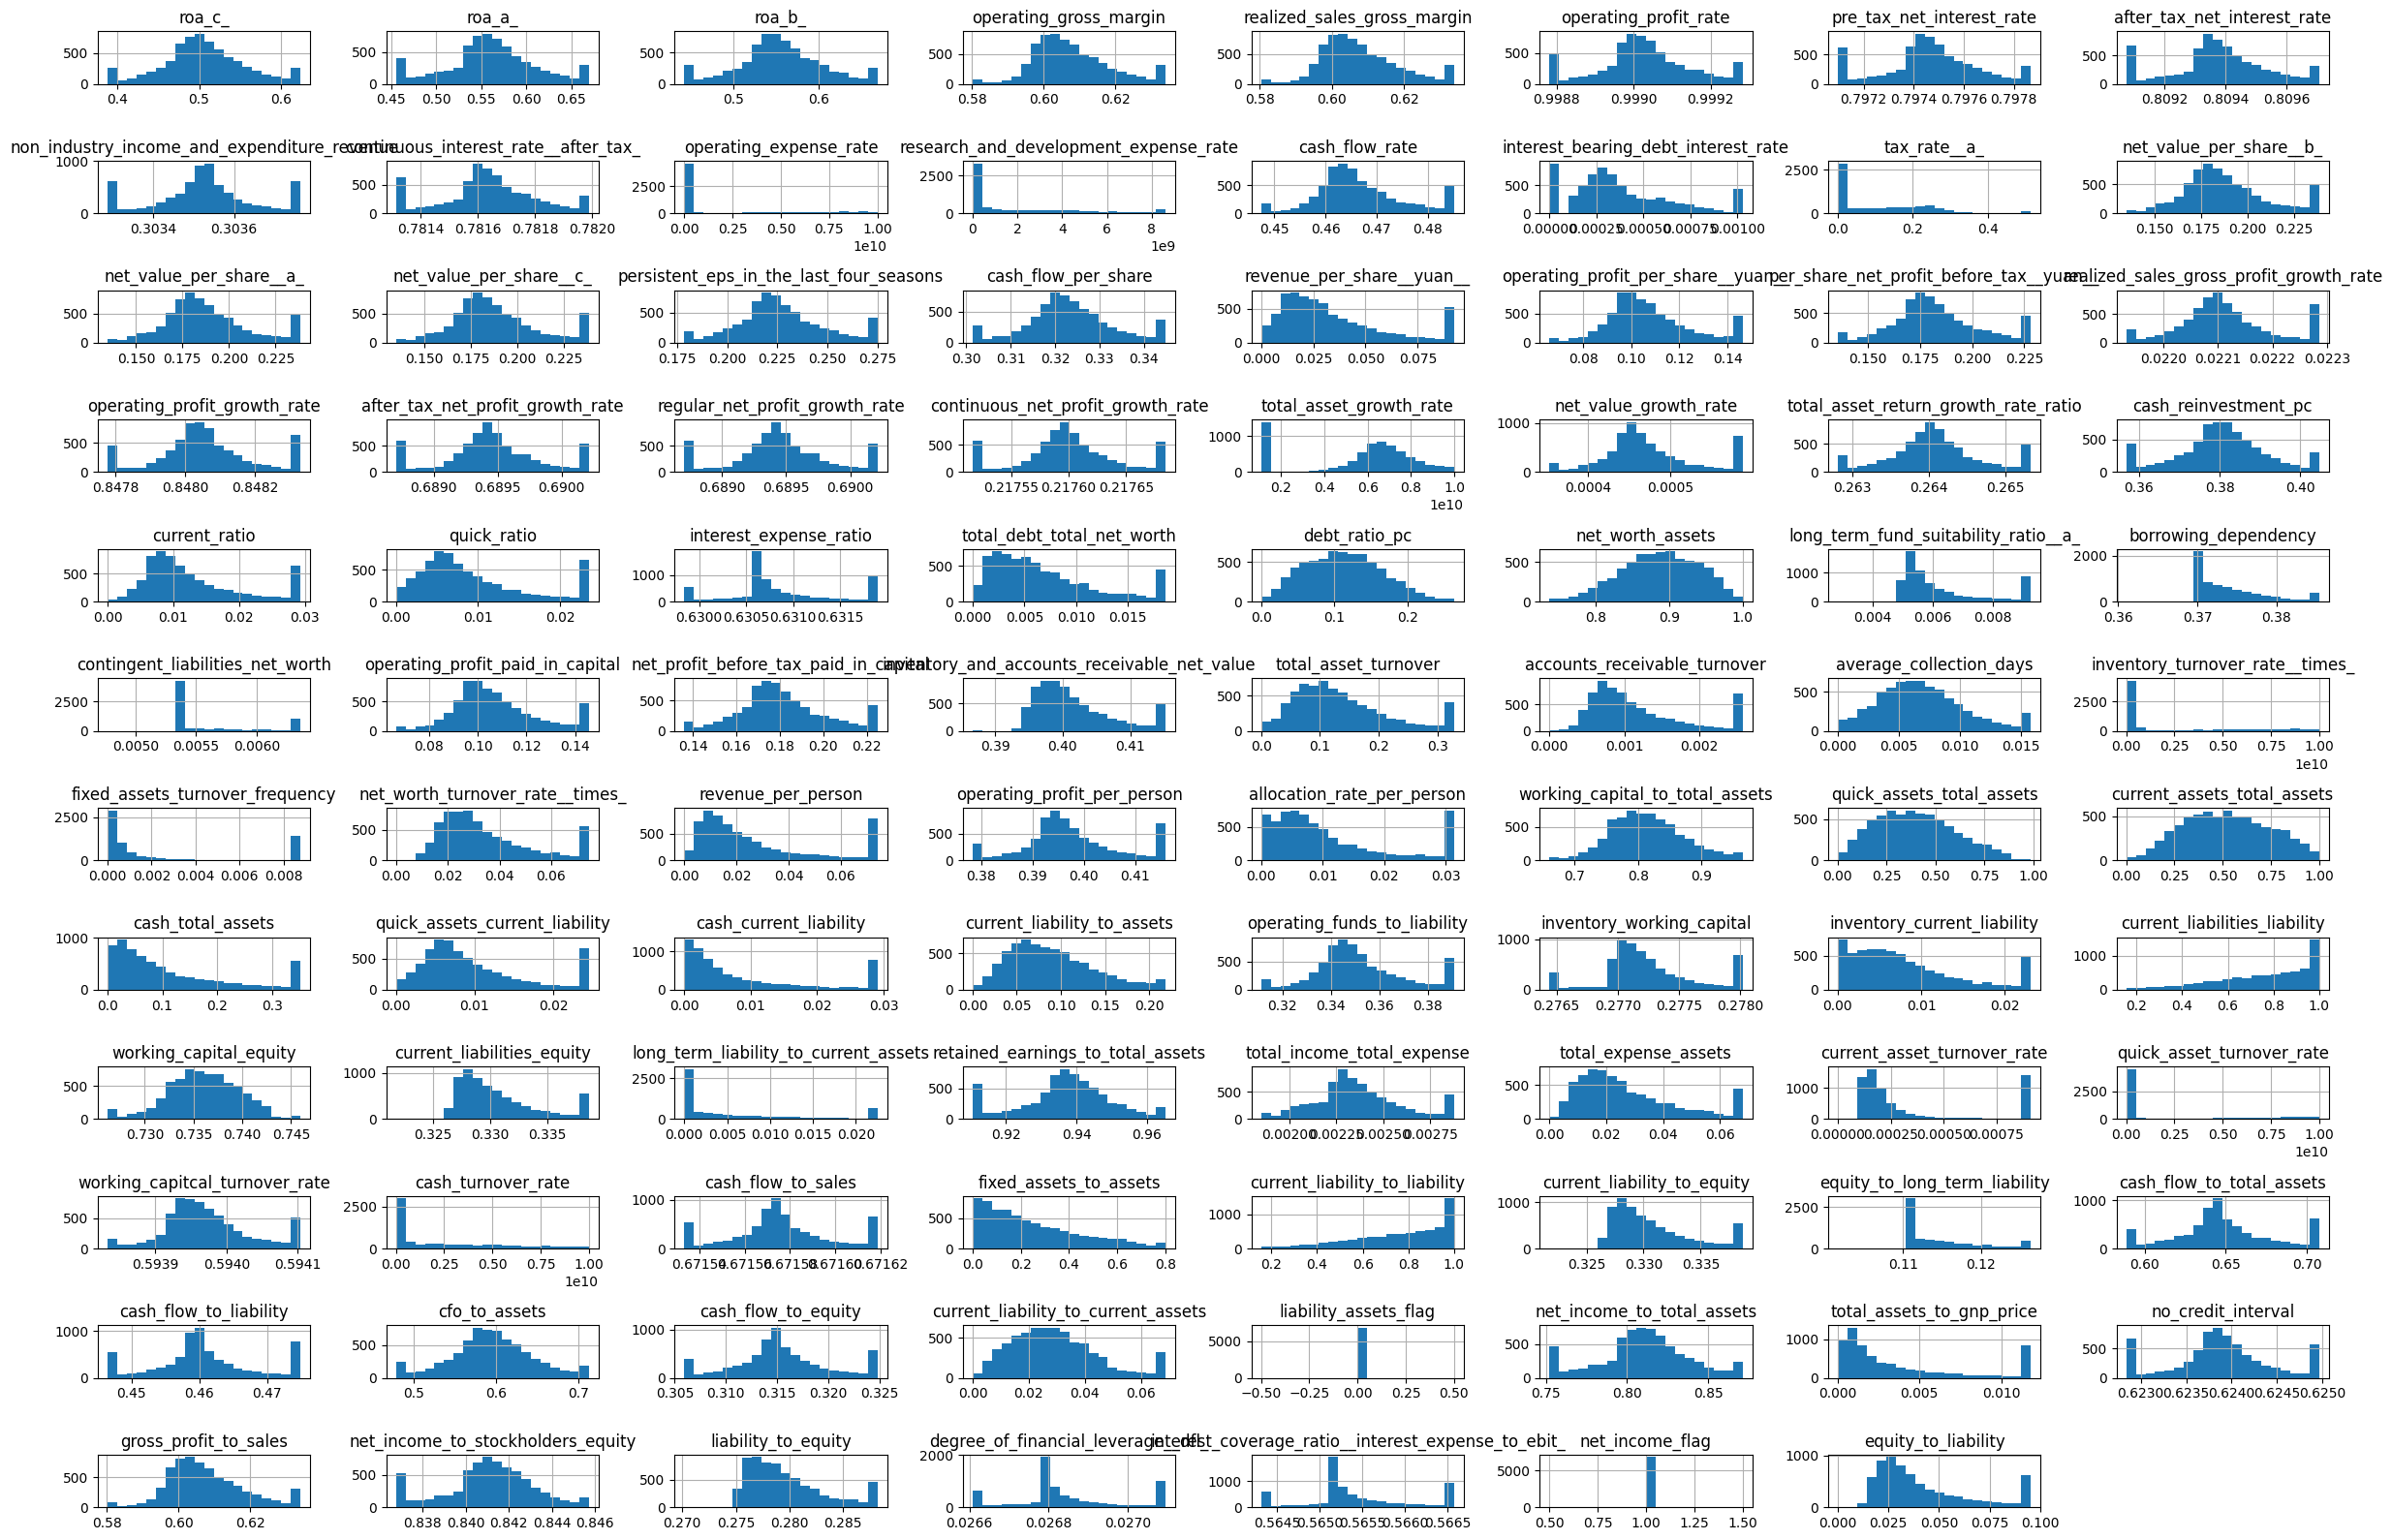

In [47]:
X.hist(bins=20, figsize=(24,16),layout=(12,8))

plt.tight_layout()
plt.show()

In [48]:
## Checking target variable 

In [49]:
y.value_counts()

bankrupt
0    6599
1     220
Name: count, dtype: int64

In [50]:
 y.value_counts()/len(df_bank['bankrupt'])*100

bankrupt
0    96.77372
1     3.22628
Name: count, dtype: float64

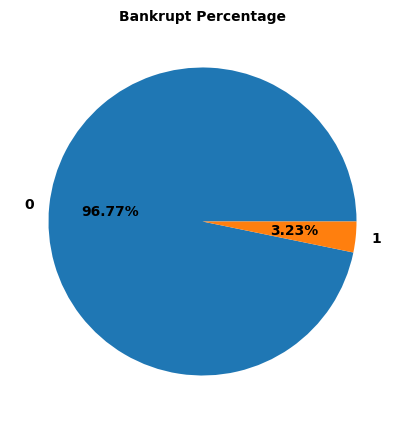

In [51]:
plt.figure(figsize=(5,5))
plt.pie(y.value_counts()
,labels = y.value_counts().index,autopct= '%.2f%%',
       textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Bankrupt Percentage", fontsize = 10, fontweight = "bold")
plt.show()


Text(0, 0.5, 'Count')

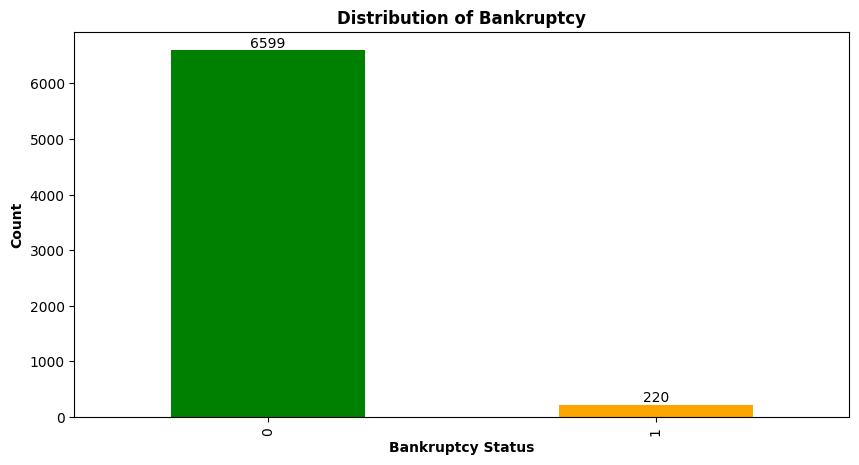

In [52]:
plt.figure(figsize=(10,5))         
barplot = y.value_counts().plot(kind = 'bar',color=['green', 'orange'])
for i in barplot.containers:
    barplot.bar_label(i)
plt.title('Distribution of Bankruptcy',fontweight = "bold")
plt.xlabel('Bankruptcy Status',fontweight = "bold")
plt.ylabel('Count',fontweight = "bold")

### Feature Engineering

#### Recursive Feature Elimination usign Logestic regression:

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
rfe = RFE(LogisticRegression())

In [55]:
rfe.fit(X,y)

RFE(estimator=LogisticRegression())

In [56]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1, 48, 15,  9, 10,
       11,  6,  1, 22, 17, 12, 26,  1,  1,  1, 14,  1, 45,  7,  1, 25, 32,
        1, 38, 33,  1, 35,  1, 37, 18, 13,  1, 16, 42, 36,  1, 41, 23, 28,
        1, 40,  1,  1,  1,  8, 31, 29, 27,  1,  4, 34,  1,  1,  1, 46,  1,
       39, 30, 47,  1,  1,  1,  1, 20,  1,  1, 19,  1,  1,  1,  2, 44, 49,
        1, 43,  1,  1,  1,  5, 24,  1,  1, 21])

In [57]:
rfe.get_feature_names_out()

array(['roa_c_', 'roa_a_', 'roa_b_', 'operating_gross_margin',
       'realized_sales_gross_margin', 'operating_profit_rate',
       'pre_tax_net_interest_rate', 'after_tax_net_interest_rate',
       'continuous_interest_rate__after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'cash_flow_per_share', 'operating_profit_growth_rate',
       'after_tax_net_profit_growth_rate',
       'regular_net_profit_growth_rate', 'total_asset_growth_rate',
       'cash_reinvestment_pc', 'interest_expense_ratio',
       'net_worth_assets', 'borrowing_dependency',
       'inventory_and_accounts_receivable_net_value',
       'inventory_turnover_rate__times_', 'operating_profit_per_person',
       'working_capital_to_total_assets', 'quick_assets_total_assets',
       'current_assets_total_assets', 'operating_funds_to_liability',
       'current_liabilities_liability', 'working_capital_equity',
       'current_liabilities_equity', 'retained_earnin

In [58]:
rfe1 = {'column' : X.columns, 'Rank' : rfe.ranking_}

In [59]:
df_rfe1 = pd.DataFrame(rfe1)
df_rfe1.sort_values('Rank')

column  Rank
0                                        roa_c_     1
37                             net_worth_assets     1
39                         borrowing_dependency     1
43  inventory_and_accounts_receivable_net_value     1
93                              net_income_flag     1
..                                          ...   ...
29                        net_value_growth_rate    45
66        long_term_liability_to_current_assets    46
70                  current_asset_turnover_rate    47
13          interest_bearing_debt_interest_rate    48
84                        liability_assets_flag    49

[95 rows x 2 columns]

In [60]:
df_rfe1[df_rfe1['Rank']<10]

column  Rank
0                                              roa_c_     1
1                                              roa_a_     1
2                                              roa_b_     1
3                              operating_gross_margin     1
4                         realized_sales_gross_margin     1
5                               operating_profit_rate     1
6                           pre_tax_net_interest_rate     1
7                         after_tax_net_interest_rate     1
8         non_industry_income_and_expenditure_revenue     3
9                continuous_interest_rate__after_tax_     1
10                             operating_expense_rate     1
11              research_and_development_expense_rate     1
12                                     cash_flow_rate     1
15                            net_value_per_share__b_     9
18            persistent_eps_in_the_last_four_seasons     6
19                                cash_flow_per_share     1
24                       operating_profit_growth_rate     1
25                   after_tax_net_profit_growth_rate     1
26                     regular_net_profit_growth_rate     1
28                            total_asset_growth_rate     1
30               total_asset_return_growth_rate_ratio     7
31                               cash_reinvestment_pc     1
34                             interest_expense_ratio     1
37                                   net_worth_assets     1
39                               borrowing_dependency     1
43        inventory_and_accounts_receivable_net_value     1
47                    inventory_turnover_rate__times_     1
51                        operating_profit_per_person     1
53                    working_capital_to_total_assets     1
54                          quick_assets_total_assets     1
55                        current_assets_total_assets     1
56                                  cash_total_assets     8
60                       operating_funds_to_liability     1
61                          inventory_working_capital     4
63                      current_liabilities_liability     1
64                             working_capital_equity     1
65                         current_liabilities_equity     1
67                  retained_earnings_to_total_assets     1
71                          quick_asset_turnover_rate     1
72                     working_capitcal_turnover_rate     1
73                                 cash_turnover_rate     1
74                                 cash_flow_to_sales     1
76                     current_liability_to_liability     1
77                        current_liability_to_equity     1
79                          cash_flow_to_total_assets     1
80                             cash_flow_to_liability     1
81                                      cfo_to_assets     1
82                                cash_flow_to_equity     2
85                         net_income_to_total_assets     1
87                                 no_credit_interval     1
88                              gross_profit_to_sales     1
89                  net_income_to_stockholders_equity     1
90                                liability_to_equity     5
92  interest_coverage_ratio__interest_expense_to_e...     1
93                                    net_income_flag     1

#### Recursive Feature Elimination usign Decission Tree:

In [61]:
dt = DecisionTreeClassifier()

In [62]:
dt.fit(X,y)

DecisionTreeClassifier()

In [63]:
feat_imp = dt.feature_importances_

In [64]:
dt = {'column': X.columns, 'feat_imp':feat_imp}

In [65]:
df_dt= pd.DataFrame(dt)

In [66]:
df_dt

column  feat_imp
0                                              roa_c_  0.000000
1                                              roa_a_  0.002348
2                                              roa_b_  0.058337
3                              operating_gross_margin  0.001954
4                         realized_sales_gross_margin  0.000000
..                                                ...       ...
90                                liability_to_equity  0.000000
91                 degree_of_financial_leverage__dfl_  0.000000
92  interest_coverage_ratio__interest_expense_to_e...  0.000000
93                                    net_income_flag  0.000000
94                                equity_to_liability  0.006106

[95 rows x 2 columns]

In [67]:
df =(df_dt[df_dt['feat_imp']>0.01])

In [68]:
df

column  feat_imp
2                                        roa_b_  0.058337
8   non_industry_income_and_expenditure_revenue  0.015212
10                       operating_expense_rate  0.029882
13          interest_bearing_debt_interest_rate  0.056251
18      persistent_eps_in_the_last_four_seasons  0.024103
20                    revenue_per_share__yuan__  0.011841
23      realized_sales_gross_profit_growth_rate  0.012331
24                 operating_profit_growth_rate  0.013709
29                        net_value_growth_rate  0.155219
30         total_asset_return_growth_rate_ratio  0.012777
31                         cash_reinvestment_pc  0.013737
32                                current_ratio  0.017766
33                                  quick_ratio  0.057052
39                         borrowing_dependency  0.058074
45                 accounts_receivable_turnover  0.013097
47              inventory_turnover_rate__times_  0.011379
48              fixed_assets_turnover_frequency  0.016295
50                           revenue_per_person  0.017443
51                  operating_profit_per_person  0.010373
52                   allocation_rate_per_person  0.013855
54                    quick_assets_total_assets  0.019548
55                  current_assets_total_assets  0.015173
56                            cash_total_assets  0.019735
57               quick_assets_current_liability  0.015344
58                       cash_current_liability  0.023888
68                   total_income_total_expense  0.014263
69                         total_expense_assets  0.016939
70                  current_asset_turnover_rate  0.012199
71                    quick_asset_turnover_rate  0.017970
73                           cash_turnover_rate  0.010577
75                       fixed_assets_to_assets  0.028831
76               current_liability_to_liability  0.012449
88                        gross_profit_to_sales  0.010116

In [69]:
lst = list(df.column) 

In [70]:
lst

['roa_b_',
 'non_industry_income_and_expenditure_revenue',
 'operating_expense_rate',
 'interest_bearing_debt_interest_rate',
 'persistent_eps_in_the_last_four_seasons',
 'revenue_per_share__yuan__',
 'realized_sales_gross_profit_growth_rate',
 'operating_profit_growth_rate',
 'net_value_growth_rate',
 'total_asset_return_growth_rate_ratio',
 'cash_reinvestment_pc',
 'current_ratio',
 'quick_ratio',
 'borrowing_dependency',
 'accounts_receivable_turnover',
 'inventory_turnover_rate__times_',
 'fixed_assets_turnover_frequency',
 'revenue_per_person',
 'operating_profit_per_person',
 'allocation_rate_per_person',
 'quick_assets_total_assets',
 'current_assets_total_assets',
 'cash_total_assets',
 'quick_assets_current_liability',
 'cash_current_liability',
 'total_income_total_expense',
 'total_expense_assets',
 'current_asset_turnover_rate',
 'quick_asset_turnover_rate',
 'cash_turnover_rate',
 'fixed_assets_to_assets',
 'current_liability_to_liability',
 'gross_profit_to_sales']

In [71]:
df_dt

column  feat_imp
0                                              roa_c_  0.000000
1                                              roa_a_  0.002348
2                                              roa_b_  0.058337
3                              operating_gross_margin  0.001954
4                         realized_sales_gross_margin  0.000000
..                                                ...       ...
90                                liability_to_equity  0.000000
91                 degree_of_financial_leverage__dfl_  0.000000
92  interest_coverage_ratio__interest_expense_to_e...  0.000000
93                                    net_income_flag  0.000000
94                                equity_to_liability  0.006106

[95 rows x 2 columns]

In [72]:
final = X[lst]

#### Univariate Test

In [73]:
## Anova

In [74]:
test1 = SelectKBest(score_func=f_classif, k=10)

In [75]:
test1_fit = test1.fit(X,y)

In [76]:
test1_fit.scores_

array([4.14977651e+02, 4.14818340e+02, 4.24041266e+02, 1.36367566e+02,
       1.34843196e+02, 2.66187758e+02, 4.09458294e+02, 4.14758897e+02,
       3.28800039e+02, 4.48997244e+02, 2.52276733e-01, 4.18312487e+00,
       9.99372003e+01, 6.60073380e+01, 1.01665669e+02, 3.27632160e+02,
       3.26294755e+02, 3.22841433e+02, 4.78728455e+02, 9.23499028e+01,
       3.08927231e+01, 2.57382065e+02, 4.39115901e+02, 6.36117392e+01,
       7.90760297e+01, 1.49523100e+02, 1.44245300e+02, 1.39488063e+02,
       1.94445427e+01, 3.36017527e+02, 8.99621663e+01, 5.34079871e+01,
       1.66261290e+02, 1.75756076e+02, 8.22878654e+01, 5.48605621e+02,
       4.41147152e+02, 4.41147152e+02, 4.25003718e+01, 5.72606977e+02,
       7.50026787e+00, 2.56046968e+02, 4.44704742e+02, 7.56898025e+01,
       4.19327696e+01, 1.37661516e+00, 1.23609268e+01, 1.29042565e-02,
       4.11719782e+01, 2.44889232e+00, 4.58188636e+00, 2.29615562e+02,
       8.89890555e+01, 2.65275531e+02, 5.12507203e+01, 1.37238238e+01,
      

In [77]:
df1 = {'col_names' : X.columns ,'Scores': test1_fit.scores_}

In [78]:
anova = pd.DataFrame(df1)
anova.sort_values("Scores",ascending=False)

col_names      Scores
39                     borrowing_dependency  572.606977
35               total_debt_total_net_worth  548.605621
18  persistent_eps_in_the_last_four_seasons  478.728455
85               net_income_to_total_assets  477.278430
67        retained_earnings_to_total_assets  474.972084
..                                      ...         ...
45             accounts_receivable_turnover    1.376615
10                   operating_expense_rate    0.252277
47          inventory_turnover_rate__times_    0.012904
84                    liability_assets_flag         NaN
93                          net_income_flag         NaN

[95 rows x 2 columns]

In [79]:
test1.get_feature_names_out()

array(['continuous_interest_rate__after_tax_',
       'persistent_eps_in_the_last_four_seasons',
       'total_debt_total_net_worth', 'debt_ratio_pc', 'net_worth_assets',
       'borrowing_dependency', 'net_profit_before_tax_paid_in_capital',
       'retained_earnings_to_total_assets', 'net_income_to_total_assets',
       'net_income_to_stockholders_equity'], dtype=object)

In [80]:
x = X[test1.get_feature_names_out()]

In [81]:
x

continuous_interest_rate__after_tax_  \
0                                 0.781314   
1                                 0.781506   
2                                 0.781314   
3                                 0.781314   
4                                 0.781550   
...                                    ...   
6814                              0.781588   
6815                              0.781586   
6816                              0.781546   
6817                              0.781663   
6818                              0.781988   

      persistent_eps_in_the_last_four_seasons  total_debt_total_net_worth  \
0                                    0.178548                    0.018673   
1                                    0.208944                    0.012502   
2                                    0.180581                    0.018673   
3                                    0.193722                    0.009572   
4                                    0.212537                    0.005150   
...                                       ...                         ...   
6814                                 0.216602                    0.006655   
6815                                 0.216697                    0.004623   
6816                                 0.210929                    0.001392   
6817                                 0.228326                    0.003816   
6818                                 0.227758                    0.000461   

      debt_ratio_pc  net_worth_assets  borrowing_dependency  \
0          0.207576          0.792424              0.385425   
1          0.171176          0.828824              0.376760   
2          0.207516          0.792484              0.379093   
3          0.151465          0.848535              0.379743   
4          0.106509          0.893491              0.375025   
...             ...               ...                   ...   
6814       0.124618          0.875382              0.373823   
6815       0.099253          0.900747              0.372505   
6816       0.038939          0.961061              0.369637   
6817       0.086979          0.913021              0.369649   
6818       0.014149          0.985851              0.370049   

      net_profit_before_tax_paid_in_capital  \
0                                  0.137757   
1                                  0.168962   
2                                  0.148036   
3                                  0.147561   
4                                  0.167461   
...                                     ...   
6814                               0.171111   
6815                               0.171805   
6816                               0.172287   
6817                               0.182498   
6818                               0.179911   

      retained_earnings_to_total_assets  net_income_to_total_assets  \
0                              0.910524                    0.752193   
1                              0.931065                    0.795297   
2                              0.910524                    0.774670   
3                              0.910524                    0.752193   
4                              0.913850                    0.795016   
...                                 ...                         ...   
6814                           0.925611                    0.799927   
6815                           0.932629                    0.799748   
6816                           0.932000                    0.797778   
6817                           0.939613                    0.811808   
6818                           0.938005                    0.815956   

      net_income_to_stockholders_equity  
0                              0.836752  
1                              0.839969  
2                              0.836774  
3                              0.836752  
4                              0.839973  
...                                 ...  
6814                           0.840359  
6815             

In [114]:
predict = x.iloc[6809:,:]

In [116]:
len(predict)

10

In [117]:
predict

continuous_interest_rate__after_tax_  \
6809                              0.781339   
6810                              0.781667   
6811                              0.781853   
6812                              0.781604   
6813                              0.781553   
6814                              0.781588   
6815                              0.781586   
6816                              0.781546   
6817                              0.781663   
6818                              0.781988   

      persistent_eps_in_the_last_four_seasons  total_debt_total_net_worth  \
6809                                 0.208093                    0.006238   
6810                                 0.271533                    0.008446   
6811                                 0.232013                    0.003874   
6812                                 0.218682                    0.002456   
6813                                 0.213293                    0.009026   
6814                                 0.216602                    0.006655   
6815                                 0.216697                    0.004623   
6816                                 0.210929                    0.001392   
6817                                 0.228326                    0.003816   
6818                                 0.227758                    0.000461   

      debt_ratio_pc  net_worth_assets  borrowing_dependency  \
6809       0.119963          0.880037              0.371641   
6810       0.142153          0.857847              0.369637   
6811       0.087886          0.912114              0.373569   
6812       0.062460          0.937540              0.369639   
6813       0.147081          0.852919              0.374587   
6814       0.124618          0.875382              0.373823   
6815       0.099253          0.900747              0.372505   
6816       0.038939          0.961061              0.369637   
6817       0.086979          0.913021              0.369649   
6818       0.014149          0.985851              0.370049   

      net_profit_before_tax_paid_in_capital  \
6809                               0.163012   
6810                               0.218520   
6811                               0.186939   
6812                               0.173780   
6813                               0.168554   
6814                               0.171111   
6815                               0.171805   
6816                               0.172287   
6817                               0.182498   
6818                               0.179911   

      retained_earnings_to_total_assets  net_income_to_total_assets  \
6809                           0.910524                    0.776535   
6810                           0.949160                    0.846995   
6811                           0.943239                    0.815844   
6812                           0.934944                    0.806743   
6813                           0.930736                    0.794028   
6814                           0.925611                    0.799927   
6815                           0.932629                    0.799748   
6816                           0.932000                    0.797778   
6817                           0.939613                    0.811808   
6818                           0.938005                    0.815956   

      net_income_to_stockholders_equity  
6809                           0.838527  
6810                           0.844588  
6811                           0.841355  
6812                           0.840676  
6813                           0.839864  
6814                           0.840359  
6815                           0.840306  
6816                           0.840138  
6817                           0.841084  
6818                           0.841019

In [119]:
predict.to_csv('E:\\deeksha\\excelr project 2\\data\\predict.csv')

In [125]:
x = x.drop(x.index[6809:])

In [128]:
y = y.drop(y.index[6809:])

#### Normalization of the dataset

In [129]:
scaler = StandardScaler()

In [126]:
scaled_df = scaler.fit_transform(x,y)

#### SMOTE(OVERSAMPLING)

In [130]:
smote = SMOTE(random_state=67)

In [131]:
X_resampled, y_resampled = smote.fit_resample(x,y)

In [132]:
y_resampled.value_counts()

bankrupt
1    6589
0    6589
Name: count, dtype: int64

In [133]:
X_resampled.shape

(13178, 10)

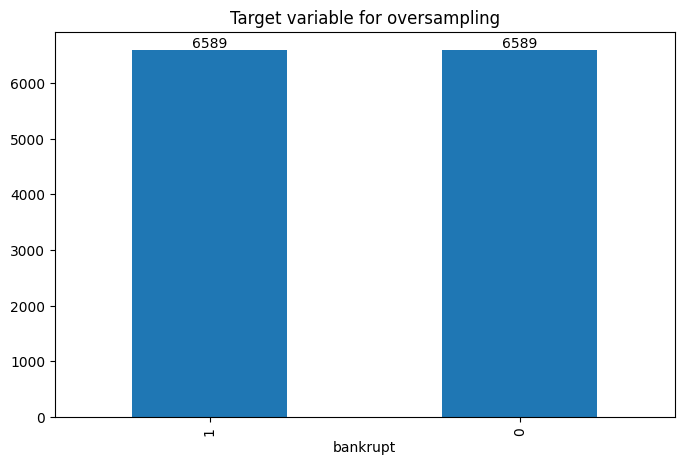

In [134]:
plt.figure(figsize=(8,5))
barplot = y_resampled.value_counts().plot(kind='bar')
for i in barplot.containers:
    barplot.bar_label(i)
plt.title('Target variable for oversampling')
plt.show()

#### Train-Test-Split

In [135]:
x_train,x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state= 56)

In [136]:
x_train.shape,  x_test.shape,  y_train.shape , y_test.shape

((10542, 10), (2636, 10), (10542,), (2636,))

### Building Model 

In [151]:
def prediction(model,x_train,y_train,x_test,y_test):
    y_pred= model.predict(x_test)
    test_accuracy=accuracy_score(y_pred,y_test)
    print(f'test_accuracy: {test_accuracy}')
    print(classification_report(y_pred,y_test))
    return y_pred
    

#### Building confusion matrix

In [158]:
def plot_confusion_matrix(model, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

### KNearestNeighbour

In [152]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [160]:
model.classes_

array([0, 1], dtype=int64)

In [161]:
y_pred = prediction(model, x_train,y_train,x_test,y_test)

test_accuracy: 0.9294385432473444
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1182
           1       0.98      0.89      0.93      1454

    accuracy                           0.93      2636
   macro avg       0.93      0.93      0.93      2636
weighted avg       0.94      0.93      0.93      2636



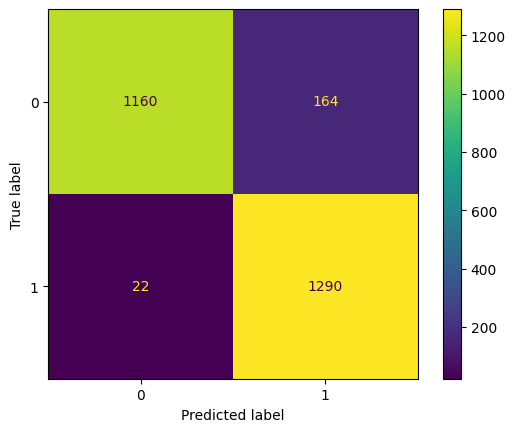

In [162]:
plot_confusion_matrix(model, y_test, y_pred)

### Random Forest Classifier

In [184]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [185]:
import pickle

In [188]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [165]:
y_pred = prediction(model,x_train,y_train,x_test,y_test)

test_accuracy: 0.956752655538695
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1264
           1       0.98      0.94      0.96      1372

    accuracy                           0.96      2636
   macro avg       0.96      0.96      0.96      2636
weighted avg       0.96      0.96      0.96      2636



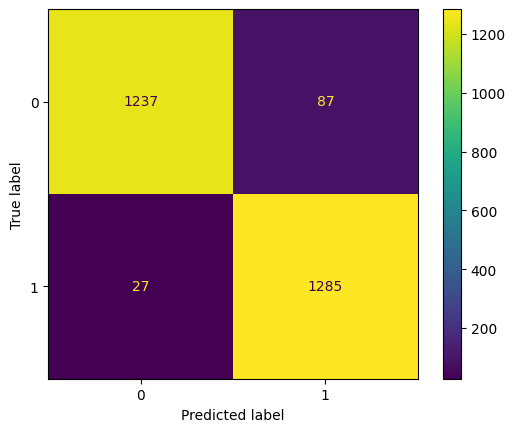

In [166]:
plot_confusion_matrix(model, y_test, y_pred)

### Support Vector Machine

In [170]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [171]:
y_pred = prediction(model,x_train,y_train,x_test,y_test)

test_accuracy: 0.8592564491654021
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1209
           1       0.90      0.83      0.86      1427

    accuracy                           0.86      2636
   macro avg       0.86      0.86      0.86      2636
weighted avg       0.86      0.86      0.86      2636



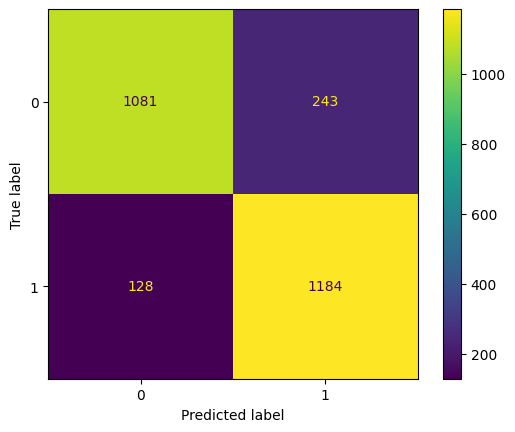

In [172]:
plot_confusion_matrix(model, y_test, y_pred)

### Decision Tree Classifier

In [173]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [174]:
y_pred = prediction(model,x_train,y_train,x_test,y_test)

test_accuracy: 0.9283004552352049
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1271
           1       0.95      0.91      0.93      1365

    accuracy                           0.93      2636
   macro avg       0.93      0.93      0.93      2636
weighted avg       0.93      0.93      0.93      2636



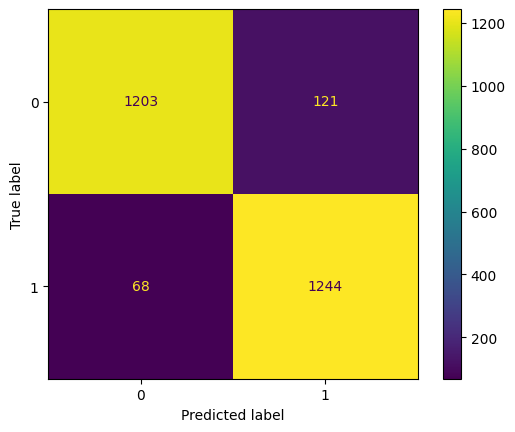

In [175]:
plot_confusion_matrix(model, y_test, y_pred)

### Gradient Boosting Classifier

In [176]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [177]:
y_pred = prediction(model,x_train,y_train,x_test,y_test)

test_accuracy: 0.9006069802731411
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1256
           1       0.93      0.88      0.90      1380

    accuracy                           0.90      2636
   macro avg       0.90      0.90      0.90      2636
weighted avg       0.90      0.90      0.90      2636



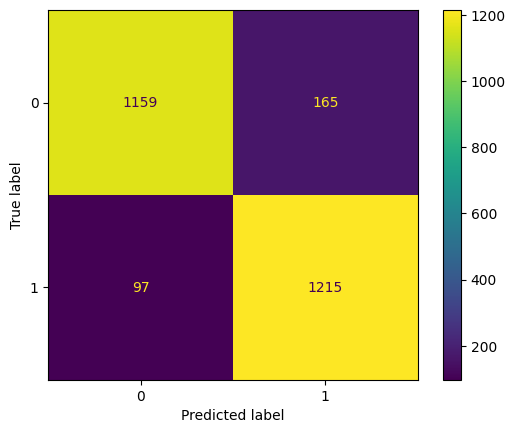

In [178]:
plot_confusion_matrix(model, y_test, y_pred)

#### XGBOOST CLASSIFIER

In [179]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [180]:
y_pred = prediction(model,x_train,y_train,x_test,y_test)

test_accuracy: 0.9525796661608498
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1261
           1       0.98      0.93      0.95      1375

    accuracy                           0.95      2636
   macro avg       0.95      0.95      0.95      2636
weighted avg       0.95      0.95      0.95      2636



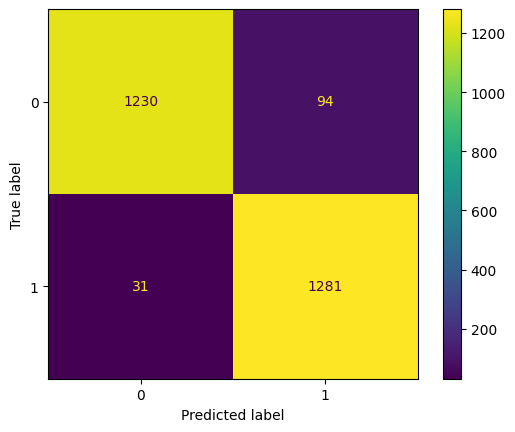

In [181]:
plot_confusion_matrix(model, y_test, y_pred)